<h2 style="text-align:center; background-color:#d3ffe4; color:black;padding:14px;"><b> Canada Pre-owned Tesla Electic Vehical Price Prediction</b></h2>

---

<p style="text-align:right"><b> Project Creator: Flora Wong (Yuen Ling) </b></p>

### Project Goals : 

This project aims at analyzing the latest data regarding prices of pre-owned Tesla Electric Vehicles in Canada and building machine learnning models that can predict prices of pre-owned Tesla vehicles.

In this project, I have scraped the lastest data from: <br>
> - [CarGurus - A Canada's Automotive Marketplace](https://www.cargurus.ca)

### Areas of Concerns:
1. Current Trends of Tesla Pre-owned EV Markets in Canada
2. Important Factors that Influence the Prices of Pre-owned Tesla EVs
3. Trained Machine Learnning Model with High Accuracy
4. Created Price Calculator to Predict Prices of Pre-owned Tesla EVs



### Table of Content:
This Notebook :
- [Part I - Data Cleaning + Preprocessing](#part-i---data-cleaning--preprocessing)
- [Part II - Explorative Data Anaylsis + Visualisation](#part-ii---explorative-data-analysis)
- [Part III - Statistical Anaylsis](#part-iii---statistical-anaylsis)
- [Part IV - Building Models](#part-iv---building-models)
- [Part V - Best Model + New Prediction + Deployment](#part-v---best-model)


### More to Explore:
- **Web Scaping**
  - please refter to Notebook - Web Scraping.ipynb
- **Interactive User Interface**
  - please refter to: [ Tesla Pre-owned EV Price Prediction App ](https://tesla-pre-owned-ev-price-prediction.streamlit.app/)
<br></br>

<h2 style="text-align:center; background-color:#d3ffe4; color:black; padding:5px;"><b>  Neccessary Libraries in Notebook </b></h2>

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import RidgeCV, ElasticNet, ElasticNetCV, LassoCV
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

<h2 style="text-align:center; background-color:#d3ffe4; color:black; padding:5px;"><b>  Part I - Data Cleaning + Preprocessing </b></h2><a id="part-i---data-cleaning--preprocessing"></a>

In [12]:
df = pd.read_csv("merge_df.csv")

In [13]:
df.head()

,title,price,location,Mileage,Drivetrain,Exterior color,Interior color,Fuel Consumption,Fuel type,Battery charge time,...,Cargo volume:,Transmission,Dealer:,Backup camera,Battery charge time (120V):,Cabin size:,Bed length:,Safety rating,Alloy wheels,Bluetooth
0,2022 Tesla Model 3 RWD,"$34,999","Truro, NS","51,060",Rear-Wheel Drive,Black,Black,1.9 L/100km,Electric,10 hr,...,648 L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017 Tesla Model X 100D AWD,"$49,980","North Vancouver, BC","136,200",All-Wheel Drive,White,NaN,2.655 L/100km,Electric,12 hr,...,736 L,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020 Tesla Model 3,"$31,690","Richmond, BC","41,722",NaN,White,NaN,NaN,Electric,NaN,...,NaN,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019 Tesla Model 3 Standard Plus RWD,"$26,888","North York, ON","42,000",Rear-Wheel Drive,Black,NaN,1.9 L/100km,Electric,10 hr,...,NaN,Automatic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022 Tesla Model 3 Long Range AWD,"$39,990","Calgary, AB • Home delivery available","50,870",All-Wheel Drive,Midnight Silver Metallic,Black,1.9 L/100km,Electric,10 hr,...,648 L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Drop duplicate rows

In [15]:
df = df.drop_duplicates(subset=['title','price','location','Mileage','VIN:'])

### Drop unwanted columns + null values

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 48 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         982 non-null    object 
 1   price                         981 non-null    object 
 2   location                      981 non-null    object 
 3   Mileage                       966 non-null    object 
 4   Drivetrain                    941 non-null    object 
 5   Exterior color                885 non-null    object 
 6   Interior color                409 non-null    object 
 7   Fuel Consumption              734 non-null    object 
 8   Fuel type                     955 non-null    object 
 9   Battery charge time           920 non-null    object 
 10  Battery range                 934 non-null    object 
 11  Make:                         981 non-null    object 
 12  Model:                        981 non-null    object 
 13  Year:

In [18]:
df = df.dropna(subset=['price','Mileage:'])

In [19]:
df.reset_index(inplace=True, drop=True)

In [20]:
df.columns

Index(['title', 'price', 'location', 'Mileage', 'Drivetrain', 'Exterior color',
       'Interior color', 'Fuel Consumption', 'Fuel type',
       'Battery charge time', 'Battery range', 'Make:', 'Model:', 'Year:',
       'Trim:', 'Body type:', 'Exterior colour:', 'Interior colour:',
       'Mileage:', 'Condition:', 'VIN:', 'Stock number:',
       'Combined gas mileage:', 'City gas mileage:', 'Highway gas mileage:',
       'Fuel type:', 'Battery capacity:', 'Battery charge time (240V):',
       'Battery range:', 'Transmission:', 'Drivetrain:',
       'NHTSA overall safety rating:', 'NHTSA frontal crash rating:',
       'NHTSA side crash rating:', 'NHTSA rollover rating:', 'Doors:',
       'Front legroom:', 'Back legroom:', 'Cargo volume:', 'Transmission',
       'Dealer:', 'Backup camera', 'Battery charge time (120V):',
       'Cabin size:', 'Bed length:', 'Safety rating', 'Alloy wheels',
       'Bluetooth'],
      dtype='object')

In [21]:
# drop unwanted rows with too many null values
df = df.drop(['NHTSA overall safety rating:', 'NHTSA frontal crash rating:','NHTSA side crash rating:', 'NHTSA rollover rating:',
              'Dealer:','Backup camera', 'Battery charge time (120V):','Cabin size:', 'Bed length:', 'Safety rating', 'Alloy wheels',
              'Bluetooth','Make:'],
        axis=1)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        966 non-null    object 
 1   price                        966 non-null    object 
 2   location                     965 non-null    object 
 3   Mileage                      962 non-null    object 
 4   Drivetrain                   926 non-null    object 
 5   Exterior color               876 non-null    object 
 6   Interior color               403 non-null    object 
 7   Fuel Consumption             723 non-null    object 
 8   Fuel type                    940 non-null    object 
 9   Battery charge time          907 non-null    object 
 10  Battery range                919 non-null    object 
 11  Model:                       966 non-null    object 
 12  Year:                        966 non-null    float64
 13  Trim:               

In [23]:
for col in df.columns:
    print(df[col].value_counts(normalize=True))

title
2020 Tesla Model 3 Standard Range Plus RWD    0.089027
2021 Tesla Model 3 Standard Range Plus RWD    0.080745
2022 Tesla Model 3 RWD                        0.063147
2021 Tesla Model Y Long Range AWD             0.044513
2022 Tesla Model 3 Long Range AWD             0.042443
                                                ...   
2016 Tesla Model S P90D AWD                   0.001035
2019 Tesla Model 3 Mid Range RWD              0.001035
2020 Tesla Model X Performance AWD            0.001035
2024 Tesla Model Y Performance AWD            0.001035
2019 Tesla Model X Long Range AWD             0.001035
Name: proportion, Length: 102, dtype: float64
price
No price listed    0.013458
$27,995            0.010352
$32,995            0.010352
$29,995            0.010352
$36,995            0.009317
                     ...   
$34,510            0.001035
$32,512            0.001035
$65,775            0.001035
$27,050            0.001035
$54,977            0.001035
Name: proportion, Length: 578

In [24]:
# drop duplicate columns and unwanted columns
df = df.drop(['Exterior colour:','Interior color','Interior colour:','Mileage','VIN:','Stock number:','Fuel type',
              'Combined gas mileage:','City gas mileage:','Highway gas mileage:','Battery range:','Back legroom:',
              'Doors:','Fuel type:','Transmission','Transmission:','Drivetrain:','Condition:'],axis=1)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        966 non-null    object 
 1   price                        966 non-null    object 
 2   location                     965 non-null    object 
 3   Drivetrain                   926 non-null    object 
 4   Exterior color               876 non-null    object 
 5   Fuel Consumption             723 non-null    object 
 6   Battery charge time          907 non-null    object 
 7   Battery range                919 non-null    object 
 8   Model:                       966 non-null    object 
 9   Year:                        966 non-null    float64
 10  Trim:                        930 non-null    object 
 11  Body type:                   940 non-null    object 
 12  Mileage:                     966 non-null    object 
 13  Battery capacity:   

### Cleanning + Preprocessing for each Column

#### Create Common functions 

In [28]:
# Function to Convert Str into Float:
def str2num(col, split_word, index, new_col, new_dtype):
    df[col]=df[col].astype(str)
    df[(f"{new_col}")]=df[col].str.split(split_word).str[index].str.strip()
    df[(f"{new_col}")]=df[(f"{new_col}")].astype(new_dtype)
    return df[[col,new_col]]

In [29]:
# Function to Show Mean and Median
def mean_median(col):
    mean = df[col].mean()
    median = df[col].median()
    model_mean = df.groupby("model")[col].mean()
    model_median = df.groupby("model")[col].median()
    print(f"Mean:{mean}")
    print(f"Median:{median}")
    print("                ")
    print(f"Means Across Models:{model_mean}")
    print("                ")
    print(f"Median Across Models:{model_median}")

In [30]:
# Function to Fillna with Median Values
def fillna_median(col):
    org_null = df[col].isnull().sum()
    print(f"The original count of null values is:{org_null}")
    
    df[col] = df.groupby('model')[col].transform(lambda x: x.fillna(x.median()))
    sec_null = df[col].isnull().sum()
    print(f"After filling null values with median based on each model group, the count of null values is:{sec_null}")

    general_median = df[col].median()
    df[col] = df[col].fillna(general_median)
    final_null = df[col].isnull().sum()
    print(f"Further filling null values with general median, the final count of null values is:{final_null}")

#### Column: Model, Trim

In [33]:
df = df.rename(columns = {'Model:' : 'model'})

<Axes: xlabel='count', ylabel='model'>

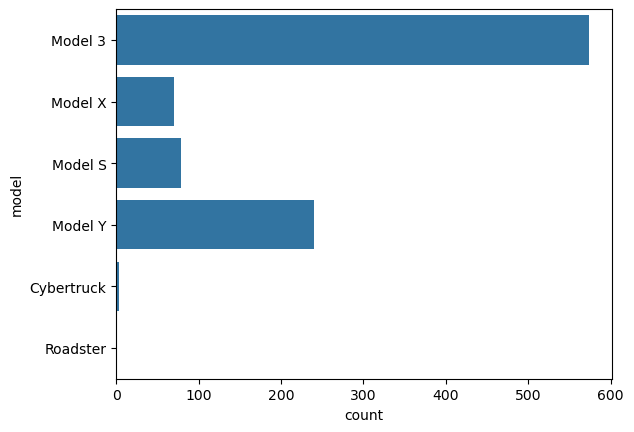

In [36]:
sns.countplot(df['model'])

Remove Cybertruck and Roadster models as they have too few observations.

In [51]:
df = df[~((df['model'] == 'Cybertruck') | (df['model'] == 'Roadster'))]

<Axes: xlabel='count', ylabel='model'>

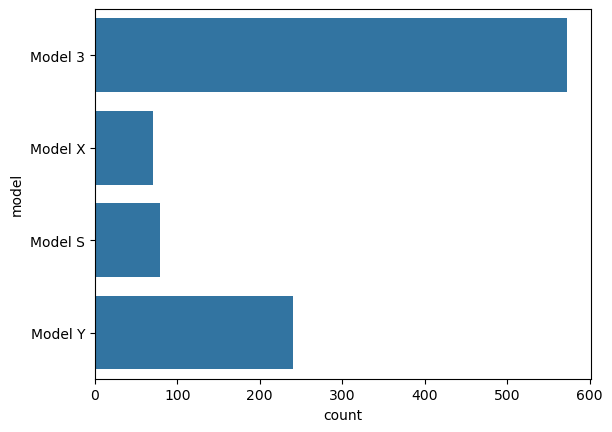

In [53]:
sns.countplot(df['model'])

<Axes: xlabel='count', ylabel='Trim:'>

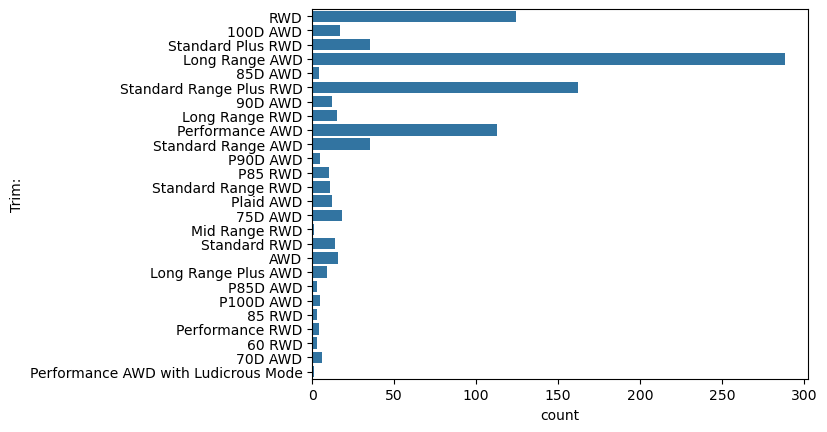

In [55]:
sns.countplot(df['Trim:'])

In [56]:
df.reset_index(inplace=True,drop=True)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        962 non-null    object 
 1   price                        962 non-null    object 
 2   location                     961 non-null    object 
 3   Drivetrain                   922 non-null    object 
 4   Exterior color               873 non-null    object 
 5   Fuel Consumption             723 non-null    object 
 6   Battery charge time          906 non-null    object 
 7   Battery range                915 non-null    object 
 8   model                        962 non-null    object 
 9   Year:                        962 non-null    float64
 10  Trim:                        926 non-null    object 
 11  Body type:                   936 non-null    object 
 12  Mileage:                     962 non-null    object 
 13  Battery capacity:   

#### Column: Price

In [64]:
df = df[df["price"]!='No price listed']

In [66]:
df.reset_index(inplace=True,drop=True)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        949 non-null    object 
 1   price                        949 non-null    object 
 2   location                     948 non-null    object 
 3   Drivetrain                   911 non-null    object 
 4   Exterior color               863 non-null    object 
 5   Fuel Consumption             715 non-null    object 
 6   Battery charge time          895 non-null    object 
 7   Battery range                904 non-null    object 
 8   model                        949 non-null    object 
 9   Year:                        949 non-null    float64
 10  Trim:                        915 non-null    object 
 11  Body type:                   925 non-null    object 
 12  Mileage:                     949 non-null    object 
 13  Battery capacity:   

In [70]:
df.loc[:, 'price'] = df['price'].replace(r'[\$,]', '', regex=True)
df['price'] = df['price'].astype(int)

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        949 non-null    object 
 1   price                        949 non-null    int64  
 2   location                     948 non-null    object 
 3   Drivetrain                   911 non-null    object 
 4   Exterior color               863 non-null    object 
 5   Fuel Consumption             715 non-null    object 
 6   Battery charge time          895 non-null    object 
 7   Battery range                904 non-null    object 
 8   model                        949 non-null    object 
 9   Year:                        949 non-null    float64
 10  Trim:                        915 non-null    object 
 11  Body type:                   925 non-null    object 
 12  Mileage:                     949 non-null    object 
 13  Battery capacity:   

#### Column: Drivetrain

In [75]:
df['Drivetrain'] = df['Drivetrain'].fillna('unknown')

In [77]:
df['Drivetrain'].isnull().sum()

0

In [79]:
df['Drivetrain'].value_counts(normalize=True)

Drivetrain
All-Wheel Drive     0.566913
Rear-Wheel Drive    0.393045
unknown             0.040042
Name: proportion, dtype: float64

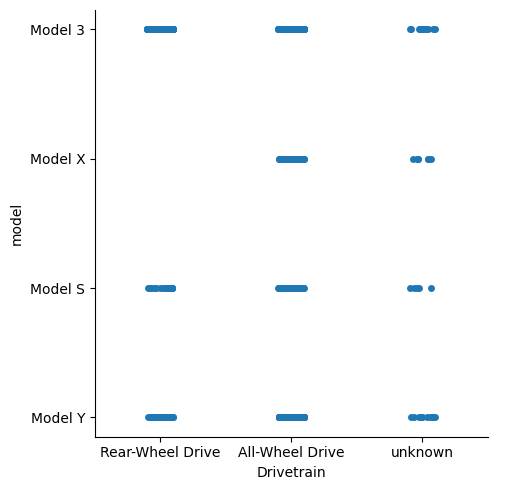

In [81]:
sns.catplot(df, y='model', x='Drivetrain',kind='strip')

#### Column:Fuel Consumption

In [84]:
df['Fuel Consumption']

0        1.9 L/100km
1      2.655 L/100km
2                NaN
3        1.9 L/100km
4        1.9 L/100km
           ...      
944              NaN
945    2.455 L/100km
946    1.945 L/100km
947     2.09 L/100km
948      1.9 L/100km
Name: Fuel Consumption, Length: 949, dtype: object

In [86]:
str2num(col='Fuel Consumption', split_word='L', index=0, new_col='fuel_consume(L/100km)',new_dtype='float')

,Fuel Consumption,fuel_consume(L/100km)
0,1.9 L/100km,1.900
1,2.655 L/100km,2.655
2,nan,NaN
3,1.9 L/100km,1.900
4,1.9 L/100km,1.900
...,...,...
944,nan,NaN
945,2.455 L/100km,2.455
946,1.945 L/100km,1.945
947,2.09 L/100km,2.090


<Axes: xlabel='model', ylabel='fuel_consume(L/100km)'>

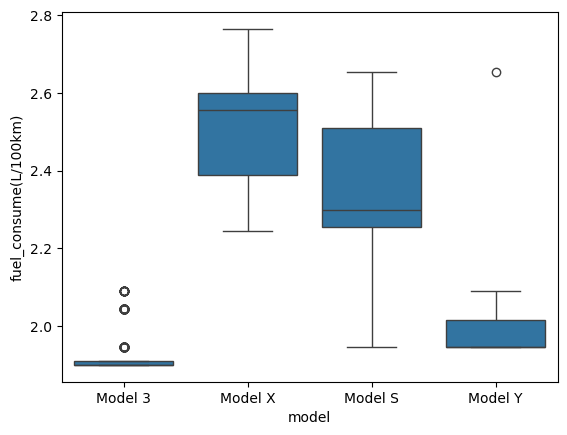

In [87]:
sns.boxplot(df,x='model',y='fuel_consume(L/100km)')

In [90]:
df[((df['model']=='Model Y') & (df['fuel_consume(L/100km)'] >= 2.6))]

,title,price,location,Drivetrain,Exterior color,Fuel Consumption,Battery charge time,Battery range,model,Year:,Trim:,Body type:,Mileage:,Battery capacity:,Battery charge time (240V):,Front legroom:,Cargo volume:,fuel_consume(L/100km)
934,2013 Tesla Model S 85 RWD,26800,"North York, ON",Rear-Wheel Drive,Blue Metallic,2.655 L/100km,12 hr,NaN,Model Y,2024.0,RWD,SUV / Crossover,"5,000 km",67.6 kWh,9.4 hr,1062 mm,971 L,2.655


In [91]:
df = df.drop(index=934)

In [92]:
mean_median('fuel_consume(L/100km)')

Mean:2.0229831932773106
Median:1.945
                
Means Across Models:model
Model 3    1.927836
Model S    2.350985
Model X    2.494151
Model Y    1.989141
Name: fuel_consume(L/100km), dtype: float64
                
Median Across Models:model
Model 3    1.900
Model S    2.300
Model X    2.555
Model Y    1.945
Name: fuel_consume(L/100km), dtype: float64


In [96]:
fillna_median('fuel_consume(L/100km)')

The original count of null values is:234
After filling null values with median based on each model group, the count of null values is:0
Further filling null values with general median, the final count of null values is:0


In [98]:
df = df.drop('Fuel Consumption',axis=1)

#### Column : Location

In [101]:
str2num(col='location', split_word=',', index=0, new_col='region', new_dtype='str')

,location,region
0,"Truro, NS",Truro
1,"North Vancouver, BC",North Vancouver
2,"Richmond, BC",Richmond
3,"North York, ON",North York
4,"Calgary, AB • Home delivery available",Calgary
...,...,...
944,"Laval, QC • Home delivery available",Laval
945,"Sidney, BC",Sidney
946,"Burlington, ON • Home delivery available",Burlington
947,"Longueuil, QC",Longueuil


In [103]:
str2num(col='location', split_word=',', index=-1, new_col='province', new_dtype='str')

,location,province
0,"Truro, NS",NS
1,"North Vancouver, BC",BC
2,"Richmond, BC",BC
3,"North York, ON",ON
4,"Calgary, AB • Home delivery available",AB • Home delivery available
...,...,...
944,"Laval, QC • Home delivery available",QC • Home delivery available
945,"Sidney, BC",BC
946,"Burlington, ON • Home delivery available",ON • Home delivery available
947,"Longueuil, QC",QC


In [104]:
filter = df[df['province'].str.contains("Home delivery available", na=False)]
filter 

,title,price,location,Drivetrain,Exterior color,Battery charge time,Battery range,model,Year:,Trim:,Body type:,Mileage:,Battery capacity:,Battery charge time (240V):,Front legroom:,Cargo volume:,fuel_consume(L/100km),region,province
4,2022 Tesla Model 3 Long Range AWD,39990,"Calgary, AB • Home delivery available",All-Wheel Drive,Midnight Silver Metallic,10 hr,538 km,Model 3,2022.0,Long Range AWD,Sedan,"50,870 km",82 kWh,10 hr,1085 mm,648 L,1.900,Calgary,AB • Home delivery available
30,2014 Tesla Model S,19995,"Etobicoke, ON • Home delivery available",unknown,NaN,NaN,NaN,Model S,2014.0,NaN,Sedan,"159,669 km",NaN,NaN,NaN,NaN,2.300,Etobicoke,ON • Home delivery available
31,2018 Tesla Model 3 Long Range AWD,24498,"St-leonard, QC • Home delivery available",All-Wheel Drive,Black,10 hr,499 km,Model 3,2018.0,Long Range AWD,Sedan,"92,107 km",75 kWh,10 hr,1085 mm,424 L,2.045,St-leonard,QC • Home delivery available
49,2019 Tesla Model 3 Long Range AWD,29980,"Montréal, QC • Home delivery available",All-Wheel Drive,Blue,10 hr,499 km,Model 3,2019.0,Long Range AWD,Sedan,"63,856 km",75 kWh,10 hr,1085 mm,424 L,2.045,Montréal,QC • Home delivery available
65,2021 Tesla Model S Plaid AWD,79999,"Longueuil, QC • Home delivery available",All-Wheel Drive,Black,15 hr,628 km,Model S,2021.0,Plaid AWD,Sedan,"57,936 km",100 kWh,15 hr,1085 mm,744 L,2.345,Longueuil,QC • Home delivery available
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,2021 Tesla Model Y Long Range AWD,54995,"North York, ON • Home delivery available",All-Wheel Drive,White,10 hr,509 km,Model Y,2021.0,Long Range AWD,SUV / Crossover,"28,000 km",75 kWh,10 hr,1062 mm,1925 L,1.945,North York,ON • Home delivery available
903,2022 Tesla Model Y Performance AWD,52950,"Laval, QC • Home delivery available",All-Wheel Drive,Black,10 hr,488 km,Model Y,2022.0,Performance AWD,SUV / Crossover,"73,537 km",75 kWh,10 hr,1062 mm,971 L,2.090,Laval,QC • Home delivery available
939,2023 Tesla Model Y RWD,49988,"Saint-Basile-Le-Grand, QC • Home delivery avai...",Rear-Wheel Drive,White,9.4 hr,418 km,Model Y,2023.0,RWD,SUV / Crossover,"20,131 km",67.6 kWh,9.4 hr,1064 mm,971 L,1.945,Saint-Basile-Le-Grand,QC • Home delivery available
944,2020 Tesla Model 3 Standard Range AWD,28995,"Laval, QC • Home delivery available",All-Wheel Drive,Silver,10 hr,354 km,Model 3,2020.0,Standard Range AWD,Sedan,"106,714 km",50 kWh,10 hr,1085 mm,424 L,1.900,Laval,QC • Home delivery available


In [107]:
df['temp'] = filter['province'].str.extract(r'([A-Z]{2})\s•')

In [109]:
df[df['province'].str.contains("Home delivery available", na=False)]

,title,price,location,Drivetrain,Exterior color,Battery charge time,Battery range,model,Year:,Trim:,Body type:,Mileage:,Battery capacity:,Battery charge time (240V):,Front legroom:,Cargo volume:,fuel_consume(L/100km),region,province,temp
4,2022 Tesla Model 3 Long Range AWD,39990,"Calgary, AB • Home delivery available",All-Wheel Drive,Midnight Silver Metallic,10 hr,538 km,Model 3,2022.0,Long Range AWD,Sedan,"50,870 km",82 kWh,10 hr,1085 mm,648 L,1.900,Calgary,AB • Home delivery available,AB
30,2014 Tesla Model S,19995,"Etobicoke, ON • Home delivery available",unknown,NaN,NaN,NaN,Model S,2014.0,NaN,Sedan,"159,669 km",NaN,NaN,NaN,NaN,2.300,Etobicoke,ON • Home delivery available,ON
31,2018 Tesla Model 3 Long Range AWD,24498,"St-leonard, QC • Home delivery available",All-Wheel Drive,Black,10 hr,499 km,Model 3,2018.0,Long Range AWD,Sedan,"92,107 km",75 kWh,10 hr,1085 mm,424 L,2.045,St-leonard,QC • Home delivery available,QC
49,2019 Tesla Model 3 Long Range AWD,29980,"Montréal, QC • Home delivery available",All-Wheel Drive,Blue,10 hr,499 km,Model 3,2019.0,Long Range AWD,Sedan,"63,856 km",75 kWh,10 hr,1085 mm,424 L,2.045,Montréal,QC • Home delivery available,QC
65,2021 Tesla Model S Plaid AWD,79999,"Longueuil, QC • Home delivery available",All-Wheel Drive,Black,15 hr,628 km,Model S,2021.0,Plaid AWD,Sedan,"57,936 km",100 kWh,15 hr,1085 mm,744 L,2.345,Longueuil,QC • Home delivery available,QC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889,2021 Tesla Model Y Long Range AWD,54995,"North York, ON • Home delivery available",All-Wheel Drive,White,10 hr,509 km,Model Y,2021.0,Long Range AWD,SUV / Crossover,"28,000 km",75 kWh,10 hr,1062 mm,1925 L,1.945,North York,ON • Home delivery available,ON
903,2022 Tesla Model Y Performance AWD,52950,"Laval, QC • Home delivery available",All-Wheel Drive,Black,10 hr,488 km,Model Y,2022.0,Performance AWD,SUV / Crossover,"73,537 km",75 kWh,10 hr,1062 mm,971 L,2.090,Laval,QC • Home delivery available,QC
939,2023 Tesla Model Y RWD,49988,"Saint-Basile-Le-Grand, QC • Home delivery avai...",Rear-Wheel Drive,White,9.4 hr,418 km,Model Y,2023.0,RWD,SUV / Crossover,"20,131 km",67.6 kWh,9.4 hr,1064 mm,971 L,1.945,Saint-Basile-Le-Grand,QC • Home delivery available,QC
944,2020 Tesla Model 3 Standard Range AWD,28995,"Laval, QC • Home delivery available",All-Wheel Drive,Silver,10 hr,354 km,Model 3,2020.0,Standard Range AWD,Sedan,"106,714 km",50 kWh,10 hr,1085 mm,424 L,1.900,Laval,QC • Home delivery available,QC


In [110]:
# Extract the two-letter abbreviation and update the 'province' column
df.loc[filter.index, 'province'] = filter['province'].str.extract(r'([A-Z]{2})\s•')[0]

In [113]:
df['province'].value_counts(normalize=True)

province
ON     0.458861
BC     0.314346
QC     0.157173
AB     0.044304
NS     0.011603
MB     0.009494
SK     0.003165
nan    0.001055
Name: proportion, dtype: float64

In [115]:
df[df['province']=='nan']

,title,price,location,Drivetrain,Exterior color,Battery charge time,Battery range,model,Year:,Trim:,Body type:,Mileage:,Battery capacity:,Battery charge time (240V):,Front legroom:,Cargo volume:,fuel_consume(L/100km),region,province,temp
415,2023 Tesla Model 3 RWD,38999,nan,Rear-Wheel Drive,Black,10 hr,402 km,Model 3,2020.0,Standard Range Plus RWD,Sedan,"105,286 km",50 kWh,10 hr,1085 mm,424 L,1.9,nan,nan,NaN


In [116]:
df = df.drop(index=415)

In [119]:
df = df.drop(['location','temp'],axis=1)

In [121]:
df['province'].isnull().sum()

0

In [123]:
df['region'].isnull().sum()

0

#### Column: Exterior Color

In [126]:
df[df["Exterior color"]=="-"]

,title,price,Drivetrain,Exterior color,Battery charge time,Battery range,model,Year:,Trim:,Body type:,Mileage:,Battery capacity:,Battery charge time (240V):,Front legroom:,Cargo volume:,fuel_consume(L/100km),region,province
552,2023 Tesla Model 3 Long Range AWD,49994,All-Wheel Drive,-,11.5 hr,576 km,Model 3,2023.0,Long Range AWD,Sedan,"10,500 km",82 kWh,11.5 hr,1085 mm,648 L,1.9,Langley,BC
865,2020 Tesla Model 3 Standard Range Plus RWD,36888,Rear-Wheel Drive,-,10 hr,402 km,Model 3,2020.0,Standard Range Plus RWD,Sedan,"61,150 km",10 hr,402 km,894 mm,NaN,1.9,Surrey,BC


Check the images from the webste, these two vehicals (with "-" in Exterior color column) are in grey exterior colour. Hence, manually filled the values.

In [129]:
replacement_map = {
    'Black': ['Black', 'Solid Black', 'Black[Solid Black]'],
    'Gray(/Dark Grey/Stealth Grey/Charcoal)': ['Gray', 'Gray (Dark Grey)', 'Gray (Stealth Grey)', 
                                                 'Gray (Gris fonçé)', 'Black (Charcoal)', 
                                                 'Midnight Silver Metallic','Charbon','Gray (STEALTH GREY)','-'],
    'Red': ['Red', 'Red (Maroon)'],
    'Blue(/Deep Blue Metallic)': ['Blue', 'Dark Blue', 'Deep Blue Metallic', 'Blue Metallic', 
                                  'Blue (Bleu fonçé)', 'Metallic Dark Blue', 
                                  'Metallic Saxony Blue', 'Deep Blue Metallic (DBMET)'],
    'Silver': ['Midnight Silver Metallic', 'Silver', 'MIDNIGHT SILVER METALLIC'],
    'White(/Pearl White Multi-Coat)':['White','Pearl White Multi-Coat','PEARL WHITE MULTI-COAT']
}

for new_value, old_values in replacement_map.items():
    df['Exterior color'] = df['Exterior color'].replace(old_values, new_value)

In [131]:
df['Exterior color'].value_counts(normalize=True)

Exterior color
White(/Pearl White Multi-Coat)            0.399535
Gray(/Dark Grey/Stealth Grey/Charcoal)    0.192799
Black                                     0.191638
Blue(/Deep Blue Metallic)                 0.120790
Red                                       0.068525
Silver                                    0.024390
Galactic Gray                             0.001161
Green                                     0.001161
Name: proportion, dtype: float64

In [133]:
df[((df['Exterior color']=='Galactic Gray') | (df['Exterior color']=='Green'))]

,title,price,Drivetrain,Exterior color,Battery charge time,Battery range,model,Year:,Trim:,Body type:,Mileage:,Battery capacity:,Battery charge time (240V):,Front legroom:,Cargo volume:,fuel_consume(L/100km),region,province
494,2022 Tesla Model Y Performance AWD,53888,All-Wheel Drive,Galactic Gray,10 hr,488 km,Model Y,2022.0,Performance AWD,SUV / Crossover,"48,079 km",75 kWh,10 hr,1062 mm,971 L,2.09,Burnaby,BC
734,2022 Tesla Model 3 RWD,37900,Rear-Wheel Drive,Green,10 hr,430 km,Model 3,2022.0,RWD,Sedan,"75,100 km",60 kWh,10 hr,1085 mm,648 L,1.90,Langley,BC


In [135]:
df = df[~((df['Exterior color']=='Galactic Gray') | (df['Exterior color']=='Green'))]

In [137]:
df = df.dropna(subset=['Exterior color'])

In [139]:
df.reset_index(drop=True,inplace=True)

As Galactic Gray and Green colour only have one obsservation respectively, which might not be enought for training the model, hence, drops the two datapoints. Alos, drop null values in this column.

#### Column: Battery Charge Time

In [143]:
df['Battery charge time'].value_counts(normalize=True)

Battery charge time
10 hr      0.718978
12 hr      0.131387
11.5 hr    0.041363
10.4 hr    0.038929
9.4 hr     0.027981
15 hr      0.015815
11.8 hr    0.009732
14 hr      0.007299
9 hr       0.007299
9.8 hr     0.001217
Name: proportion, dtype: float64

In [145]:
str2num(col='Battery charge time', split_word='hr', index=0, new_col='battery_charge_time(hr)', new_dtype='float')

,Battery charge time,battery_charge_time(hr)
0,10 hr,10.0
1,12 hr,12.0
2,nan,NaN
3,10 hr,10.0
4,10 hr,10.0
...,...,...
854,10 hr,10.0
855,10 hr,10.0
856,10 hr,10.0
857,15 hr,15.0


In [147]:
mean_median('battery_charge_time(hr)')

Mean:10.441849148418493
Median:10.0
                
Means Across Models:model
Model 3    10.137126
Model S    12.530303
Model X    12.244898
Model Y    10.084951
Name: battery_charge_time(hr), dtype: float64
                
Median Across Models:model
Model 3    10.0
Model S    12.0
Model X    12.0
Model Y    10.0
Name: battery_charge_time(hr), dtype: float64


In [149]:
fillna_median('battery_charge_time(hr)')

The original count of null values is:37
After filling null values with median based on each model group, the count of null values is:0
Further filling null values with general median, the final count of null values is:0


In [151]:
df = df.drop('Battery charge time',axis=1)

#### Column: Battery Range

In [154]:
df['Battery range'].value_counts(normalize=True)

Battery range
430 km    0.148372
402 km    0.096502
499 km    0.083233
509 km    0.073583
531 km    0.061520
354 km    0.051870
507 km    0.050663
386 km    0.047045
538 km    0.045838
488 km    0.045838
518 km    0.044632
438 km    0.038601
418 km    0.026538
576 km    0.022919
407 km    0.019300
475 km    0.013269
393 km    0.012063
414 km    0.009650
568 km    0.009650
383 km    0.009650
481 km    0.007238
565 km    0.006031
417 km    0.006031
637 km    0.006031
652 km    0.006031
435 km    0.006031
560 km    0.006031
473 km    0.004825
629 km    0.004825
539 km    0.004825
534 km    0.004825
628 km    0.003619
528 km    0.003619
504 km    0.003619
465 km    0.002413
335 km    0.002413
381 km    0.002413
426 km    0.002413
536 km    0.001206
491 km    0.001206
449 km    0.001206
425 km    0.001206
549 km    0.001206
Name: proportion, dtype: float64

In [156]:
str2num(col='Battery range', split_word='k', index=0, new_col='battery_range(km)', new_dtype='float')

,Battery range,battery_range(km)
0,430 km,430.0
1,475 km,475.0
2,nan,NaN
3,386 km,386.0
4,538 km,538.0
...,...,...
854,509 km,509.0
855,354 km,354.0
856,335 km,335.0
857,652 km,652.0


<Axes: xlabel='model', ylabel='battery_range(km)'>

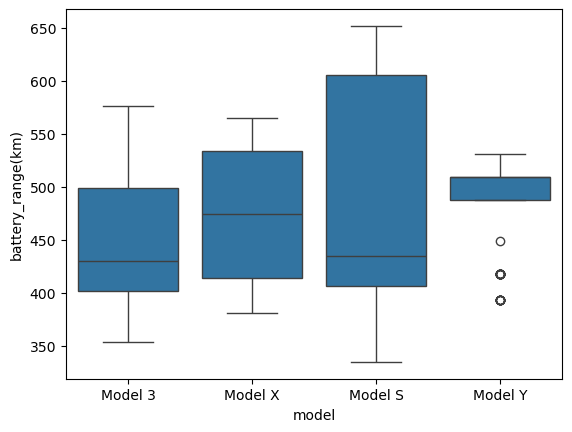

In [158]:
sns.boxplot(df,x='model',y='battery_range(km)')

In [159]:
mean_median('battery_range(km)')

Mean:466.39083232810617
Median:475.0
                
Means Across Models:model
Model 3    451.806387
Model S    485.424242
Model X    471.125000
Model Y    494.475728
Name: battery_range(km), dtype: float64
                
Median Across Models:model
Model 3    430.0
Model S    435.0
Model X    475.0
Model Y    509.0
Name: battery_range(km), dtype: float64


In [162]:
fillna_median('battery_range(km)')

The original count of null values is:30
After filling null values with median based on each model group, the count of null values is:0
Further filling null values with general median, the final count of null values is:0


In [164]:
df = df.drop('Battery range',axis=1)

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   title                        859 non-null    object 
 1   price                        859 non-null    int64  
 2   Drivetrain                   859 non-null    object 
 3   Exterior color               859 non-null    object 
 4   model                        859 non-null    object 
 5   Year:                        859 non-null    float64
 6   Trim:                        833 non-null    object 
 7   Body type:                   839 non-null    object 
 8   Mileage:                     859 non-null    object 
 9   Battery capacity:            829 non-null    object 
 10  Battery charge time (240V):  818 non-null    object 
 11  Front legroom:               829 non-null    object 
 12  Cargo volume:                787 non-null    object 
 13  fuel_consume(L/100km

#### Column: Battery capacity , Battery charge time (240V)

In [169]:
df['Battery capacity:'].value_counts(normalize=True)

Battery capacity:
75 kWh      0.320869
50 kWh      0.285887
82 kWh      0.095296
100 kWh     0.068758
60 kWh      0.066345
10 hr       0.038601
81 kWh      0.036188
67.6 kWh    0.026538
85 kWh      0.020507
90 kWh      0.018094
70 kWh      0.007238
12 hr       0.006031
40 kWh      0.003619
11.5 hr     0.002413
504 km      0.001206
10.4 hr     0.001206
15 hr       0.001206
Name: proportion, dtype: float64

In [171]:
df['Battery charge time (240V):'].value_counts(normalize=True)

Battery charge time (240V):
10 hr      0.683374
12 hr      0.125917
11.5 hr    0.039120
10.4 hr    0.037897
9.4 hr     0.028117
15 hr      0.014670
11.8 hr    0.009780
430 km     0.008557
386 km     0.007335
9 hr       0.007335
402 km     0.004890
507 km     0.003667
509 km     0.003667
14 hr      0.002445
518 km     0.002445
576 km     0.002445
354 km     0.002445
538 km     0.002445
438 km     0.001222
565 km     0.001222
652 km     0.001222
475 km     0.001222
414 km     0.001222
499 km     0.001222
407 km     0.001222
9.8 hr     0.001222
568 km     0.001222
481 km     0.001222
488 km     0.001222
Name: proportion, dtype: float64

These two columns have unclear / mixed values, hence, we have to drop these two clumns.

In [174]:
df = df.drop(['Battery capacity:','Battery charge time (240V):'],axis=1)

#### Column: Trim

In [177]:
df.loc[df['Trim:'].isnull()]

,title,price,Drivetrain,Exterior color,model,Year:,Trim:,Body type:,Mileage:,Front legroom:,Cargo volume:,fuel_consume(L/100km),region,province,battery_charge_time(hr),battery_range(km)
2,2020 Tesla Model 3,31690,unknown,White(/Pearl White Multi-Coat),Model 3,2020.0,NaN,NaN,"41,722 km",NaN,NaN,1.900,Richmond,BC,10.0,430.0
50,2017 Tesla Model X,53990,unknown,Gray(/Dark Grey/Stealth Grey/Charcoal),Model X,2017.0,NaN,SUV / Crossover,"53,500 km",NaN,NaN,2.555,Calgary,AB,12.0,475.0
129,2024 Tesla Model 3,45682,unknown,Black,Model 3,2024.0,NaN,NaN,"30,158 km",NaN,NaN,1.900,Abbotsford,BC,10.0,430.0
226,2023 Tesla Model X,92871,unknown,Red,Model X,2023.0,NaN,SUV / Crossover,"56,000 km",NaN,NaN,2.555,Ottawa,ON,12.0,475.0
250,2019 Tesla Model 3,30995,unknown,White(/Pearl White Multi-Coat),Model 3,2019.0,NaN,NaN,"58,372 km",NaN,NaN,1.900,Coquitlam,BC,10.0,430.0
290,2023 Tesla Model X,99995,unknown,White(/Pearl White Multi-Coat),Model X,2023.0,NaN,SUV / Crossover,"37,848 km",NaN,NaN,2.555,Richmond,BC,12.0,475.0
413,2016 Tesla Model X,43999,unknown,Gray(/Dark Grey/Stealth Grey/Charcoal),Model X,2016.0,NaN,SUV / Crossover,"107,000 km",NaN,NaN,2.555,North Vancouver,BC,12.0,475.0
428,2023 Tesla Model Y,44888,unknown,Silver,Model Y,2023.0,NaN,NaN,"9,698 km",NaN,NaN,1.945,Calgary,AB,10.0,509.0
437,2023 Tesla Model Y,44888,unknown,White(/Pearl White Multi-Coat),Model Y,2023.0,NaN,NaN,"10,995 km",NaN,NaN,1.945,Calgary,AB,10.0,509.0
471,2023 Tesla Model Y,44888,unknown,White(/Pearl White Multi-Coat),Model Y,2023.0,NaN,NaN,"15,443 km",NaN,NaN,1.945,Calgary,AB,10.0,509.0


In [179]:
df['Trim:'] = df['Trim:'].fillna(value='unknown')

In [180]:
df['Trim:'].isnull().sum()

0

#### Column: Body Type

In [184]:
df['Body type:'].value_counts(normalize=True)

Body type:
Sedan              0.681764
SUV / Crossover    0.318236
Name: proportion, dtype: float64

In [186]:
df.groupby('model')['Body type:'].value_counts(normalize=True)

model    Body type:     
Model 3  Sedan              1.000000
Model S  Sedan              1.000000
Model X  SUV / Crossover    0.968254
         Sedan              0.031746
Model Y  SUV / Crossover    1.000000
Name: proportion, dtype: float64

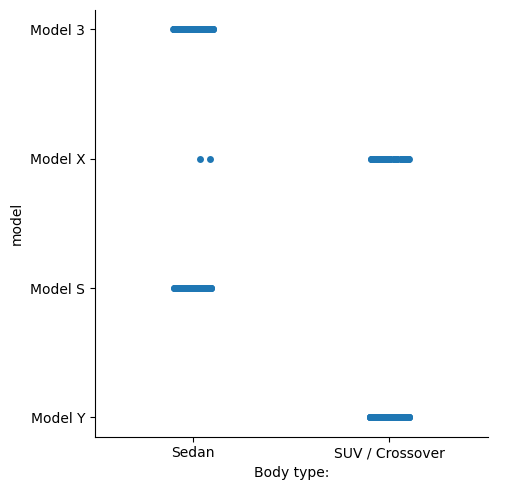

In [188]:
sns.catplot(df, y='model', x='Body type:',kind='strip')

In [189]:
df[((df['model']=='Model X') & (df['Body type:']=='Sedan'))]

,title,price,Drivetrain,Exterior color,model,Year:,Trim:,Body type:,Mileage:,Front legroom:,Cargo volume:,fuel_consume(L/100km),region,province,battery_charge_time(hr),battery_range(km)
19,2023 Tesla Model X Standard Range AWD,95888,All-Wheel Drive,White(/Pearl White Multi-Coat),Model X,2023.0,Standard Range AWD,Sedan,"31,762 km",1044 mm,1231 L,2.29,Vaughan,ON,14.0,560.0
721,2023 Tesla Model X Standard Range AWD,97890,All-Wheel Drive,Black,Model X,2023.0,Standard Range AWD,Sedan,"15,000 km",1044 mm,1231 L,2.29,North York,ON,14.0,560.0


As in reality Model X is a SUV instead of sedan, there seens to be error in the data. Therefore, remove those observation.

In [191]:
df = df[~((df['model']=='Model X') & (df['Body type:']=='Sedan'))]

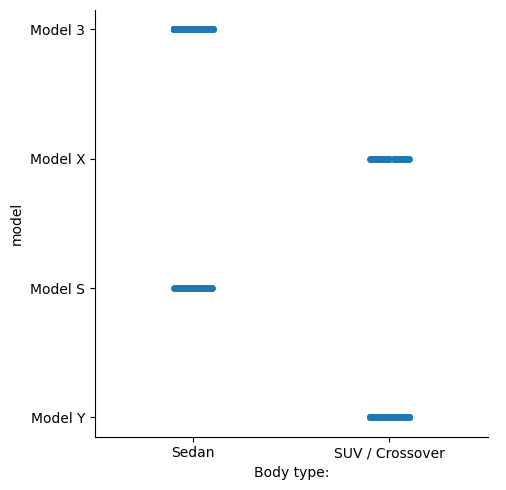

In [193]:
sns.catplot(df, y='model', x='Body type:',kind='strip')

In [196]:
# Fill the 'body type' column conditionally
df.loc[df['model'] == 'Model 3', 'body_type'] = 'Sedan'
df.loc[df['model'] == 'Model X', 'body_type'] = 'SUV/ Crossover'
df.loc[df['model'] == 'Model S', 'body_type'] = 'Sedan'
df.loc[df['model'] == 'Model Y', 'body_type'] = 'SUV/ Crossover'

/var/folders/qp/ljh_2xf51cg0lybz4xhz9sm00000gn/T/ipykernel_1079/4055308548.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['model'] == 'Model 3', 'body_type'] = 'Sedan'


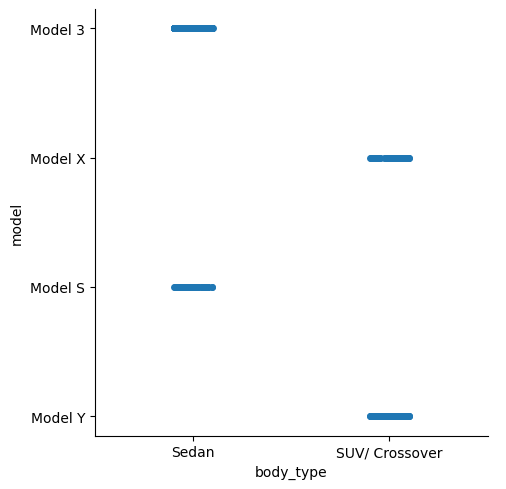

In [199]:
sns.catplot(df, y='model', x='body_type',kind='strip')

In [200]:
df = df.drop("Body type:", axis=1)

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 858
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    857 non-null    object 
 1   price                    857 non-null    int64  
 2   Drivetrain               857 non-null    object 
 3   Exterior color           857 non-null    object 
 4   model                    857 non-null    object 
 5   Year:                    857 non-null    float64
 6   Trim:                    857 non-null    object 
 7   Mileage:                 857 non-null    object 
 8   Front legroom:           827 non-null    object 
 9   Cargo volume:            785 non-null    object 
 10  fuel_consume(L/100km)    857 non-null    float64
 11  region                   857 non-null    object 
 12  province                 857 non-null    object 
 13  battery_charge_time(hr)  857 non-null    float64
 14  battery_range(km)        857 no

#### Column: Mileage

In [206]:
df.loc[:, 'Mileage:'] = df['Mileage:'].replace(r',', '', regex=True)

In [208]:
df['Mileage:'].value_counts(normalize=True)

Mileage:
51000 km    0.007001
98000 km    0.005834
48000 km    0.004667
58000 km    0.004667
69000 km    0.004667
              ...   
40746 km    0.001167
41470 km    0.001167
9045 km     0.001167
48600 km    0.001167
15000 km    0.001167
Name: proportion, Length: 769, dtype: float64

In [210]:
str2num(col='Mileage:', split_word='k', index=0, new_col='mileage(km)', new_dtype='int')

,Mileage:,mileage(km)
0,51060 km,51060
1,136200 km,136200
2,41722 km,41722
3,42000 km,42000
4,50870 km,50870
...,...,...
854,95801 km,95801
855,106714 km,106714
856,186017 km,186017
857,48848 km,48848


In [212]:
df = df.drop('Mileage:',axis=1)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 858
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    857 non-null    object 
 1   price                    857 non-null    int64  
 2   Drivetrain               857 non-null    object 
 3   Exterior color           857 non-null    object 
 4   model                    857 non-null    object 
 5   Year:                    857 non-null    float64
 6   Trim:                    857 non-null    object 
 7   Front legroom:           827 non-null    object 
 8   Cargo volume:            785 non-null    object 
 9   fuel_consume(L/100km)    857 non-null    float64
 10  region                   857 non-null    object 
 11  province                 857 non-null    object 
 12  battery_charge_time(hr)  857 non-null    float64
 13  battery_range(km)        857 non-null    float64
 14  body_type                857 no

#### Column: Front legroom

In [217]:
str2num(col='Front legroom:', split_word='m', index=0, new_col='front_legroom(mm)',new_dtype='float')

,Front legroom:,front_legroom(mm)
0,1085 mm,1085.0
1,1046 mm,1046.0
2,nan,NaN
3,894 mm,894.0
4,1085 mm,1085.0
...,...,...
854,1062 mm,1062.0
855,1085 mm,1085.0
856,1085 mm,1085.0
857,1077 mm,1077.0


In [219]:
mean_median('front_legroom(mm)')

Mean:1068.6662636033857
Median:1085.0
                
Means Across Models:model
Model 3    1073.562874
Model S    1078.272727
Model X    1039.203704
Model Y    1061.402913
Name: front_legroom(mm), dtype: float64
                
Median Across Models:model
Model 3    1085.0
Model S    1085.0
Model X    1046.0
Model Y    1062.0
Name: front_legroom(mm), dtype: float64


In [221]:
df['front_legroom(mm)'].value_counts()

front_legroom(mm)
1085.0    526
1062.0    180
1046.0     39
894.0      30
1064.0     21
1044.0     10
1077.0      9
1029.0      5
975.0       4
899.0       2
983.0       1
Name: count, dtype: int64

In [223]:
df.groupby('model')['front_legroom(mm)'].value_counts()

model    front_legroom(mm)
Model 3  1085.0               471
         894.0                 30
Model S  1085.0                55
         1077.0                 9
         899.0                  2
Model X  1046.0                39
         1044.0                10
         975.0                  4
         983.0                  1
Model Y  1062.0               180
         1064.0                21
         1029.0                 5
Name: count, dtype: int64

<Axes: xlabel='model', ylabel='front_legroom(mm)'>

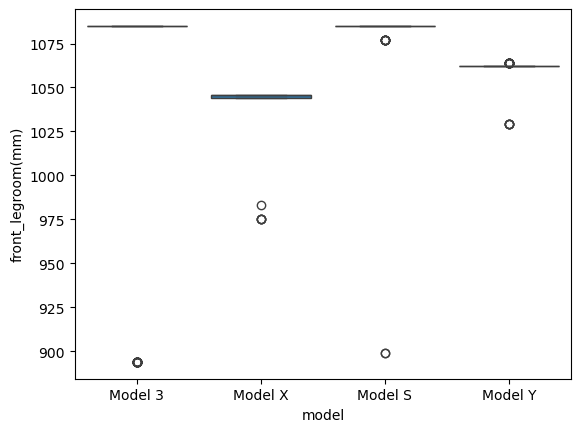

In [224]:
sns.boxplot(df, x='model', y='front_legroom(mm)')

**According to US Tesla Official, Leg Room in the front and rear are different, and they are different across models and model variants.** 

**Model 3**
- The Tesla Model 3 has 1,085 millimeters of leg room in the front and 894 millimeters in the rear.
- Source: https://www.tesla.com/ownersmanual/model3/en_us/GUID-56562137-FC31-4110-A13C-9A9FC6657BF0.html
- Across differnet year or variant, Model 3 does not have a front leg room of 894 mm.
- The front leg room for the Tesla Model 3 is consistently reported as 42.7 inches or 1,084-1,085 mm across different sources and model variants.

**Model S**
- The Tesla Model S (Current Version) has 1,077 millimeters of leg room in the front and 901 millimeters in the rear.
- Source: https://www.tesla.com/ownersmanual/models/en_us/GUID-91E5877F-3CD2-4B3B-B2B8-B5DB4A6C0A05.html
- The Tesla Model S (2012-2020) has 1,085 millimeters of leg room in the front and 899 millimeters in the rear.
- Source: https://www.tesla.com/ownersmanual/2012_2020_models/en_au/GUID-5FB8FC1E-0B1D-4ECC-99D6-4EEE2B8FB725.html
- The Tesla Model S has different front legroom measurements depending on the year and variant: ranging from 1077-1085mm.
- Yet, Model S does not have a front leg room of 899 mm.

**Model X**

- The Tesla Model X has 1,046 millimeters of leg room in the front. For the second and third rows, there are variations of legrooms for different seat model.
- Source: https://www.tesla.com/ownersmanual/modelx/en_us/GUID-91E5877F-3CD2-4B3B-B2B8-B5DB4A6C0A05.html
- Across differnet year or variant, Model X does not have a front leg room of 975, 983 mm, which are more likely refer to rear leg room.
- The front leg room approximately between 1044-1046 mm (after convertion from inches).

**Model Y**
- The Tesla Model Y has 1,063 millimeters of leg room in the front and 1029 millimeters in the rear.
- Source: https://www.tesla.com/ownersmanual/modely/en_us/GUID-E47C4A6D-528E-419C-8C57-FD3864644C34.html
- Across differnet year or variant, Model Y does not have a front leg room of 1029 mm, which are more likely refer to rear leg room.
- The front leg room approximately between 1062-1064 mm (after convertion from inches).

#### Check Outlinears And Errors. Correct it According to Official Tesla Document

Model 3 Outlinear

In [230]:
df[((df['model']=='Model 3') & (df['front_legroom(mm)']<=900))]

,title,price,Drivetrain,Exterior color,model,Year:,Trim:,Front legroom:,Cargo volume:,fuel_consume(L/100km),region,province,battery_charge_time(hr),battery_range(km),body_type,mileage(km),front_legroom(mm)
3,2019 Tesla Model 3 Standard Plus RWD,26888,Rear-Wheel Drive,Black,Model 3,2019.0,Standard Plus RWD,894 mm,NaN,1.900,North York,ON,10.0,386.0,Sedan,42000,894.0
9,2023 Tesla Model 3 Long Range AWD,42880,All-Wheel Drive,Blue(/Deep Blue Metallic),Model 3,2023.0,Long Range AWD,894 mm,NaN,1.900,Concord,ON,11.5,576.0,Sedan,26000,894.0
16,2020 Tesla Model 3 Performance AWD,36880,All-Wheel Drive,Gray(/Dark Grey/Stealth Grey/Charcoal),Model 3,2020.0,Performance AWD,894 mm,NaN,1.945,Concord,ON,10.0,481.0,Sedan,60716,894.0
22,2022 Tesla Model 3 Performance AWD,43880,All-Wheel Drive,Black,Model 3,2022.0,Performance AWD,894 mm,NaN,2.090,Concord,ON,10.0,507.0,Sedan,46600,894.0
30,2020 Tesla Model 3 Standard Range Plus RWD,24988,Rear-Wheel Drive,Red,Model 3,2020.0,Standard Range Plus RWD,894 mm,NaN,1.900,Oakville,ON,10.0,402.0,Sedan,100000,894.0
51,2020 Tesla Model 3 Long Range AWD,34490,All-Wheel Drive,White(/Pearl White Multi-Coat),Model 3,2020.0,Long Range AWD,894 mm,NaN,1.945,Concord,ON,10.0,518.0,Sedan,32453,894.0
57,2023 Tesla Model 3 Long Range AWD,41988,All-Wheel Drive,Gray(/Dark Grey/Stealth Grey/Charcoal),Model 3,2023.0,Long Range AWD,894 mm,NaN,1.900,Oakville,ON,11.5,576.0,Sedan,40000,894.0
90,2020 Tesla Model 3 Standard Range Plus RWD,25988,Rear-Wheel Drive,White(/Pearl White Multi-Coat),Model 3,2020.0,Standard Range Plus RWD,894 mm,NaN,1.900,Oakville,ON,10.0,402.0,Sedan,93000,894.0
91,2021 Tesla Model 3 Standard Range Plus RWD,28480,Rear-Wheel Drive,Blue(/Deep Blue Metallic),Model 3,2021.0,Standard Range Plus RWD,894 mm,NaN,1.900,Concord,ON,10.0,430.0,Sedan,68857,894.0
103,2020 Tesla Model 3 Long Range AWD,34490,All-Wheel Drive,Red,Model 3,2020.0,Long Range AWD,894 mm,NaN,1.945,Concord,ON,10.0,518.0,Sedan,35966,894.0


In [232]:
df.loc[(df['model'] == 'Model 3') & (df['front_legroom(mm)'] <= 900), 'front_legroom(mm)'] = 1085

Model S Outlinear

In [235]:
df[((df['model']=='Model S') & (df['front_legroom(mm)']<1077))]

,title,price,Drivetrain,Exterior color,model,Year:,Trim:,Front legroom:,Cargo volume:,fuel_consume(L/100km),region,province,battery_charge_time(hr),battery_range(km),body_type,mileage(km),front_legroom(mm)
399,2014 Tesla Model S P85 RWD,14999,Rear-Wheel Drive,White(/Pearl White Multi-Coat),Model S,2014.0,P85 RWD,899 mm,NaN,2.655,Halton Hills,ON,12.0,407.0,Sedan,304048,899.0
665,2021 Tesla Model S Long Range AWD,69900,All-Wheel Drive,Gray(/Dark Grey/Stealth Grey/Charcoal),Model S,2021.0,Long Range AWD,899 mm,NaN,1.945,Concord,ON,15.0,652.0,Sedan,31388,899.0


In [237]:
df.loc[(df['model'] == 'Model S') & (df['front_legroom(mm)'] < 1077), 'front_legroom(mm)'] = 1085

Model Y Outliner

In [240]:
df[((df['model']=='Model Y') & (df['front_legroom(mm)']==1029))]

,title,price,Drivetrain,Exterior color,model,Year:,Trim:,Front legroom:,Cargo volume:,fuel_consume(L/100km),region,province,battery_charge_time(hr),battery_range(km),body_type,mileage(km),front_legroom(mm)
68,2021 Tesla Model Y Long Range AWD,45800,All-Wheel Drive,White(/Pearl White Multi-Coat),Model Y,2021.0,Long Range AWD,1029 mm,NaN,1.945,Concord,ON,10.0,509.0,SUV/ Crossover,22965,1029.0
79,2021 Tesla Model Y Long Range AWD,37480,All-Wheel Drive,Black,Model Y,2021.0,Long Range AWD,1029 mm,NaN,1.945,Concord,ON,10.0,509.0,SUV/ Crossover,98600,1029.0
154,2021 Tesla Model Y Long Range AWD,36980,All-Wheel Drive,Gray(/Dark Grey/Stealth Grey/Charcoal),Model Y,2021.0,Long Range AWD,1029 mm,NaN,1.945,Concord,ON,10.0,509.0,SUV/ Crossover,113800,1029.0
462,2020 Tesla Model Y Performance AWD,37887,All-Wheel Drive,Black,Model Y,2020.0,Performance AWD,1029 mm,NaN,1.990,Concord,ON,10.0,507.0,SUV/ Crossover,119700,1029.0
819,2022 Tesla Model Y Performance AWD,59900,All-Wheel Drive,Gray(/Dark Grey/Stealth Grey/Charcoal),Model Y,2022.0,Performance AWD,1029 mm,NaN,2.090,Oakville,ON,10.0,488.0,SUV/ Crossover,24555,1029.0


In [242]:
df.loc[((df['model']=='Model Y') & (df['front_legroom(mm)']==1029)), 'front_legroom(mm)'] = 1063

Model X Outlinear

In [245]:
df[((df['model']=='Model X') & (df['front_legroom(mm)']<=983))]

,title,price,Drivetrain,Exterior color,model,Year:,Trim:,Front legroom:,Cargo volume:,fuel_consume(L/100km),region,province,battery_charge_time(hr),battery_range(km),body_type,mileage(km),front_legroom(mm)
31,2022 Tesla Model X Plaid AWD,120888,All-Wheel Drive,White(/Pearl White Multi-Coat),Model X,2022.0,Plaid AWD,983 mm,NaN,2.390,Vaughan,ON,12.0,504.0,SUV/ Crossover,9399,983.0
101,2016 Tesla Model X P90D AWD,49888,All-Wheel Drive,Gray(/Dark Grey/Stealth Grey/Charcoal),Model X,2016.0,P90D AWD,975 mm,NaN,2.600,Vancouver,BC,12.0,402.0,SUV/ Crossover,85049,975.0
480,2016 Tesla Model X 90D AWD,55777,All-Wheel Drive,Silver,Model X,2016.0,90D AWD,975 mm,NaN,2.555,Toronto,ON,12.0,414.0,SUV/ Crossover,71400,975.0
513,2017 Tesla Model X 100D AWD,64900,All-Wheel Drive,Blue(/Deep Blue Metallic),Model X,2017.0,100D AWD,975 mm,NaN,2.655,Burnaby,BC,12.0,475.0,SUV/ Crossover,97000,975.0
705,2020 Tesla Model X Long Range Plus AWD,71800,All-Wheel Drive,Gray(/Dark Grey/Stealth Grey/Charcoal),Model X,2020.0,Long Range Plus AWD,975 mm,NaN,2.245,Richmond,BC,12.0,565.0,SUV/ Crossover,65000,975.0


In [247]:
df.loc[((df['model']=='Model X') & (df['front_legroom(mm)']<=983)), 'front_legroom(mm)'] = 1045

<Axes: xlabel='model', ylabel='front_legroom(mm)'>

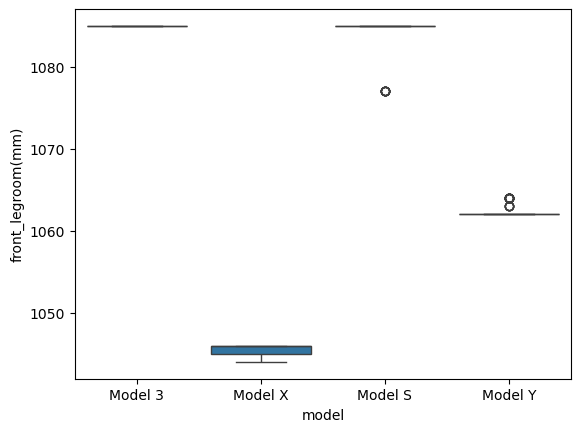

In [249]:
sns.boxplot(df, x='model', y='front_legroom(mm)')

In [250]:
fillna_median('front_legroom(mm)')

The original count of null values is:30
After filling null values with median based on each model group, the count of null values is:0
Further filling null values with general median, the final count of null values is:0


In [253]:
df = df.drop('Front legroom:',axis=1)

#### Column:Cargo volume

In [256]:
str2num(col='Cargo volume:', split_word='L', index=0, new_col='cargo_volume(L)',new_dtype='float')

,Cargo volume:,cargo_volume(L)
0,648 L,648.0
1,736 L,736.0
2,nan,NaN
3,nan,NaN
4,648 L,648.0
...,...,...
854,1925 L,1925.0
855,424 L,424.0
856,894 L,894.0
857,798 L,798.0


In [258]:
mean_median('cargo_volume(L)')

Mean:758.5108280254777
Median:648.0
                
Means Across Models:model
Model 3     494.458599
Model S     845.812500
Model X     755.551020
Model Y    1350.184080
Name: cargo_volume(L), dtype: float64
                
Median Across Models:model
Model 3    424.0
Model S    894.0
Model X    736.0
Model Y    971.0
Name: cargo_volume(L), dtype: float64


<Axes: xlabel='model', ylabel='cargo_volume(L)'>

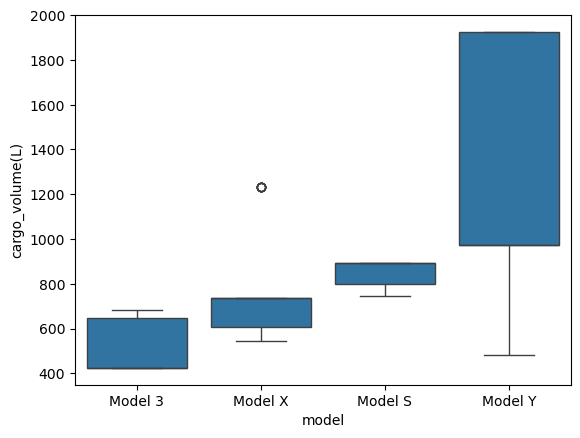

In [260]:
sns.boxplot(df, x='model', y='cargo_volume(L)')

In [261]:
df[(df['model']=='Model X') & (df['cargo_volume(L)']>1000)]

,title,price,Drivetrain,Exterior color,model,Year:,Trim:,Cargo volume:,fuel_consume(L/100km),region,province,battery_charge_time(hr),battery_range(km),body_type,mileage(km),front_legroom(mm),cargo_volume(L)
173,2023 Tesla Model X AWD,97500,All-Wheel Drive,Red,Model X,2023.0,AWD,1231 L,2.290,Sidney,BC,14.0,560.0,SUV/ Crossover,6000,1044.0,1231.0
287,2023 Tesla Model X AWD,97700,All-Wheel Drive,Black,Model X,2023.0,AWD,1231 L,2.290,Vancouver,BC,14.0,560.0,SUV/ Crossover,44000,1044.0,1231.0
379,2022 Tesla Model X AWD,91473,All-Wheel Drive,White(/Pearl White Multi-Coat),Model X,2022.0,AWD,1231 L,2.555,Windsor,ON,12.0,534.0,SUV/ Crossover,16100,1044.0,1231.0
454,2023 Tesla Model X AWD,95985,All-Wheel Drive,Gray(/Dark Grey/Stealth Grey/Charcoal),Model X,2023.0,AWD,1231 L,2.290,Laval,QC,14.0,560.0,SUV/ Crossover,39423,1044.0,1231.0
470,2022 Tesla Model X AWD,93888,All-Wheel Drive,Gray(/Dark Grey/Stealth Grey/Charcoal),Model X,2022.0,AWD,1231 L,2.290,Surrey,BC,12.0,534.0,SUV/ Crossover,51000,1044.0,1231.0
592,2022 Tesla Model X AWD,97888,All-Wheel Drive,Gray(/Dark Grey/Stealth Grey/Charcoal),Model X,2022.0,AWD,1231 L,2.290,Coquitlam,BC,12.0,534.0,SUV/ Crossover,48297,1044.0,1231.0
745,2022 Tesla Model X AWD,98800,All-Wheel Drive,Silver,Model X,2022.0,AWD,1231 L,2.290,Richmond,BC,12.0,534.0,SUV/ Crossover,56169,1044.0,1231.0


In [264]:
fillna_median('cargo_volume(L)')

The original count of null values is:72
After filling null values with median based on each model group, the count of null values is:0
Further filling null values with general median, the final count of null values is:0


In [266]:
df = df.drop('Cargo volume:',axis=1)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 857 entries, 0 to 858
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    857 non-null    object 
 1   price                    857 non-null    int64  
 2   Drivetrain               857 non-null    object 
 3   Exterior color           857 non-null    object 
 4   model                    857 non-null    object 
 5   Year:                    857 non-null    float64
 6   Trim:                    857 non-null    object 
 7   fuel_consume(L/100km)    857 non-null    float64
 8   region                   857 non-null    object 
 9   province                 857 non-null    object 
 10  battery_charge_time(hr)  857 non-null    float64
 11  battery_range(km)        857 non-null    float64
 12  body_type                857 non-null    object 
 13  mileage(km)              857 non-null    int64  
 14  front_legroom(mm)        857 no

In [270]:
df.reset_index(inplace=True,drop=True)

In [272]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    857 non-null    object 
 1   price                    857 non-null    int64  
 2   Drivetrain               857 non-null    object 
 3   Exterior color           857 non-null    object 
 4   model                    857 non-null    object 
 5   Year:                    857 non-null    float64
 6   Trim:                    857 non-null    object 
 7   fuel_consume(L/100km)    857 non-null    float64
 8   region                   857 non-null    object 
 9   province                 857 non-null    object 
 10  battery_charge_time(hr)  857 non-null    float64
 11  battery_range(km)        857 non-null    float64
 12  body_type                857 non-null    object 
 13  mileage(km)              857 non-null    int64  
 14  front_legroom(mm)        8

In [274]:
df = df.rename(columns={'Drivetrain':'drivetrain','Exterior color':'exterior_color','Year:':'year','Trim:':'trim','Condition:':'condition'})

In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    857 non-null    object 
 1   price                    857 non-null    int64  
 2   drivetrain               857 non-null    object 
 3   exterior_color           857 non-null    object 
 4   model                    857 non-null    object 
 5   year                     857 non-null    float64
 6   trim                     857 non-null    object 
 7   fuel_consume(L/100km)    857 non-null    float64
 8   region                   857 non-null    object 
 9   province                 857 non-null    object 
 10  battery_charge_time(hr)  857 non-null    float64
 11  battery_range(km)        857 non-null    float64
 12  body_type                857 non-null    object 
 13  mileage(km)              857 non-null    int64  
 14  front_legroom(mm)        8

### Save as CSV File

In [279]:
df.to_csv('clean_df.csv',index=False)

<h2 style="text-align:center; background-color:#d3ffe4; color:black; padding:5px;"><b>  Part II - Explorative Data Anaylsis + Visualisation </b></h2><a id="part-ii---explorative-data-analysis"></a>

In [282]:
df = pd.read_csv('clean_df.csv')

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    857 non-null    object 
 1   price                    857 non-null    int64  
 2   drivetrain               857 non-null    object 
 3   exterior_color           857 non-null    object 
 4   model                    857 non-null    object 
 5   year                     857 non-null    float64
 6   trim                     857 non-null    object 
 7   fuel_consume(L/100km)    857 non-null    float64
 8   region                   857 non-null    object 
 9   province                 857 non-null    object 
 10  battery_charge_time(hr)  857 non-null    float64
 11  battery_range(km)        857 non-null    float64
 12  body_type                857 non-null    object 
 13  mileage(km)              857 non-null    int64  
 14  front_legroom(mm)        8

In [286]:
df[df['region'].isnull()]

,title,price,drivetrain,exterior_color,model,year,trim,fuel_consume(L/100km),region,province,battery_charge_time(hr),battery_range(km),body_type,mileage(km),front_legroom(mm),cargo_volume(L)


In [288]:
df = df.dropna()

In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    857 non-null    object 
 1   price                    857 non-null    int64  
 2   drivetrain               857 non-null    object 
 3   exterior_color           857 non-null    object 
 4   model                    857 non-null    object 
 5   year                     857 non-null    float64
 6   trim                     857 non-null    object 
 7   fuel_consume(L/100km)    857 non-null    float64
 8   region                   857 non-null    object 
 9   province                 857 non-null    object 
 10  battery_charge_time(hr)  857 non-null    float64
 11  battery_range(km)        857 non-null    float64
 12  body_type                857 non-null    object 
 13  mileage(km)              857 non-null    int64  
 14  front_legroom(mm)        8

<Figure size 500x400 with 0 Axes>

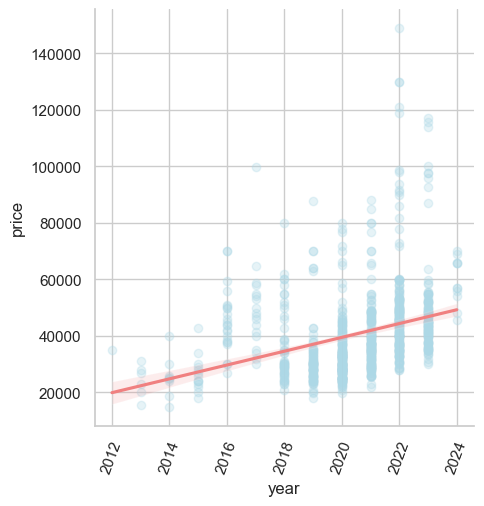

<Figure size 500x400 with 0 Axes>

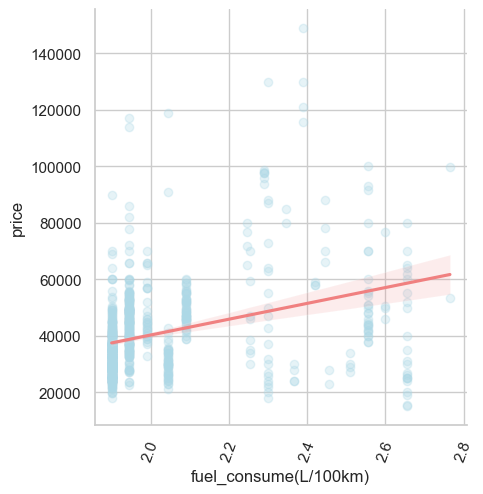

<Figure size 500x400 with 0 Axes>

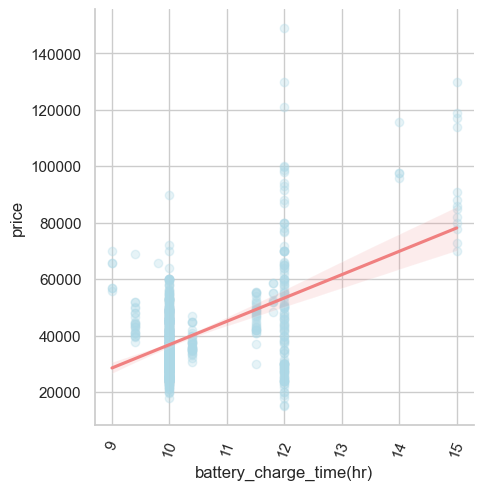

<Figure size 500x400 with 0 Axes>

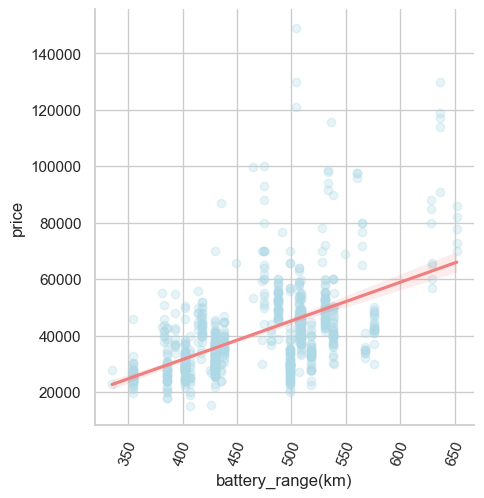

<Figure size 500x400 with 0 Axes>

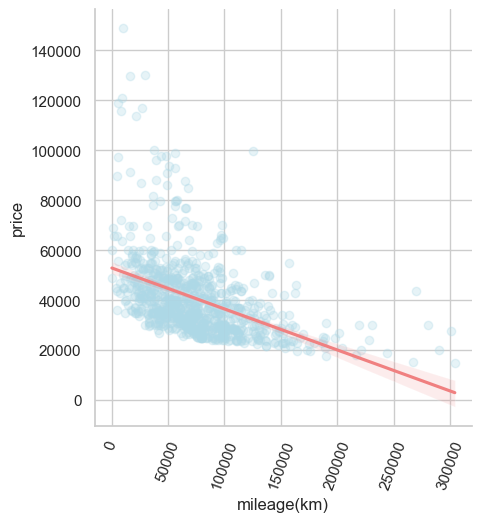

<Figure size 500x400 with 0 Axes>

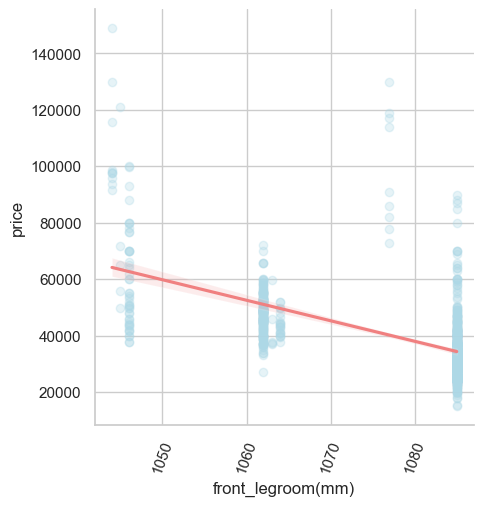

<Figure size 500x400 with 0 Axes>

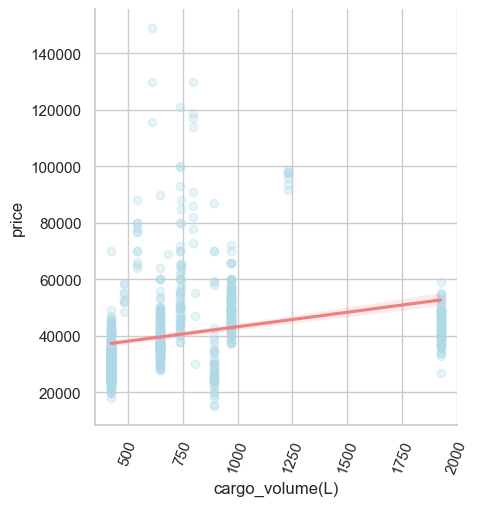

In [292]:
sns.set(style="whitegrid")
for col in df.drop('price',axis=1).select_dtypes(include=["int64", "float64"]):
    plt.figure(figsize=(5,4))
    sns.lmplot(data=df,x=col,y='price',scatter_kws={"color":"lightblue",'alpha':0.3},line_kws={"color":"lightcoral"})
    plt.xticks(rotation=70)
    plt.show()

<Figure size 800x600 with 0 Axes>

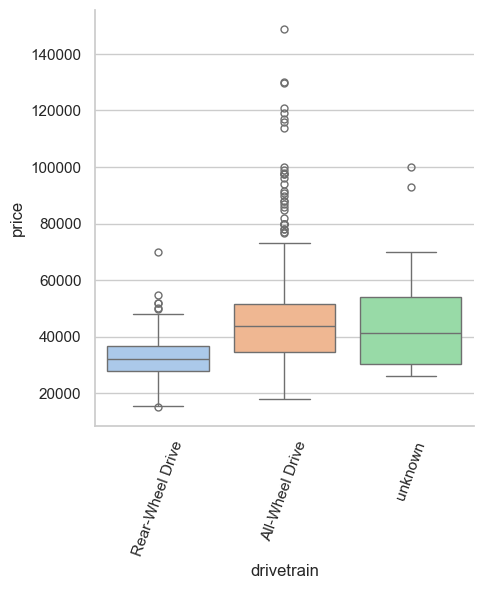

<Figure size 800x600 with 0 Axes>

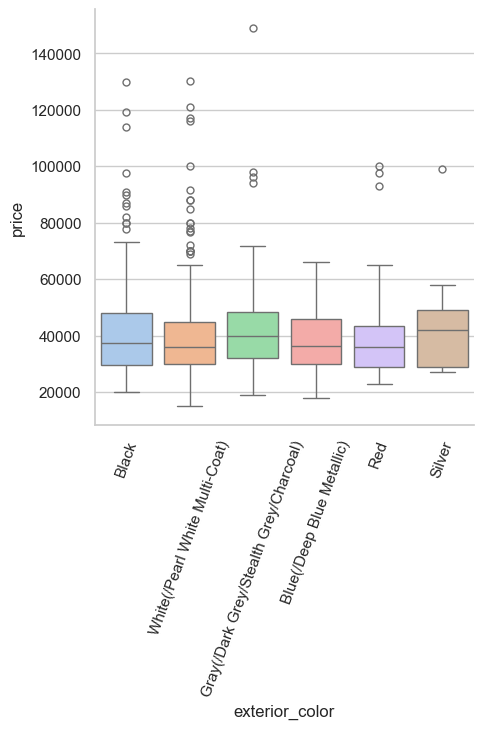

<Figure size 800x600 with 0 Axes>

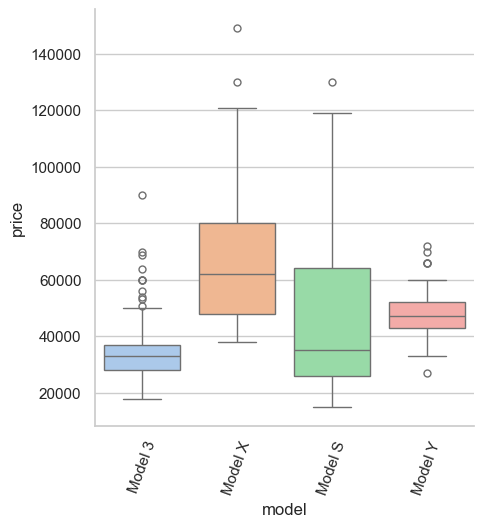

<Figure size 800x600 with 0 Axes>

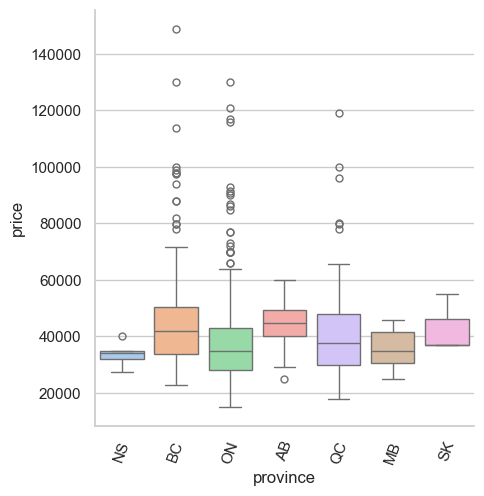

<Figure size 800x600 with 0 Axes>

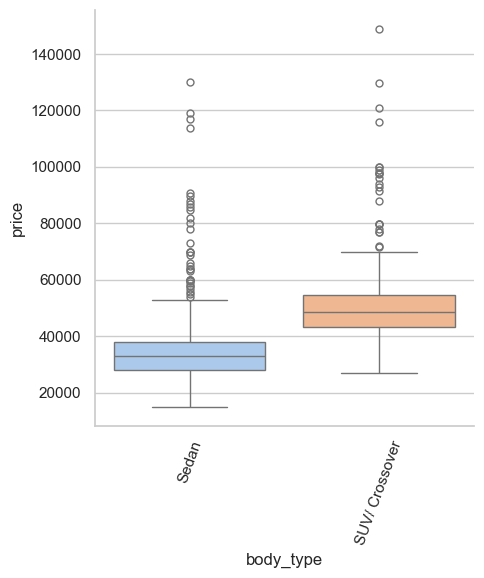

In [293]:
for col in df.drop(['price','title','region','trim'],axis=1).select_dtypes(include="object"):
    plt.figure(figsize=(8,6))
    g = sns.catplot(data=df,x=col,y='price',kind="box",hue=col, palette='pastel')
    plt.xticks(rotation=70)
    plt.show()

### Drop Outlinears, Narrow Down the Scrope to observe data where price < 80000 

In [295]:
filter = df[df['price']>=80000]

In [296]:
filter.shape

(26, 16)

In [297]:
df = df[df['price'] < 80000]

In [298]:
df.shape

(831, 16)

In [299]:
df.reset_index(inplace=True,drop=True)

<Figure size 500x400 with 0 Axes>

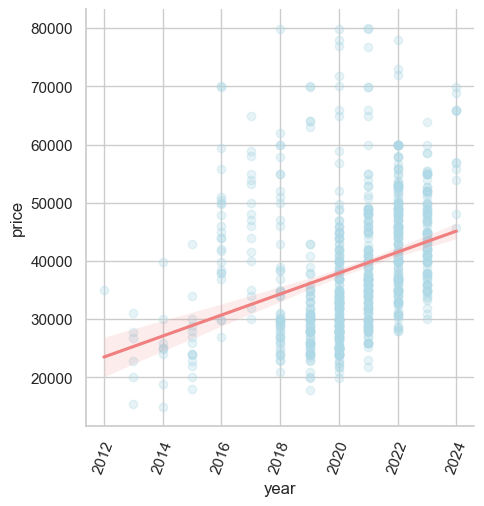

<Figure size 500x400 with 0 Axes>

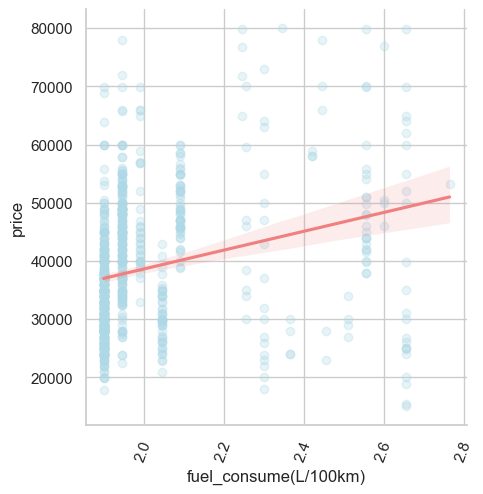

<Figure size 500x400 with 0 Axes>

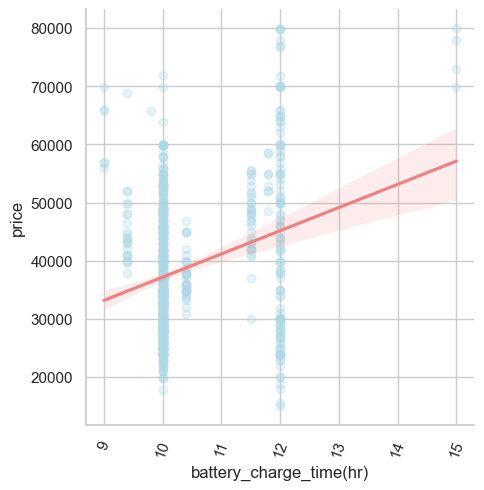

<Figure size 500x400 with 0 Axes>

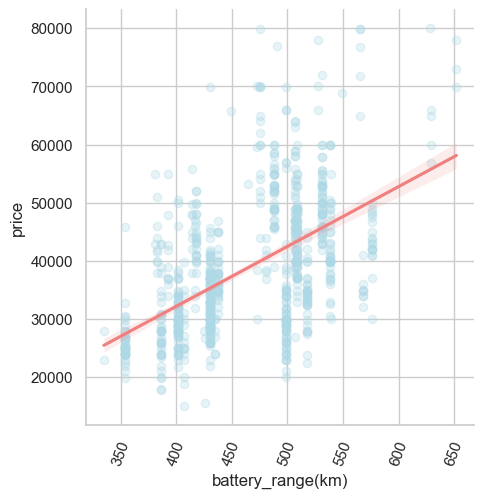

<Figure size 500x400 with 0 Axes>

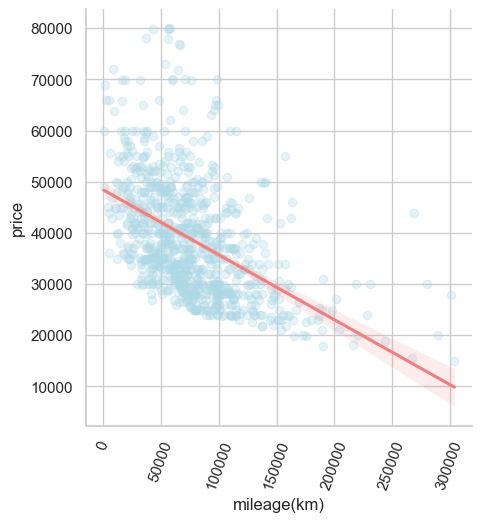

<Figure size 500x400 with 0 Axes>

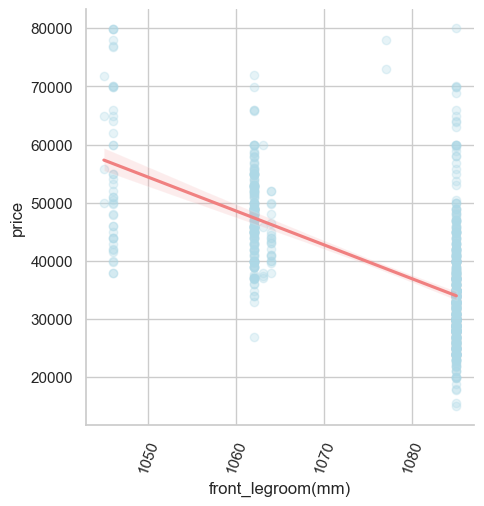

<Figure size 500x400 with 0 Axes>

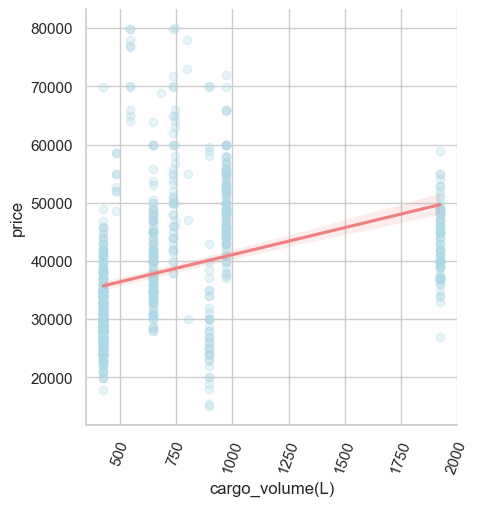

In [300]:
sns.set(style="whitegrid")
for col in df.drop('price',axis=1).select_dtypes(include=["int64", "float64"]):
    plt.figure(figsize=(5,4))
    sns.lmplot(data=df,x=col,y='price',scatter_kws={"color":"lightblue",'alpha':0.3},line_kws={"color":"lightcoral"})
    plt.xticks(rotation=70)
    plt.show()

<Figure size 800x600 with 0 Axes>

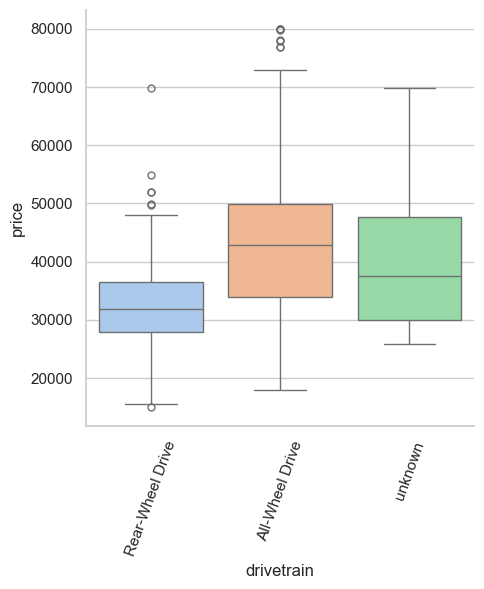

<Figure size 800x600 with 0 Axes>

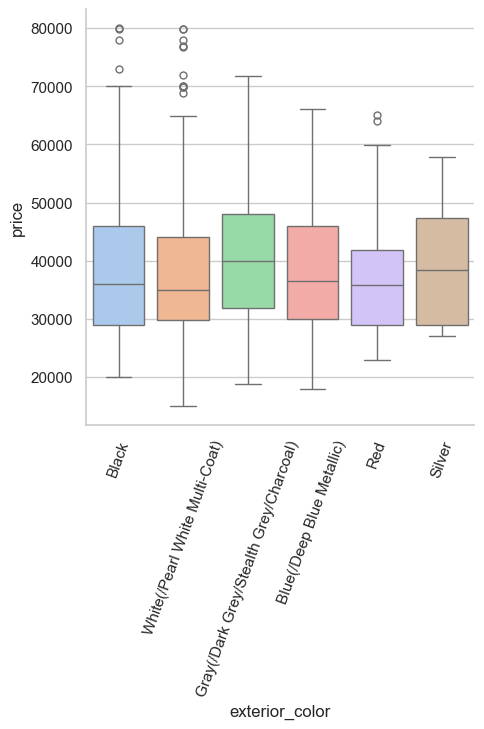

<Figure size 800x600 with 0 Axes>

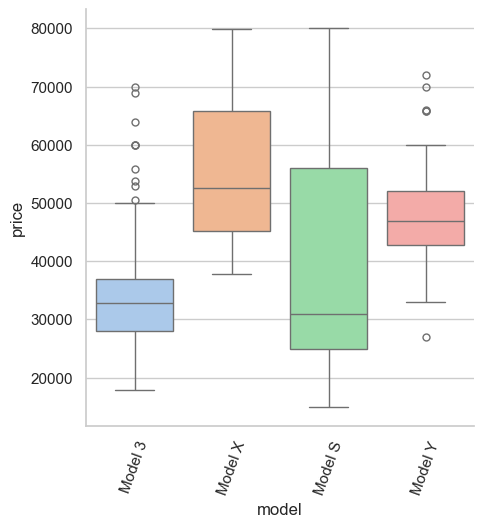

<Figure size 800x600 with 0 Axes>

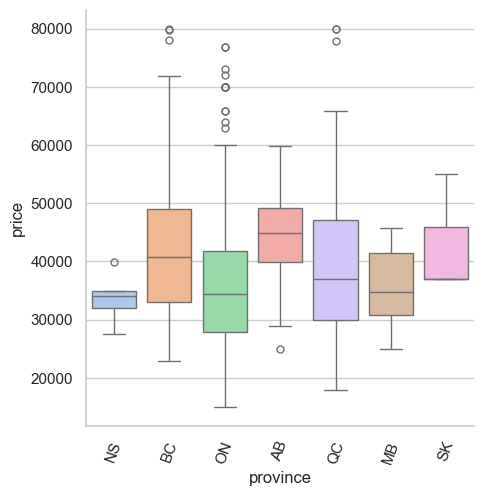

<Figure size 800x600 with 0 Axes>

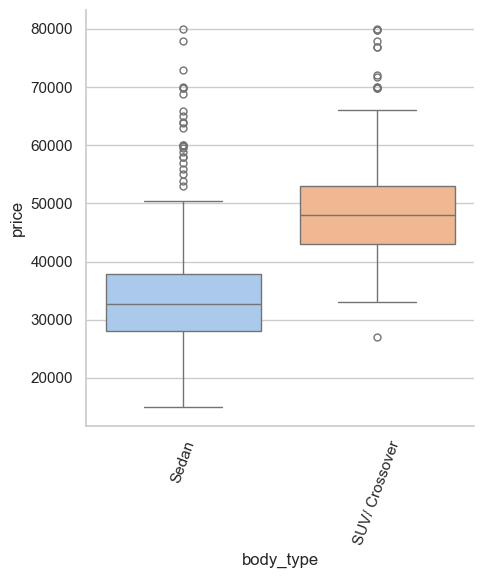

In [301]:
for col in df.drop(['price','title','region','trim'],axis=1).select_dtypes(include="object"):
    plt.figure(figsize=(8,6))
    g = sns.catplot(data=df,x=col,y='price',kind="box",hue=col, palette='pastel')
    plt.xticks(rotation=70)
    plt.show()

In [303]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    831 non-null    object 
 1   price                    831 non-null    int64  
 2   drivetrain               831 non-null    object 
 3   exterior_color           831 non-null    object 
 4   model                    831 non-null    object 
 5   year                     831 non-null    float64
 6   trim                     831 non-null    object 
 7   fuel_consume(L/100km)    831 non-null    float64
 8   region                   831 non-null    object 
 9   province                 831 non-null    object 
 10  battery_charge_time(hr)  831 non-null    float64
 11  battery_range(km)        831 non-null    float64
 12  body_type                831 non-null    object 
 13  mileage(km)              831 non-null    int64  
 14  front_legroom(mm)        8

In [304]:
df.describe()

,price,year,fuel_consume(L/100km),battery_charge_time(hr),battery_range(km),mileage(km),front_legroom(mm),cargo_volume(L)
count,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000,831.000000
mean,38658.008424,2020.403129,2.003225,10.366065,462.996390,76656.920578,1077.006017,740.705174
std,11434.948603,2.087817,0.191047,0.823234,60.697006,43787.223680,12.388343,444.793658
min,14999.000000,2012.000000,1.900000,9.000000,335.000000,300.000000,1045.000000,424.000000
25%,29900.000000,2020.000000,1.900000,10.000000,415.500000,46800.000000,1062.000000,424.000000
50%,36888.000000,2021.000000,1.945000,10.000000,465.000000,71000.000000,1085.000000,648.000000
75%,45797.500000,2022.000000,1.990000,10.000000,509.000000,98000.000000,1085.000000,894.000000
max,79999.000000,2024.000000,2.765000,15.000000,652.000000,304048.000000,1085.000000,1925.000000


In [305]:
df.corr(numeric_only= True)

,price,year,fuel_consume(L/100km),battery_charge_time(hr),battery_range(km),mileage(km),front_legroom(mm),cargo_volume(L)
price,1.000000,0.329228,0.270405,0.287191,0.546481,-0.485432,-0.631823,0.361872
year,0.329228,1.000000,-0.659799,-0.448229,0.320982,-0.610931,-0.071737,0.099120
fuel_consume(L/100km),0.270405,-0.659799,1.000000,0.670398,-0.023955,0.349780,-0.435755,0.103698
battery_charge_time(hr),0.287191,-0.448229,0.670398,1.000000,0.162292,0.221872,-0.197517,-0.021968
battery_range(km),0.546481,0.320982,-0.023955,0.162292,1.000000,-0.235210,-0.227716,0.276622
mileage(km),-0.485432,-0.610931,0.349780,0.221872,-0.235210,1.000000,0.100484,-0.053518
front_legroom(mm),-0.631823,-0.071737,-0.435755,-0.197517,-0.227716,0.100484,1.000000,-0.608339
cargo_volume(L),0.361872,0.099120,0.103698,-0.021968,0.276622,-0.053518,-0.608339,1.000000


<Axes: >

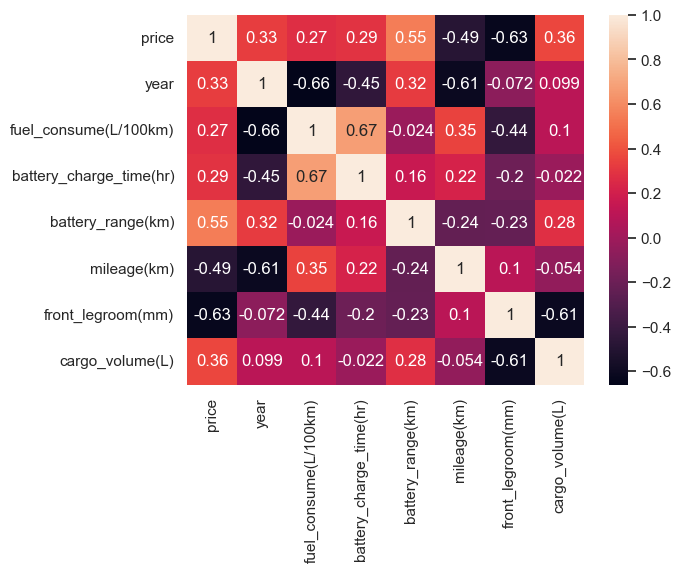

In [306]:
sns.heatmap(df.corr(numeric_only= True),annot=True)

In [307]:
# Sort correlation with price
corr = df.corr(numeric_only= True)
corr_sort = corr.sort_values(by="price",ascending=False)
price_corr_sort = corr_sort['price']
price_corr_sort

price                      1.000000
battery_range(km)          0.546481
cargo_volume(L)            0.361872
year                       0.329228
battery_charge_time(hr)    0.287191
fuel_consume(L/100km)      0.270405
mileage(km)               -0.485432
front_legroom(mm)         -0.631823
Name: price, dtype: float64

**Insights:**
- the least correlated feature:
  - fuel_consume(L/100km)        (0.270405)
- Highest Correlation:
    - 1. front_legroom(mm)       (-0.63182)
    - 2. battery_range(km)       (0.546481)
    - 2. mileage(km)             (-0.48543)
    - 3. cargo_volume(L)         (0.360934)
    - 4. year                    (0.329228)

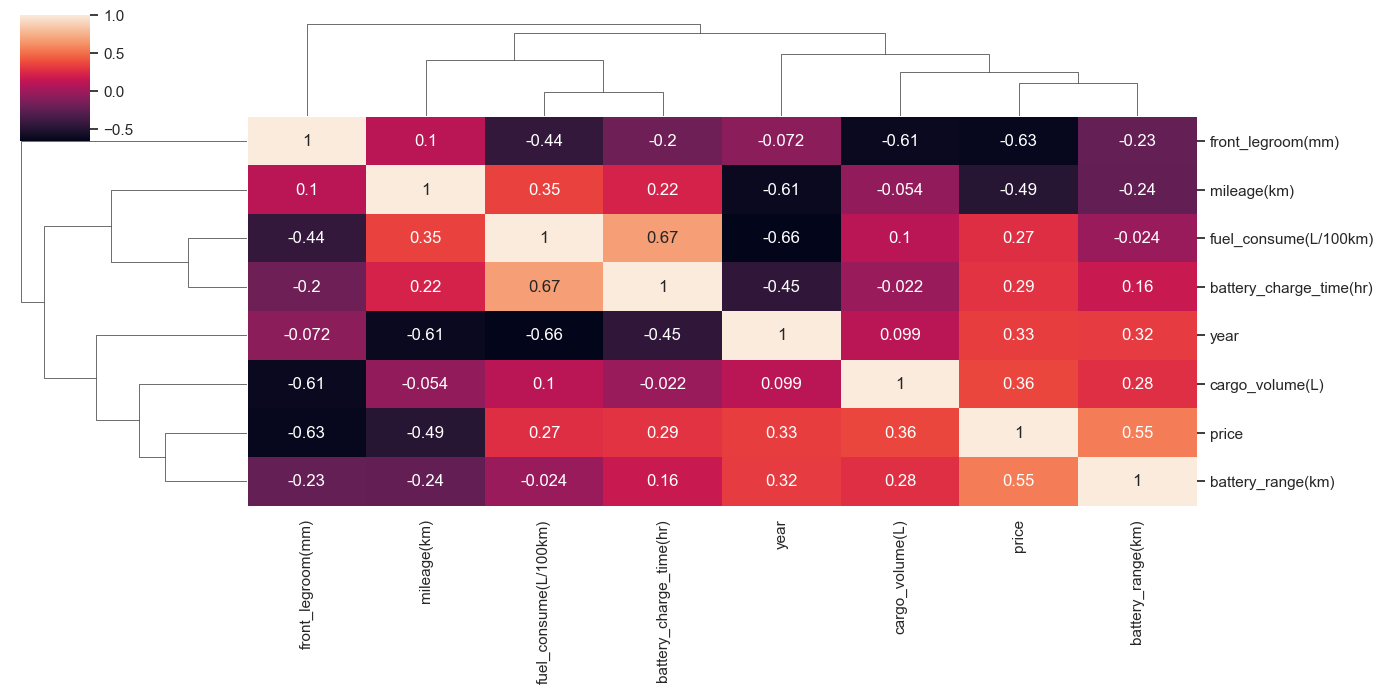

In [310]:
sns.clustermap(df.corr(numeric_only= True),annot=True,figsize=(14, 7))

<h2 style="text-align:center; background-color:#d3ffe4; color:black; padding:5px;"><b>  Part III - Statistical Anaylsis </b></h2><a id="part-iii---statistical-anaylsis"></a>


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    831 non-null    object 
 1   price                    831 non-null    int64  
 2   drivetrain               831 non-null    object 
 3   exterior_color           831 non-null    object 
 4   model                    831 non-null    object 
 5   year                     831 non-null    float64
 6   trim                     831 non-null    object 
 7   fuel_consume(L/100km)    831 non-null    float64
 8   region                   831 non-null    object 
 9   province                 831 non-null    object 
 10  battery_charge_time(hr)  831 non-null    float64
 11  battery_range(km)        831 non-null    float64
 12  body_type                831 non-null    object 
 13  mileage(km)              831 non-null    int64  
 14  front_legroom(mm)        8

## Anaylsis with Each Numerical Feature and its Polynomial Feature

### 1.1. Fitting Front Leg Room Feature

In [322]:
X = df['front_legroom(mm)']
y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     550.8
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           8.41e-94
Time:                        00:31:11   Log-Likelihood:                -8732.2
No. Observations:                 831   AIC:                         1.747e+04
Df Residuals:                     829   BIC:                         1.748e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              6.668e+05   2.68e+04     24.913      0.000    6.14e+05    7.19e+05
front_legroom(mm)  -583.1982     24.849    -23.470      0.000    -631.973    -534.424
==============================================================================
Omnibus:                      201.638   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              515.609
Skew:                           1.250   Prob(JB):                    1.09e-112
Kurtosis:                       5.939   Cond. No.                     9.37e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.37e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1.2. Fitting Front Leg Room Feature + Polynomial Feature

In [324]:
df_poly = df.assign(front_legroom_sq= df['front_legroom(mm)']**2)

X = df_poly[['front_legroom(mm)','front_legroom_sq']]
y = df_poly['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                     275.7
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           1.69e-92
Time:                        00:31:11   Log-Likelihood:                -8731.8
No. Observations:                 831   AIC:                         1.747e+04
Df Residuals:                     828   BIC:                         1.748e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.996e+06   3.04e+06     -0.657      0.511   -7.96e+06    3.97e+06
front_legroom(mm)  4394.6848   5677.869      0.774      0.439   -6750.025    1.55e+04
front_legroom_sq     -2.3261      2.653     -0.877      0.381      -7.534       2.882
==============================================================================
Omnibus:                      206.163   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              530.024
Skew:                           1.276   Prob(JB):                    8.07e-116
Kurtosis:                       5.966   Cond. No.                     1.15e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Insight:**

- **Better R-squared Result with Polynomial Feature**

### 2.1. Fitting Battery Range Feature

In [327]:
X = df['battery_range(km)']
y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.298
Method:                 Least Squares   F-statistic:                     353.0
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           7.02e-66
Time:                        00:31:11   Log-Likelihood:                -8796.5
No. Observations:                 831   AIC:                         1.760e+04
Df Residuals:                     829   BIC:                         1.761e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -9009.1484   2558.782     -3.521      0.000    -1.4e+04   -3986.695
battery_range(km)   102.9536      5.480     18.788      0.000      92.198     113.709
==============================================================================
Omnibus:                       84.470   Durbin-Watson:                   1.806
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.621
Skew:                           0.752   Prob(JB):                     6.42e-27
Kurtosis:                       4.106   Cond. No.                     3.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 2.2. Fitting Battery Range Feature + Polynomial Feature

In [329]:
df_poly = df_poly.assign(battery_range_sq = df['battery_range(km)']**2)

X = df_poly[['battery_range(km)','battery_range_sq']]
y = df_poly['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.299
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     176.3
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           1.59e-64
Time:                        00:31:11   Log-Likelihood:                -8796.4
No. Observations:                 831   AIC:                         1.760e+04
Df Residuals:                     828   BIC:                         1.761e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -4046.6183   1.73e+04     -0.234      0.815    -3.8e+04    2.99e+04
battery_range(km)    81.3278     74.647      1.089      0.276     -65.192     227.848
battery_range_sq      0.0232      0.080      0.290      0.772      -0.133       0.180
==============================================================================
Omnibus:                       84.763   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              121.085
Skew:                           0.754   Prob(JB):                     5.09e-27
Kurtosis:                       4.107   Cond. No.                     1.17e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Insight:**

- **Better R-squared Result with Polynomial Feature**

### 3.1. Fitting Battery Charge Time Feature

In [332]:
X = df['battery_charge_time(hr)']
y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     74.52
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           3.04e-17
Time:                        00:31:11   Log-Likelihood:                -8908.1
No. Observations:                 831   AIC:                         1.782e+04
Df Residuals:                     829   BIC:                         1.783e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -2693.9007   4805.285     -0.561      0.575   -1.21e+04    6738.056
battery_charge_time(hr)  3989.1617    462.106      8.633      0.000    3082.126    4896.197
==============================================================================
Omnibus:                       36.554   Durbin-Watson:                   1.799
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.526
Skew:                           0.507   Prob(JB):                     1.58e-09
Kurtosis:                       3.378   Cond. No.                         133.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 3.2. Fitting Battery Charge Time Feature + Polynomial Feature

In [335]:
df_poly = df_poly.assign(battery_charge_time_sq = df['battery_charge_time(hr)']**2)

X = df_poly[['battery_charge_time(hr)','battery_charge_time_sq']]
y = df_poly['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     54.50
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           5.80e-23
Time:                        00:31:12   Log-Likelihood:                -8892.5
No. Observations:                 831   AIC:                         1.779e+04
Df Residuals:                     828   BIC:                         1.781e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2.364e+05   4.27e+04      5.535      0.000    1.53e+05     3.2e+05
battery_charge_time(hr)  -3.93e+04   7699.169     -5.104      0.000   -5.44e+04   -2.42e+04
battery_charge_time_sq   1938.7309    344.214      5.632      0.000    1263.097    2614.365
==============================================================================
Omnibus:                       37.198   Durbin-Watson:                   1.771
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.096
Skew:                           0.521   Prob(JB):                     1.19e-09
Kurtosis:                       3.317   Cond. No.                     1.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.1. Fitting Mileage Feature

In [337]:
X = df['mileage(km)']
y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     255.6
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           2.40e-50
Time:                        00:31:12   Log-Likelihood:                -8832.2
No. Observations:                 831   AIC:                         1.767e+04
Df Residuals:                     829   BIC:                         1.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        4.838e+04    699.942     69.114      0.000     4.7e+04    4.97e+04
mileage(km)    -0.1268      0.008    -15.987      0.000      -0.142      -0.111
==============================================================================
Omnibus:                      158.331   Durbin-Watson:                   1.717
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              275.617
Skew:                           1.167   Prob(JB):                     1.41e-60
Kurtosis:                       4.586   Cond. No.                     1.78e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 4.2. Fitting Mileage Feature + Polynomial Feature

In [339]:
df_poly = df_poly.assign(mileage_sq = df['mileage(km)']**2)

X = df_poly[['mileage(km)','mileage_sq']]
y = df_poly['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.252
Model:                            OLS   Adj. R-squared:                  0.251
Method:                 Least Squares   F-statistic:                     139.8
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           4.78e-53
Time:                        00:31:12   Log-Likelihood:                -8822.9
No. Observations:                 831   AIC:                         1.765e+04
Df Residuals:                     828   BIC:                         1.767e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.179e+04   1051.098     49.272      0.000    4.97e+04    5.39e+04
mileage(km)    -0.2119      0.021     -9.990      0.000      -0.253      -0.170
mileage_sq   3.989e-07   9.24e-08      4.319      0.000    2.18e-07     5.8e-07
==============================================================================
Omnibus:                      169.029   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.501
Skew:                           1.205   Prob(JB):                     2.28e-68
Kurtosis:                       4.786   Cond. No.                     3.89e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5.1. Fitting Year Feature

In [345]:
X = df['year']
y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     100.8
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           1.85e-22
Time:                        00:31:12   Log-Likelihood:                -8896.2
No. Observations:                 831   AIC:                         1.780e+04
Df Residuals:                     829   BIC:                         1.781e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.604e+06   3.63e+05     -9.932      0.000   -4.32e+06   -2.89e+06
year        1803.1797    179.619     10.039      0.000    1450.619    2155.741
==============================================================================
Omnibus:                      173.315   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              321.941
Skew:                           1.230   Prob(JB):                     1.23e-70
Kurtosis:                       4.801   Cond. No.                     1.96e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5.2 Fitting Year Feature + Polynomial Feature

In [349]:
df_poly = df_poly.assign(year_sq= df['year']**2)

X = df_poly[['year','year_sq']]
y = df_poly['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     68.03
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           4.40e-28
Time:                        00:31:12   Log-Likelihood:                -8880.6
No. Observations:                 831   AIC:                         1.777e+04
Df Residuals:                     828   BIC:                         1.778e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.27e+09   2.27e+08      5.603      0.000    8.25e+08    1.72e+09
year        -1.26e+06   2.25e+05     -5.611      0.000    -1.7e+06   -8.19e+05
year_sq      312.4446     55.606      5.619      0.000     203.299     421.590
==============================================================================
Omnibus:                      207.342   Durbin-Watson:                   1.801
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              453.951
Skew:                           1.364   Prob(JB):                     2.67e-99
Kurtosis:                       5.380   Cond. No.                     2.51e+12
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.51e+12. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 6.1 Fitting Cargo Volume Feature

In [351]:
X = df['cargo_volume(L)']
y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.131
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     124.9
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           4.11e-27
Time:                        00:31:12   Log-Likelihood:                -8885.5
No. Observations:                 831   AIC:                         1.778e+04
Df Residuals:                     829   BIC:                         1.778e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.177e+04    719.054     44.179      0.000    3.04e+04    3.32e+04
cargo_volume(L)     9.3032      0.832     11.177      0.000       7.669      10.937
==============================================================================
Omnibus:                      166.361   Durbin-Watson:                   1.763
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              320.972
Skew:                           1.159   Prob(JB):                     2.00e-70
Kurtosis:                       4.975   Cond. No.                     1.68e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.68e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 6.2 Fitting Cargo Vulume Feature + Polynomical Feature

In [355]:
df_poly = df_poly.assign(cargo_volume_sq = df['cargo_volume(L)']**2)

X = df_poly[['cargo_volume(L)','cargo_volume_sq']]
y = df_poly['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.309
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     185.5
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           2.64e-67
Time:                        00:31:12   Log-Likelihood:                -8790.0
No. Observations:                 831   AIC:                         1.759e+04
Df Residuals:                     828   BIC:                         1.760e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            9901.1543   1626.329      6.088      0.000    6708.942    1.31e+04
cargo_volume(L)    62.4191      3.706     16.845      0.000      55.146      69.693
cargo_volume_sq    -0.0234      0.002    -14.631      0.000      -0.027      -0.020
==============================================================================
Omnibus:                      164.878   Durbin-Watson:                   1.786
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              580.541
Skew:                           0.919   Prob(JB):                    8.65e-127
Kurtosis:                       6.659   Cond. No.                     6.26e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.26e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 7.1 Fitting Fuel Consumption Feature

In [366]:
X = df['fuel_consume(L/100km)']
y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     65.40
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           2.17e-15
Time:                        00:31:12   Log-Likelihood:                -8912.3
No. Observations:                 831   AIC:                         1.783e+04
Df Residuals:                     829   BIC:                         1.784e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  6236.1652   4027.372      1.548      0.122   -1668.880    1.41e+04
fuel_consume(L/100km)  1.618e+04   2001.374      8.087      0.000    1.23e+04    2.01e+04
==============================================================================
Omnibus:                       42.435   Durbin-Watson:                   1.827
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.738
Skew:                           0.510   Prob(JB):                     9.60e-12
Kurtosis:                       3.651   Cond. No.                         26.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 7.2 Fitting Fuel Consumption Feature¶ + Polynomial Feature

In [371]:
df_poly = df_poly.assign(fuel_consume_sq = df['fuel_consume(L/100km)']**2)

X = df_poly[['fuel_consume(L/100km)','fuel_consume_sq']]
y = df_poly['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     61.96
Date:                Fri, 29 Nov 2024   Prob (F-statistic):           8.40e-26
Time:                        00:31:12   Log-Likelihood:                -8885.9
No. Observations:                 831   AIC:                         1.778e+04
Df Residuals:                     828   BIC:                         1.779e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -3.589e+05   4.97e+04     -7.222      0.000   -4.56e+05   -2.61e+05
fuel_consume(L/100km)  3.502e+05   4.54e+04      7.720      0.000    2.61e+05    4.39e+05
fuel_consume_sq       -7.504e+04   1.02e+04     -7.370      0.000    -9.5e+04   -5.51e+04
==============================================================================
Omnibus:                       39.134   Durbin-Watson:                   1.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               50.522
Skew:                           0.448   Prob(JB):                     1.07e-11
Kurtosis:                       3.810   Cond. No.                         863.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Insights:
- **All numerical features with polynomial features have improved the r2 result, sightly or greatly.**


## Fitting All 7 Numerical Features 

In [377]:
# 7 numberical columns)
numerical_columns = ['year',
                     'mileage(km)',
                     'fuel_consume(L/100km)',
                     'battery_charge_time(hr)',
                     'battery_range(km)',
                     'front_legroom(mm)',
                     'cargo_volume(L)']

In [379]:
numerical_poly_columns = ['year','year_sq',
                     'mileage(km)','mileage_sq',
                     'fuel_consume(L/100km)','fuel_consume_sq',
                     'battery_charge_time(hr)','battery_charge_time_sq',
                     'battery_range(km)','battery_range_sq',
                     'front_legroom(mm)','front_legroom_sq',
                     'cargo_volume(L)','cargo_volume_sq']

In [381]:
df_poly.columns

Index(['title', 'price', 'drivetrain', 'exterior_color', 'model', 'year',
       'trim', 'fuel_consume(L/100km)', 'region', 'province',
       'battery_charge_time(hr)', 'battery_range(km)', 'body_type',
       'mileage(km)', 'front_legroom(mm)', 'cargo_volume(L)',
       'front_legroom_sq', 'battery_range_sq', 'battery_charge_time_sq',
       'mileage_sq', 'year_sq', 'cargo_volume_sq', 'fuel_consume_sq'],
      dtype='object')

### 1.1. Fiting All 7 Numerical Features

In [384]:
X = df[numerical_columns]
y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.770
Method:                 Least Squares   F-statistic:                     397.6
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          4.99e-259
Time:                        00:31:12   Log-Likelihood:                -8330.0
No. Observations:                 831   AIC:                         1.668e+04
Df Residuals:                     823   BIC:                         1.671e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -3.087e+06   3.63e+05     -8.493      0.000    -3.8e+06   -2.37e+06
year                     1662.3325    172.190      9.654      0.000    1324.349    2000.316
mileage(km)                -0.0952      0.006    -17.213      0.000      -0.106      -0.084
fuel_consume(L/100km)    2.161e+04   2097.889     10.301      0.000    1.75e+04    2.57e+04
battery_charge_time(hr)  2159.4065    331.015      6.524      0.000    1509.674    2809.139
battery_range(km)          51.1879      3.698     13.843      0.000      43.930      58.446
front_legroom(mm)        -293.0082     25.858    -11.332      0.000    -343.763    -242.254
cargo_volume(L)             0.2567      0.580      0.443      0.658      -0.882       1.395
==============================================================================
Omnibus:                      197.579   Durbin-Watson:                   1.294
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              576.283
Skew:                           1.173   Prob(JB):                    7.27e-126
Kurtosis:                       6.338   Cond. No.                     1.69e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.69e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1.2. Fitting All 7 Numerical Features + Polynomial Features

In [387]:
X = df_poly[numerical_poly_columns]
y = df['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     242.3
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          1.05e-269
Time:                        00:31:13   Log-Likelihood:                -8287.3
No. Observations:                 831   AIC:                         1.660e+04
Df Residuals:                     817   BIC:                         1.667e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       5.5666      3.326      1.674      0.095      -0.962      12.095
year                     1.326e+04   3609.208      3.674      0.000    6176.197    2.03e+04
year_sq                    -2.9164      0.903     -3.230      0.001      -4.689      -1.144
mileage(km)                -0.1284      0.013    -10.030      0.000      -0.154      -0.103
mileage_sq               1.626e-07   5.39e-08      3.018      0.003    5.68e-08    2.68e-07
fuel_consume(L/100km)     1.68e+05    2.6e+04      6.466      0.000    1.17e+05    2.19e+05
fuel_consume_sq         -3.394e+04   5875.415     -5.776      0.000   -4.55e+04   -2.24e+04
battery_charge_time(hr) -2.194e+04   4211.729     -5.210      0.000   -3.02e+04   -1.37e+04
battery_charge_time_sq   1050.4443    188.782      5.564      0.000     679.890    1420.999
battery_range(km)         -43.9792     50.738     -0.867      0.386    -143.572      55.613
battery_range_sq            0.0963      0.054      1.771      0.077      -0.010       0.203
front_legroom(mm)       -2.761e+04   6772.300     -4.078      0.000   -4.09e+04   -1.43e+04
front_legroom_sq           12.7679      3.167      4.031      0.000       6.551      18.985
cargo_volume(L)             7.2026      3.457      2.083      0.038       0.416      13.989
cargo_volume_sq            -0.0024      0.001     -1.793      0.073      -0.005       0.000
==============================================================================
Omnibus:                      203.798   Durbin-Watson:                   1.232
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              643.527
Skew:                           1.180   Prob(JB):                    1.82e-140
Kurtosis:                       6.608   Cond. No.                     1.44e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Insight:
- **All features' p-value are under 0.5.**

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    831 non-null    object 
 1   price                    831 non-null    int64  
 2   drivetrain               831 non-null    object 
 3   exterior_color           831 non-null    object 
 4   model                    831 non-null    object 
 5   year                     831 non-null    float64
 6   trim                     831 non-null    object 
 7   fuel_consume(L/100km)    831 non-null    float64
 8   region                   831 non-null    object 
 9   province                 831 non-null    object 
 10  battery_charge_time(hr)  831 non-null    float64
 11  battery_range(km)        831 non-null    float64
 12  body_type                831 non-null    object 
 13  mileage(km)              831 non-null    int64  
 14  front_legroom(mm)        8

## Fitting Numerical and Categorical Features

In [393]:
cat_col = df.select_dtypes('object').columns
cat_col

Index(['title', 'drivetrain', 'exterior_color', 'model', 'trim', 'region',
       'province', 'body_type'],
      dtype='object')

In [395]:
for col in cat_col:
    print(df[col].value_counts(normalize=True))

title
2020 Tesla Model 3 Standard Range Plus RWD    0.093863
2021 Tesla Model 3 Standard Range Plus RWD    0.086643
2022 Tesla Model 3 RWD                        0.062575
2021 Tesla Model Y Long Range AWD             0.051745
2022 Tesla Model 3 Long Range AWD             0.044525
                                                ...   
2019 Tesla Model 3 Mid Range RWD              0.001203
2024 Tesla Model Y Performance AWD            0.001203
2020 Tesla Model X Performance AWD            0.001203
2024 Tesla Model Y RWD                        0.001203
2015 Tesla Model S P90D AWD                   0.001203
Name: proportion, Length: 86, dtype: float64
drivetrain
All-Wheel Drive     0.563177
Rear-Wheel Drive    0.407942
unknown             0.028881
Name: proportion, dtype: float64
exterior_color
White(/Pearl White Multi-Coat)            0.401925
Gray(/Dark Grey/Stealth Grey/Charcoal)    0.194946
Black                                     0.186522
Blue(/Deep Blue Metallic)                 0.1

In [397]:
df_encoded=df.copy()

In [399]:
columns_to_encode = ['drivetrain', 'exterior_color', 'model', 'trim', 'province', 'body_type']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()


for col in columns_to_encode:
    df_encoded[col] = le.fit_transform(df_encoded[col])
    print(f"Label encoding for {col} column:")
    print(le.classes_)
    print("          ")
    column_mapping = dict(zip(le.classes_, range(len(le.classes_))))
    print(f"Label mapping for {col} columne:")
    print(column_mapping)
    print("          ")
    print("==========")

Label encoding for drivetrain column:
['All-Wheel Drive' 'Rear-Wheel Drive' 'unknown']
          
Label mapping for drivetrain columne:
{'All-Wheel Drive': 0, 'Rear-Wheel Drive': 1, 'unknown': 2}
          
Label encoding for exterior_color column:
['Black' 'Blue(/Deep Blue Metallic)'
 'Gray(/Dark Grey/Stealth Grey/Charcoal)' 'Red' 'Silver'
 'White(/Pearl White Multi-Coat)']
          
Label mapping for exterior_color columne:
{'Black': 0, 'Blue(/Deep Blue Metallic)': 1, 'Gray(/Dark Grey/Stealth Grey/Charcoal)': 2, 'Red': 3, 'Silver': 4, 'White(/Pearl White Multi-Coat)': 5}
          
Label encoding for model column:
['Model 3' 'Model S' 'Model X' 'Model Y']
          
Label mapping for model columne:
{'Model 3': 0, 'Model S': 1, 'Model X': 2, 'Model Y': 3}
          
Label encoding for trim column:
['100D AWD' '60 RWD' '70D AWD' '75D AWD' '85 RWD' '85D AWD' '90D AWD'
 'AWD' 'Long Range AWD' 'Long Range Plus AWD' 'Long Range RWD'
 'Mid Range RWD' 'P100D AWD' 'P85 RWD' 'P85D AWD' 'P90D 

In [401]:
df_encoded.head()

,title,price,drivetrain,exterior_color,model,year,trim,fuel_consume(L/100km),region,province,battery_charge_time(hr),battery_range(km),body_type,mileage(km),front_legroom(mm),cargo_volume(L)
0,2022 Tesla Model 3 RWD,34999,1,0,0,2022.0,20,1.900,Truro,3,10.0,430.0,1,51060,1085.0,648.0
1,2017 Tesla Model X 100D AWD,49980,0,5,2,2017.0,0,2.655,North Vancouver,1,12.0,475.0,0,136200,1046.0,736.0
2,2020 Tesla Model 3,31690,2,5,0,2020.0,26,1.900,Richmond,1,10.0,430.0,1,41722,1085.0,424.0
3,2019 Tesla Model 3 Standard Plus RWD,26888,1,0,0,2019.0,21,1.900,North York,4,10.0,386.0,1,42000,1085.0,424.0
4,2022 Tesla Model 3 Long Range AWD,39990,0,2,0,2022.0,8,1.900,Calgary,0,10.0,538.0,1,50870,1085.0,648.0


### 1.1. Fitting numerical features + some catgeorical features

In [404]:
X = df_encoded.drop(['price','region','title','trim'],axis=1)
y = df_encoded['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     354.7
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          2.56e-314
Time:                        00:31:13   Log-Likelihood:                -8185.5
No. Observations:                 831   AIC:                         1.640e+04
Df Residuals:                     818   BIC:                         1.646e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                   -1.947e+06   3.43e+05     -5.683      0.000   -2.62e+06   -1.27e+06
drivetrain              -1179.2937    382.301     -3.085      0.002   -1929.701    -428.886
exterior_color             27.4191     81.589      0.336      0.737    -132.730     187.568
model                    1.866e+04   1355.494     13.768      0.000     1.6e+04    2.13e+04
year                     2136.4393    149.463     14.294      0.000    1843.064    2429.815
fuel_consume(L/100km)    5369.1461   2198.240      2.442      0.015    1054.291    9684.001
province                -1281.9060    103.514    -12.384      0.000   -1485.091   -1078.721
battery_charge_time(hr)  -739.8702    363.176     -2.037      0.042   -1452.737     -27.004
battery_range(km)          47.0759      3.760     12.519      0.000      39.695      54.457
body_type                9.762e+04   7391.531     13.207      0.000    8.31e+04    1.12e+05
mileage(km)                -0.0854      0.005    -17.994      0.000      -0.095      -0.076
front_legroom(mm)       -2253.9226    160.822    -14.015      0.000   -2569.595   -1938.250
cargo_volume(L)            -2.9100      0.645     -4.513      0.000      -4.176      -1.644
==============================================================================
Omnibus:                      209.116   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              878.877
Skew:                           1.111   Prob(JB):                    1.43e-191
Kurtosis:                       7.521   Cond. No.                     1.89e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    831 non-null    object 
 1   price                    831 non-null    int64  
 2   drivetrain               831 non-null    object 
 3   exterior_color           831 non-null    object 
 4   model                    831 non-null    object 
 5   year                     831 non-null    float64
 6   trim                     831 non-null    object 
 7   fuel_consume(L/100km)    831 non-null    float64
 8   region                   831 non-null    object 
 9   province                 831 non-null    object 
 10  battery_charge_time(hr)  831 non-null    float64
 11  battery_range(km)        831 non-null    float64
 12  body_type                831 non-null    object 
 13  mileage(km)              831 non-null    int64  
 14  front_legroom(mm)        8

In [408]:
df_poly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    831 non-null    object 
 1   price                    831 non-null    int64  
 2   drivetrain               831 non-null    object 
 3   exterior_color           831 non-null    object 
 4   model                    831 non-null    object 
 5   year                     831 non-null    float64
 6   trim                     831 non-null    object 
 7   fuel_consume(L/100km)    831 non-null    float64
 8   region                   831 non-null    object 
 9   province                 831 non-null    object 
 10  battery_charge_time(hr)  831 non-null    float64
 11  battery_range(km)        831 non-null    float64
 12  body_type                831 non-null    object 
 13  mileage(km)              831 non-null    int64  
 14  front_legroom(mm)        8

### 1.2. Fitting numerical features + polynomial features + some catgeorical features

In [412]:
df_poly_encoded = df_poly.copy()

In [414]:
df_poly_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    831 non-null    object 
 1   price                    831 non-null    int64  
 2   drivetrain               831 non-null    object 
 3   exterior_color           831 non-null    object 
 4   model                    831 non-null    object 
 5   year                     831 non-null    float64
 6   trim                     831 non-null    object 
 7   fuel_consume(L/100km)    831 non-null    float64
 8   region                   831 non-null    object 
 9   province                 831 non-null    object 
 10  battery_charge_time(hr)  831 non-null    float64
 11  battery_range(km)        831 non-null    float64
 12  body_type                831 non-null    object 
 13  mileage(km)              831 non-null    int64  
 14  front_legroom(mm)        8

In [416]:
columns_to_encode = ['drivetrain', 'exterior_color', 'model', 'trim', 'province', 'body_type']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in columns_to_encode:
    df_poly_encoded[col] = le.fit_transform(df_poly_encoded[col])
    print(f"Label encoding for {col} column:")
    print(le.classes_)


Label encoding for drivetrain column:
['All-Wheel Drive' 'Rear-Wheel Drive' 'unknown']
Label encoding for exterior_color column:
['Black' 'Blue(/Deep Blue Metallic)'
 'Gray(/Dark Grey/Stealth Grey/Charcoal)' 'Red' 'Silver'
 'White(/Pearl White Multi-Coat)']
Label encoding for model column:
['Model 3' 'Model S' 'Model X' 'Model Y']
Label encoding for trim column:
['100D AWD' '60 RWD' '70D AWD' '75D AWD' '85 RWD' '85D AWD' '90D AWD'
 'AWD' 'Long Range AWD' 'Long Range Plus AWD' 'Long Range RWD'
 'Mid Range RWD' 'P100D AWD' 'P85 RWD' 'P85D AWD' 'P90D AWD'
 'Performance AWD' 'Performance AWD with Ludicrous Mode' 'Performance RWD'
 'Plaid AWD' 'RWD' 'Standard Plus RWD' 'Standard RWD' 'Standard Range AWD'
 'Standard Range Plus RWD' 'Standard Range RWD' 'unknown']
Label encoding for province column:
['AB' 'BC' 'MB' 'NS' 'ON' 'QC' 'SK']
Label encoding for body_type column:
['SUV/ Crossover' 'Sedan']


In [418]:
df_poly_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    831 non-null    object 
 1   price                    831 non-null    int64  
 2   drivetrain               831 non-null    int64  
 3   exterior_color           831 non-null    int64  
 4   model                    831 non-null    int64  
 5   year                     831 non-null    float64
 6   trim                     831 non-null    int64  
 7   fuel_consume(L/100km)    831 non-null    float64
 8   region                   831 non-null    object 
 9   province                 831 non-null    int64  
 10  battery_charge_time(hr)  831 non-null    float64
 11  battery_range(km)        831 non-null    float64
 12  body_type                831 non-null    int64  
 13  mileage(km)              831 non-null    int64  
 14  front_legroom(mm)        8

In [420]:
X = df_poly_encoded.drop(['price','title','region'],axis=1)
y = df_poly_encoded['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     254.9
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:31:14   Log-Likelihood:                -8137.0
No. Observations:                 831   AIC:                         1.631e+04
Df Residuals:                     811   BIC:                         1.641e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      48.5853     10.002      4.857      0.000      28.952      68.219
drivetrain              -2896.3582    547.102     -5.294      0.000   -3970.261   -1822.456
exterior_color             25.2352     78.086      0.323      0.747    -128.040     178.510
model                    2.044e+04   1719.310     11.889      0.000    1.71e+04    2.38e+04
year                     5.331e+04   1.06e+04      5.043      0.000    3.26e+04    7.41e+04
trim                      256.1932     48.855      5.244      0.000     160.296     352.090
fuel_consume(L/100km)    5.653e+04   2.56e+04      2.207      0.028    6258.860    1.07e+05
province                -1297.7457     98.227    -13.212      0.000   -1490.555   -1104.936
battery_charge_time(hr) -2.118e+04   4046.419     -5.234      0.000   -2.91e+04   -1.32e+04
battery_range(km)         157.0483     49.936      3.145      0.002      59.030     255.067
body_type                6.919e+04   1.02e+04      6.785      0.000    4.92e+04    8.92e+04
mileage(km)                -0.1181      0.011    -10.859      0.000      -0.139      -0.097
front_legroom(mm)       -1.032e+05   2.02e+04     -5.109      0.000   -1.43e+05   -6.36e+04
cargo_volume(L)            -6.9726      3.726     -1.871      0.062     -14.287       0.342
front_legroom_sq           47.7266      9.560      4.992      0.000      28.961      66.492
battery_range_sq           -0.1058      0.054     -1.965      0.050      -0.211      -0.000
battery_charge_time_sq    942.0167    184.589      5.103      0.000     579.688    1304.345
mileage_sq               1.578e-07   4.55e-08      3.466      0.001    6.84e-08    2.47e-07
year_sq                   -12.7138      2.614     -4.864      0.000     -17.844      -7.584
cargo_volume_sq             0.0019      0.001      1.363      0.173      -0.001       0.005
fuel_consume_sq          -1.23e+04   5625.341     -2.186      0.029   -2.33e+04   -1256.948
==============================================================================
Omnibus:                      203.214   Durbin-Watson:                   1.179
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              883.754
Skew:                           1.067   Prob(JB):                    1.25e-192
Kurtosis:                       7.580   Cond. No.                     1.53e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Remarks:
- **Exterior Colour has too high P-values (0.747)** 

### 1.3. Fitting numerical features + polynomial features + some catgeorical features

#### Adjustment from 1.2 - drop exterior color feature

In [425]:
X = df_poly_encoded.drop(['price','title','region','exterior_color'],axis=1)
y = df_poly_encoded['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     269.4
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:31:15   Log-Likelihood:                -8137.0
No. Observations:                 831   AIC:                         1.631e+04
Df Residuals:                     812   BIC:                         1.640e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      48.7268      9.981      4.882      0.000      29.136      68.318
drivetrain              -2894.5242    546.771     -5.294      0.000   -3967.774   -1821.274
model                    2.047e+04   1715.200     11.937      0.000    1.71e+04    2.38e+04
year                     5.346e+04   1.06e+04      5.065      0.000    3.27e+04    7.42e+04
trim                      256.3925     48.824      5.251      0.000     160.556     352.229
fuel_consume(L/100km)    5.598e+04   2.55e+04      2.192      0.029    5846.093    1.06e+05
province                -1299.7125     97.984    -13.264      0.000   -1492.045   -1107.380
battery_charge_time(hr) -2.111e+04   4038.181     -5.227      0.000    -2.9e+04   -1.32e+04
battery_range(km)         156.8205     49.903      3.142      0.002      58.866     254.775
body_type                6.925e+04   1.02e+04      6.796      0.000    4.93e+04    8.93e+04
mileage(km)                -0.1183      0.011    -10.909      0.000      -0.140      -0.097
front_legroom(mm)       -1.035e+05   2.02e+04     -5.130      0.000   -1.43e+05   -6.39e+04
cargo_volume(L)            -7.0206      3.721     -1.887      0.060     -14.325       0.284
front_legroom_sq           47.8569      9.546      5.013      0.000      29.119      66.595
battery_range_sq           -0.1056      0.054     -1.963      0.050      -0.211    9.67e-06
battery_charge_time_sq    938.7026    184.202      5.096      0.000     577.134    1300.271
mileage_sq               1.588e-07   4.54e-08      3.501      0.000    6.98e-08    2.48e-07
year_sq                   -12.7493      2.610     -4.885      0.000     -17.872      -7.626
cargo_volume_sq             0.0020      0.001      1.381      0.168      -0.001       0.005
fuel_consume_sq         -1.218e+04   5610.721     -2.171      0.030   -2.32e+04   -1169.362
==============================================================================
Omnibus:                      203.459   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              885.965
Skew:                           1.068   Prob(JB):                    4.12e-193
Kurtosis:                       7.586   Cond. No.                     1.53e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.53e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**After dropping exterior colour, all features are under 0.5 P-value.**

####  Adjustment from 1.2 - Drop 'battery_range_sq', 'cargo_volume(L)' and 'cargo_volume_sq' features

In [429]:
X = df_poly_encoded.drop(['price','title','region','exterior_color','battery_range_sq','cargo_volume(L)','cargo_volume_sq'],axis=1)
y = df_poly_encoded['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     317.9
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:31:15   Log-Likelihood:                -8144.3
No. Observations:                 831   AIC:                         1.632e+04
Df Residuals:                     815   BIC:                         1.640e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      48.3962     10.123      4.781      0.000      28.525      68.267
drivetrain              -2529.8931    473.888     -5.339      0.000   -3460.077   -1599.709
model                    1.703e+04   1378.700     12.354      0.000    1.43e+04    1.97e+04
year                     5.339e+04   1.05e+04      5.070      0.000    3.27e+04    7.41e+04
trim                      272.3611     44.730      6.089      0.000     184.562     360.160
fuel_consume(L/100km)    8.964e+04   2.36e+04      3.803      0.000    4.34e+04    1.36e+05
province                -1284.5031     98.357    -13.060      0.000   -1477.566   -1091.440
battery_charge_time(hr) -2.005e+04   3868.996     -5.183      0.000   -2.76e+04   -1.25e+04
battery_range(km)          59.5490      4.440     13.412      0.000      50.834      68.264
body_type                5.631e+04   9610.884      5.859      0.000    3.74e+04    7.52e+04
mileage(km)                -0.1171      0.011    -10.794      0.000      -0.138      -0.096
front_legroom(mm)       -1.035e+05   2.01e+04     -5.148      0.000   -1.43e+05   -6.41e+04
front_legroom_sq           47.9709      9.517      5.041      0.000      29.290      66.651
battery_charge_time_sq    893.9666    175.047      5.107      0.000     550.370    1237.563
mileage_sq               1.553e-07   4.54e-08      3.417      0.001    6.61e-08    2.44e-07
year_sq                   -12.7441      2.606     -4.890      0.000     -17.860      -7.628
fuel_consume_sq         -1.913e+04   5262.512     -3.635      0.000   -2.95e+04   -8799.026
==============================================================================
Omnibus:                      207.840   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              969.518
Skew:                           1.070   Prob(JB):                    2.96e-211
Kurtosis:                       7.840   Cond. No.                     1.39e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**After dropping exterior colour and more features , all features are under 0.5 P-value and R2 score has remained similar level.**

### 1.4. Fitting numerical features + polynomial features + some catgeorical features

####  Adjustment from 1.3 - Drop 'model' feature

In [434]:
X = df_poly_encoded.drop(['price','title','region','battery_range_sq','cargo_volume(L)','cargo_volume_sq','model'],axis=1)
y = df_poly_encoded['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     259.6
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          5.90e-298
Time:                        00:31:19   Log-Likelihood:                -8215.1
No. Observations:                 831   AIC:                         1.646e+04
Df Residuals:                     815   BIC:                         1.654e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       9.4919     10.452      0.908      0.364     -11.024      30.008
drivetrain              -1812.8742    512.161     -3.540      0.000   -2818.184    -807.564
exterior_color             84.3628     85.167      0.991      0.322     -82.810     251.535
year                      1.45e+04   1.09e+04      1.325      0.186   -6984.908     3.6e+04
trim                      179.7393     48.049      3.741      0.000      85.424     274.054
fuel_consume(L/100km)    1.536e+05   2.51e+04      6.112      0.000    1.04e+05    2.03e+05
province                -1309.9038    107.320    -12.206      0.000   -1520.561   -1099.247
battery_charge_time(hr) -2.537e+04   4194.188     -6.049      0.000   -3.36e+04   -1.71e+04
battery_range(km)          52.5882      4.796     10.966      0.000      43.175      62.001
body_type               -7056.1833   8844.254     -0.798      0.425   -2.44e+04    1.03e+04
mileage(km)                -0.1202      0.012    -10.163      0.000      -0.143      -0.097
front_legroom(mm)        -3.06e+04   2.09e+04     -1.461      0.145   -7.17e+04    1.05e+04
front_legroom_sq           14.2736      9.934      1.437      0.151      -5.225      33.772
battery_charge_time_sq   1235.6577    188.570      6.553      0.000     865.518    1605.797
mileage_sq               1.738e-07   4.96e-08      3.506      0.000    7.65e-08    2.71e-07
year_sq                    -3.1696      2.711     -1.169      0.243      -8.491       2.152
fuel_consume_sq         -3.003e+04   5666.968     -5.298      0.000   -4.11e+04   -1.89e+04
==============================================================================
Omnibus:                      245.087   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1118.547
Skew:                           1.289   Prob(JB):                    1.29e-243
Kurtosis:                       8.066   Cond. No.                     1.39e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 1.5. Fitting numerical features + polynomial features + some catgeorical features

####  Adjustment from 1.4 - Drop 'exterior_color' feature

In [438]:
X = df_poly_encoded.drop(['price','title','region','battery_range_sq','cargo_volume(L)','cargo_volume_sq','model','exterior_color'],axis=1)
y = df_poly_encoded['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     278.1
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          5.66e-299
Time:                        00:31:20   Log-Likelihood:                -8215.6
No. Observations:                 831   AIC:                         1.646e+04
Df Residuals:                     816   BIC:                         1.653e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       9.7763     10.446      0.936      0.350     -10.728      30.281
drivetrain              -1813.0670    512.155     -3.540      0.000   -2818.364    -807.770
year                     1.467e+04   1.09e+04      1.340      0.181   -6816.459    3.62e+04
trim                      180.8525     48.036      3.765      0.000      86.564     275.141
fuel_consume(L/100km)    1.519e+05   2.51e+04      6.058      0.000    1.03e+05    2.01e+05
province                -1317.1873    107.067    -12.302      0.000   -1527.346   -1107.028
battery_charge_time(hr) -2.516e+04   4188.987     -6.007      0.000   -3.34e+04   -1.69e+04
battery_range(km)          52.5036      4.795     10.950      0.000      43.092      61.915
body_type               -7188.0817   8843.150     -0.813      0.417   -2.45e+04    1.02e+04
mileage(km)                -0.1209      0.012    -10.241      0.000      -0.144      -0.098
front_legroom(mm)       -3.091e+04   2.09e+04     -1.476      0.140    -7.2e+04    1.02e+04
front_legroom_sq           14.4218      9.933      1.452      0.147      -5.075      33.918
battery_charge_time_sq   1226.6458    188.348      6.513      0.000     856.942    1596.349
mileage_sq               1.772e-07   4.94e-08      3.584      0.000    8.02e-08    2.74e-07
year_sq                    -3.2108      2.711     -1.184      0.237      -8.532       2.110
fuel_consume_sq         -2.966e+04   5654.904     -5.245      0.000   -4.08e+04   -1.86e+04
==============================================================================
Omnibus:                      244.427   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1113.919
Skew:                           1.285   Prob(JB):                    1.30e-242
Kurtosis:                       8.056   Cond. No.                     1.39e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [440]:
cat_col

Index(['title', 'drivetrain', 'exterior_color', 'model', 'trim', 'region',
       'province', 'body_type'],
      dtype='object')

In [441]:
df['drivetrain'].value_counts(normalize=True)

drivetrain
All-Wheel Drive     0.563177
Rear-Wheel Drive    0.407942
unknown             0.028881
Name: proportion, dtype: float64

In [444]:
for col in cat_col:
    print(df_poly_encoded[col].value_counts(normalize=True))

title
2020 Tesla Model 3 Standard Range Plus RWD    0.093863
2021 Tesla Model 3 Standard Range Plus RWD    0.086643
2022 Tesla Model 3 RWD                        0.062575
2021 Tesla Model Y Long Range AWD             0.051745
2022 Tesla Model 3 Long Range AWD             0.044525
                                                ...   
2019 Tesla Model 3 Mid Range RWD              0.001203
2024 Tesla Model Y Performance AWD            0.001203
2020 Tesla Model X Performance AWD            0.001203
2024 Tesla Model Y RWD                        0.001203
2015 Tesla Model S P90D AWD                   0.001203
Name: proportion, Length: 86, dtype: float64
drivetrain
0    0.563177
1    0.407942
2    0.028881
Name: proportion, dtype: float64
exterior_color
5    0.401925
2    0.194946
0    0.186522
1    0.125150
3    0.067389
4    0.024067
Name: proportion, dtype: float64
model
0    0.618532
3    0.255114
1    0.070999
2    0.055355
Name: proportion, dtype: float64
trim
8     0.308063
24    0.178

### 1.6. Fitting numerical features + polynomial features + some catgeorical features

####  Adjustment from 1.5 - Keep'exterior_color' and 'model' feature

In [448]:
X = df_poly_encoded.drop(['price','title','region','battery_range_sq','cargo_volume(L)','cargo_volume_sq','trim','front_legroom(mm)','front_legroom_sq'],axis=1)
y = df_poly_encoded['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     276.5
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          1.92e-288
Time:                        00:31:20   Log-Likelihood:                -8243.2
No. Observations:                 831   AIC:                         1.651e+04
Df Residuals:                     817   BIC:                         1.658e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -8.0393      1.172     -6.860      0.000     -10.340      -5.739
drivetrain               -796.5607    430.921     -1.849      0.065   -1642.403      49.281
exterior_color             99.6492     87.977      1.133      0.258     -73.039     272.338
model                   -1196.3899    622.760     -1.921      0.055   -2418.787      26.007
year                    -2011.5877    171.540    -11.727      0.000   -2348.299   -1674.877
fuel_consume(L/100km)    1.379e+05    2.6e+04      5.302      0.000    8.68e+04    1.89e+05
province                -1345.3783    110.731    -12.150      0.000   -1562.728   -1128.028
battery_charge_time(hr) -2.386e+04   3743.379     -6.373      0.000   -3.12e+04   -1.65e+04
battery_range(km)          40.2999      4.027     10.008      0.000      32.396      48.204
body_type               -9658.1372   1795.332     -5.380      0.000   -1.32e+04   -6134.130
mileage(km)                -0.1017      0.012     -8.393      0.000      -0.125      -0.078
battery_charge_time_sq   1178.8957    166.177      7.094      0.000     852.712    1505.079
mileage_sq               7.992e-08   5.07e-08      1.575      0.116   -1.97e-08     1.8e-07
year_sq                     0.9919      0.082     12.050      0.000       0.830       1.153
fuel_consume_sq         -2.514e+04   5820.463     -4.319      0.000   -3.66e+04   -1.37e+04
==============================================================================
Omnibus:                      243.942   Durbin-Watson:                   1.327
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1003.665
Skew:                           1.319   Prob(JB):                    1.14e-218
Kurtosis:                       7.694   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Other Attemps:

In [451]:
X = df_poly_encoded.drop(['price','title','region','battery_range_sq','cargo_volume(L)','cargo_volume_sq','trim','front_legroom(mm)','front_legroom_sq','fuel_consume(L/100km)','fuel_consume_sq'],axis=1)
y = df_poly_encoded['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     243.0
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          4.37e-249
Time:                        00:31:20   Log-Likelihood:                -8341.3
No. Observations:                 831   AIC:                         1.671e+04
Df Residuals:                     819   BIC:                         1.676e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.6534      0.145     -4.515      0.000      -0.937      -0.369
drivetrain              -2081.3803    460.562     -4.519      0.000   -2985.400   -1177.360
exterior_color             11.1545     98.515      0.113      0.910    -182.218     204.527
model                   -2130.6255    637.112     -3.344      0.001   -3381.189    -880.062
year                     -469.0868    152.817     -3.070      0.002    -769.045    -169.129
province                -1277.9299    124.328    -10.279      0.000   -1521.969   -1033.891
battery_charge_time(hr) -2.154e+04   4195.032     -5.135      0.000   -2.98e+04   -1.33e+04
battery_range(km)          38.3866      4.494      8.542      0.000      29.566      47.207
body_type               -1.601e+04   1788.694     -8.949      0.000   -1.95e+04   -1.25e+04
mileage(km)                -0.1394      0.013    -10.584      0.000      -0.165      -0.114
battery_charge_time_sq   1174.9934    186.601      6.297      0.000     808.721    1541.266
mileage_sq               2.362e-07    5.5e-08      4.297      0.000    1.28e-07    3.44e-07
year_sq                     0.2674      0.074      3.614      0.000       0.122       0.413
==============================================================================
Omnibus:                      208.692   Durbin-Watson:                   1.375
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              670.289
Skew:                           1.202   Prob(JB):                    2.81e-146
Kurtosis:                       6.684   Cond. No.                     1.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [454]:
X = df_poly_encoded[['model','year','year_sq','mileage(km)','mileage_sq','province','body_type','battery_charge_time(hr)','battery_charge_time_sq','battery_range(km)','battery_range_sq','exterior_color','drivetrain']]
y = df_poly_encoded['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     225.7
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          7.71e-250
Time:                        00:31:21   Log-Likelihood:                -8336.8
No. Observations:                 831   AIC:                         1.670e+04
Df Residuals:                     818   BIC:                         1.676e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.7486      0.149     -5.010      0.000      -1.042      -0.455
model                   -2048.1328    634.576     -3.228      0.001   -3293.721    -802.544
year                     -565.6438    155.401     -3.640      0.000    -870.675    -260.613
year_sq                     0.3124      0.075      4.158      0.000       0.165       0.460
mileage(km)                -0.1363      0.013    -10.369      0.000      -0.162      -0.111
mileage_sq               2.209e-07   5.49e-08      4.021      0.000    1.13e-07    3.29e-07
province                -1286.0606    123.747    -10.393      0.000   -1528.960   -1043.161
body_type               -1.532e+04   1794.527     -8.536      0.000   -1.88e+04   -1.18e+04
battery_charge_time(hr) -2.627e+04   4459.795     -5.891      0.000    -3.5e+04   -1.75e+04
battery_charge_time_sq   1403.7127    200.576      6.998      0.000    1010.008    1797.417
battery_range(km)         196.2365     52.531      3.736      0.000      93.125     299.348
battery_range_sq           -0.1729      0.057     -3.016      0.003      -0.285      -0.060
exterior_color             28.4194     98.199      0.289      0.772    -164.332     221.171
drivetrain              -2545.9787    483.501     -5.266      0.000   -3495.028   -1596.930
==============================================================================
Omnibus:                      212.617   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              669.508
Skew:                           1.233   Prob(JB):                    4.15e-146
Kurtosis:                       6.641   Cond. No.                     1.03e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [457]:
X = df_poly_encoded.drop(['price','title','region','exterior_color','province','trim','drivetrain','fuel_consume(L/100km)','fuel_consume_sq'],axis=1)
y = df_poly_encoded['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     282.8
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          1.00e-291
Time:                        00:31:21   Log-Likelihood:                -8235.5
No. Observations:                 831   AIC:                         1.650e+04
Df Residuals:                     817   BIC:                         1.657e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      53.5418     11.189      4.785      0.000      31.580      75.504
model                    2.347e+04   1656.422     14.168      0.000    2.02e+04    2.67e+04
year                     5.528e+04   1.16e+04      4.763      0.000    3.25e+04    7.81e+04
battery_charge_time(hr) -1.991e+04   4434.299     -4.490      0.000   -2.86e+04   -1.12e+04
battery_range(km)         141.4185     45.012      3.142      0.002      53.066     229.771
body_type                 8.04e+04   1.08e+04      7.452      0.000    5.92e+04    1.02e+05
mileage(km)                -0.1282      0.012    -10.773      0.000      -0.152      -0.105
front_legroom(mm)       -1.067e+05   2.23e+04     -4.795      0.000    -1.5e+05    -6.3e+04
cargo_volume(L)           -16.4491      3.682     -4.468      0.000     -23.676      -9.222
front_legroom_sq           49.2594     10.538      4.674      0.000      28.574      69.945
battery_range_sq           -0.0935      0.048     -1.931      0.054      -0.189       0.002
battery_charge_time_sq    863.1527    201.907      4.275      0.000     466.836    1259.469
mileage_sq               1.532e-07   4.99e-08      3.074      0.002    5.54e-08    2.51e-07
year_sq                   -13.1962      2.864     -4.607      0.000     -18.819      -7.574
cargo_volume_sq             0.0056      0.001      4.014      0.000       0.003       0.008
==============================================================================
Omnibus:                      168.007   Durbin-Watson:                   1.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.074
Skew:                           1.042   Prob(JB):                     5.52e-95
Kurtosis:                       5.862   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Best Model From Stats Model

In [462]:
df_new = df_poly_encoded.drop(['title','region','exterior_color','trim'],axis=1)
df_new.columns

Index(['price', 'drivetrain', 'model', 'year', 'fuel_consume(L/100km)',
       'province', 'battery_charge_time(hr)', 'battery_range(km)', 'body_type',
       'mileage(km)', 'front_legroom(mm)', 'cargo_volume(L)',
       'front_legroom_sq', 'battery_range_sq', 'battery_charge_time_sq',
       'mileage_sq', 'year_sq', 'cargo_volume_sq', 'fuel_consume_sq'],
      dtype='object')

In [464]:
X = df_poly_encoded.drop(['price','title','region','exterior_color','trim'],axis=1)
y = df_poly_encoded['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     274.6
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          1.04e-322
Time:                        00:31:21   Log-Likelihood:                -8150.9
No. Observations:                 831   AIC:                         1.634e+04
Df Residuals:                     813   BIC:                         1.642e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      45.2856     10.182      4.448      0.000      25.300      65.271
drivetrain              -1116.4784    436.281     -2.559      0.011   -1972.848    -260.109
model                    2.061e+04   1742.806     11.827      0.000    1.72e+04     2.4e+04
year                     5.077e+04   1.07e+04      4.739      0.000    2.97e+04    7.18e+04
fuel_consume(L/100km)     8.12e+04   2.55e+04      3.185      0.002    3.12e+04    1.31e+05
province                -1294.9054     99.569    -13.005      0.000   -1490.347   -1099.463
battery_charge_time(hr) -2.166e+04   4102.243     -5.281      0.000   -2.97e+04   -1.36e+04
battery_range(km)          99.6067     49.489      2.013      0.044       2.465     196.748
body_type                6.852e+04   1.04e+04      6.618      0.000    4.82e+04    8.88e+04
mileage(km)                -0.1160      0.011    -10.527      0.000      -0.138      -0.094
front_legroom(mm)       -9.932e+04   2.05e+04     -4.847      0.000    -1.4e+05   -5.91e+04
cargo_volume(L)           -14.5184      3.492     -4.157      0.000     -21.373      -7.663
front_legroom_sq           45.9164      9.694      4.737      0.000      26.888      64.944
battery_range_sq           -0.0590      0.054     -1.094      0.274      -0.165       0.047
battery_charge_time_sq    957.1312    187.155      5.114      0.000     589.768    1324.495
mileage_sq               1.463e-07    4.6e-08      3.179      0.002     5.6e-08    2.37e-07
year_sq                   -11.9777      2.648     -4.523      0.000     -17.175      -6.780
cargo_volume_sq             0.0048      0.001      3.644      0.000       0.002       0.007
fuel_consume_sq         -1.711e+04   5621.324     -3.044      0.002   -2.81e+04   -6078.048
==============================================================================
Omnibus:                      207.709   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              861.642
Skew:                           1.108   Prob(JB):                    7.89e-188
Kurtosis:                       7.470   Cond. No.                     1.47e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [468]:
df_new

,price,drivetrain,model,year,fuel_consume(L/100km),province,battery_charge_time(hr),battery_range(km),body_type,mileage(km),front_legroom(mm),cargo_volume(L),front_legroom_sq,battery_range_sq,battery_charge_time_sq,mileage_sq,year_sq,cargo_volume_sq,fuel_consume_sq
0,34999,1,0,2022.0,1.900,3,10.0,430.0,1,51060,1085.0,648.0,1177225.0,184900.0,100.0,2607123600,4088484.0,419904.0,3.610000
1,49980,0,2,2017.0,2.655,1,12.0,475.0,0,136200,1046.0,736.0,1094116.0,225625.0,144.0,18550440000,4068289.0,541696.0,7.049025
2,31690,2,0,2020.0,1.900,1,10.0,430.0,1,41722,1085.0,424.0,1177225.0,184900.0,100.0,1740725284,4080400.0,179776.0,3.610000
3,26888,1,0,2019.0,1.900,4,10.0,386.0,1,42000,1085.0,424.0,1177225.0,148996.0,100.0,1764000000,4076361.0,179776.0,3.610000
4,39990,0,0,2022.0,1.900,0,10.0,538.0,1,50870,1085.0,648.0,1177225.0,289444.0,100.0,2587756900,4088484.0,419904.0,3.610000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,59850,0,3,2022.0,1.945,1,10.0,531.0,0,70939,1062.0,971.0,1127844.0,281961.0,100.0,5032341721,4088484.0,942841.0,3.783025
827,52888,0,3,2021.0,1.945,1,10.0,509.0,0,95801,1062.0,1925.0,1127844.0,259081.0,100.0,9177831601,4084441.0,3705625.0,3.783025
828,28995,0,0,2020.0,1.900,5,10.0,354.0,1,106714,1085.0,424.0,1177225.0,125316.0,100.0,11387877796,4080400.0,179776.0,3.610000
829,22888,1,1,2013.0,2.455,1,10.0,335.0,1,186017,1085.0,894.0,1177225.0,112225.0,100.0,34602324289,4052169.0,799236.0,6.027025


In [470]:
X = df_new.drop(['price'],axis=1)
y = df_new['price']

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     274.6
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          1.04e-322
Time:                        00:31:21   Log-Likelihood:                -8150.9
No. Observations:                 831   AIC:                         1.634e+04
Df Residuals:                     813   BIC:                         1.642e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      45.2856     10.182      4.448      0.000      25.300      65.271
drivetrain              -1116.4784    436.281     -2.559      0.011   -1972.848    -260.109
model                    2.061e+04   1742.806     11.827      0.000    1.72e+04     2.4e+04
year                     5.077e+04   1.07e+04      4.739      0.000    2.97e+04    7.18e+04
fuel_consume(L/100km)     8.12e+04   2.55e+04      3.185      0.002    3.12e+04    1.31e+05
province                -1294.9054     99.569    -13.005      0.000   -1490.347   -1099.463
battery_charge_time(hr) -2.166e+04   4102.243     -5.281      0.000   -2.97e+04   -1.36e+04
battery_range(km)          99.6067     49.489      2.013      0.044       2.465     196.748
body_type                6.852e+04   1.04e+04      6.618      0.000    4.82e+04    8.88e+04
mileage(km)                -0.1160      0.011    -10.527      0.000      -0.138      -0.094
front_legroom(mm)       -9.932e+04   2.05e+04     -4.847      0.000    -1.4e+05   -5.91e+04
cargo_volume(L)           -14.5184      3.492     -4.157      0.000     -21.373      -7.663
front_legroom_sq           45.9164      9.694      4.737      0.000      26.888      64.944
battery_range_sq           -0.0590      0.054     -1.094      0.274      -0.165       0.047
battery_charge_time_sq    957.1312    187.155      5.114      0.000     589.768    1324.495
mileage_sq               1.463e-07    4.6e-08      3.179      0.002     5.6e-08    2.37e-07
year_sq                   -11.9777      2.648     -4.523      0.000     -17.175      -6.780
cargo_volume_sq             0.0048      0.001      3.644      0.000       0.002       0.007
fuel_consume_sq         -1.711e+04   5621.324     -3.044      0.002   -2.81e+04   -6078.048
==============================================================================
Omnibus:                      207.709   Durbin-Watson:                   1.225
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              861.642
Skew:                           1.108   Prob(JB):                    7.89e-188
Kurtosis:                       7.470   Cond. No.                     1.47e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [471]:
y_true = df_new['price'].values
y_pred = model.predict(X)

mse = np.mean((y_true - y_pred) ** 2)
rmse = np.sqrt(mse)

mse, rmse

(19369996.298262015, 4401.135796389611)

In [473]:
df_new['price'].mean()

38658.00842358604

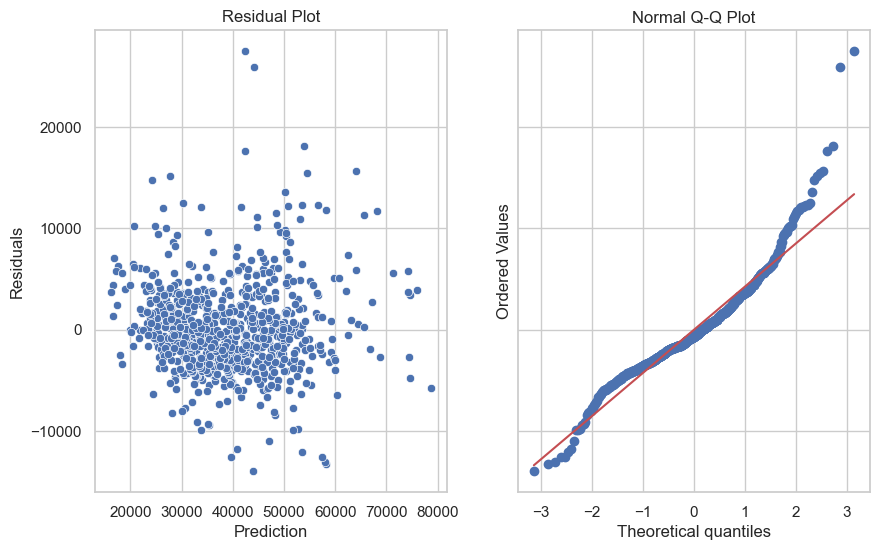

In [475]:
def residual_analysis_plots(model):
    
    import scipy.stats as stats
    import matplotlib.pyplot as plt
    
    predictions = model.predict()
    residuals = model.resid
    
    fig, ax = plt.subplots(1, 2, sharey="all", figsize=(10, 6))
    
    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title("Residual Plot")
    ax[0].set_xlabel("Prediction")
    ax[0].set_ylabel("Residuals")
    
    stats.probplot(residuals, dist="norm", plot=ax[1])
    ax[1].set_title("Normal Q-Q Plot")  
    

residual_analysis_plots(model)

## Best Model With Log Transfer Price

In [478]:
X = df_new.drop(['price'],axis=1)
y = df_new['price']

y = np.log(y)

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     299.8
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:31:22   Log-Likelihood:                 685.24
No. Observations:                 831   AIC:                            -1334.
Df Residuals:                     813   BIC:                            -1249.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0010      0.000      4.113      0.000       0.001       0.001
drivetrain                 -0.0311      0.011     -2.961      0.003      -0.052      -0.010
model                       0.4117      0.042      9.802      0.000       0.329       0.494
year                        1.1364      0.258      4.401      0.000       0.629       1.643
fuel_consume(L/100km)       2.0430      0.614      3.325      0.001       0.837       3.249
province                   -0.0337      0.002    -14.042      0.000      -0.038      -0.029
battery_charge_time(hr)    -0.3665      0.099     -3.707      0.000      -0.561      -0.172
battery_range(km)           0.0047      0.001      3.979      0.000       0.002       0.007
body_type                   1.3455      0.250      5.391      0.000       0.856       1.835
mileage(km)             -2.523e-06   2.65e-07     -9.503      0.000   -3.04e-06      -2e-06
front_legroom(mm)          -2.2151      0.494     -4.485      0.000      -3.185      -1.246
cargo_volume(L)            -0.0001   8.42e-05     -1.289      0.198      -0.000    5.67e-05
front_legroom_sq            0.0010      0.000      4.389      0.000       0.001       0.001
battery_range_sq        -3.897e-06    1.3e-06     -2.998      0.003   -6.45e-06   -1.35e-06
battery_charge_time_sq      0.0163      0.005      3.610      0.000       0.007       0.025
mileage_sq               4.476e-13   1.11e-12      0.403      0.687   -1.73e-12    2.63e-12
year_sq                    -0.0003   6.38e-05     -4.191      0.000      -0.000      -0.000
cargo_volume_sq          3.708e-08    3.2e-08      1.159      0.247   -2.57e-08    9.99e-08
fuel_consume_sq            -0.4300      0.135     -3.173      0.002      -0.696      -0.164
==============================================================================
Omnibus:                       99.355   Durbin-Watson:                   1.137
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              280.872
Skew:                           0.606   Prob(JB):                     1.02e-61
Kurtosis:                       5.577   Cond. No.                     1.47e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.47e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

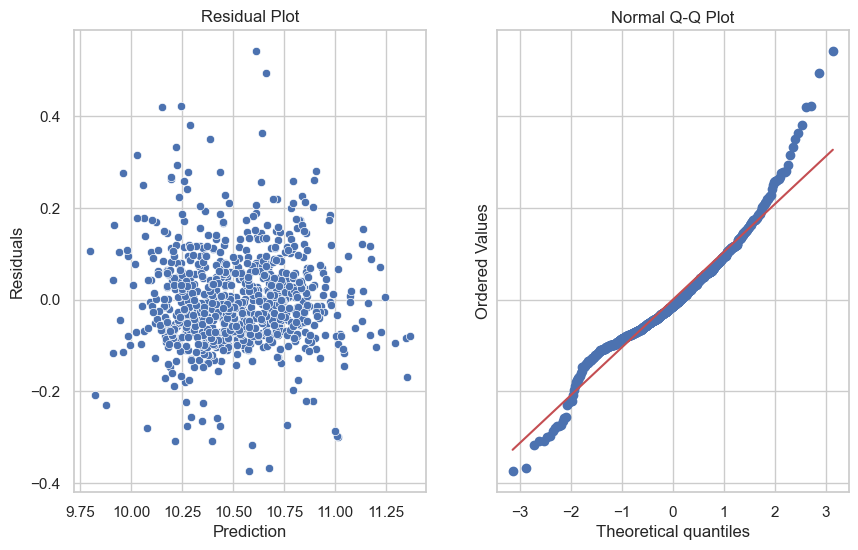

In [480]:
residual_analysis_plots(model)

### Check if there is multicolinearity  by using VIF

The most common way to fix multicollinearity is to drop features with VIF > 5. Another is to engineer combined features.

In [485]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

pd.Series(
    [vif(X.values, i) for i in range(X.shape[1])],
    index=X.columns
)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


const                      0.000000e+00
drivetrain                 2.449316e+00
model                      2.156461e+02
year                       5.616091e+06
fuel_consume(L/100km)      9.943414e+02
province                   1.099587e+00
battery_charge_time(hr)    4.781099e+02
battery_range(km)          3.782604e+02
body_type                  9.632473e+02
mileage(km)                9.751815e+00
front_legroom(mm)          2.701258e+06
cargo_volume(L)            1.011546e+02
front_legroom_sq           2.768919e+06
battery_range_sq           3.935585e+02
battery_charge_time_sq     4.978721e+02
mileage_sq                 9.461162e+00
year_sq                    5.613648e+06
cargo_volume_sq            7.834195e+01
fuel_consume_sq            9.593919e+02
dtype: float64

**Remarks:**

We can see strong correlations between cargo_volume(L) and cargo_volume_sq, fuel_coume(L/100km) and fuel_consume_sq, as well as mileage(km) and mileage_sq.

This is normal and expected, since these are intentionally engineered features that are related to one another. 

As for VIF of other featres, it shows that no significant multi-conlinearity issues here.

VIF close to 5:
- body type                        (9.632473e+02)

### Remove Body_type (High VIF), and fuel consume, fuel consume_sq

In [489]:
X = df_new.drop(['price','body_type','fuel_consume(L/100km)','fuel_consume_sq'],axis=1)
y = df_new['price']

y = np.log(y)

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     337.3
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:31:23   Log-Likelihood:                 656.73
No. Observations:                 831   AIC:                            -1283.
Df Residuals:                     816   BIC:                            -1213.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0024      0.000     12.667      0.000       0.002       0.003
drivetrain                 -0.0500      0.010     -5.170      0.000      -0.069      -0.031
model                       0.3499      0.032     11.069      0.000       0.288       0.412
year                        2.4180      0.191     12.676      0.000       2.044       2.792
province                   -0.0336      0.002    -13.580      0.000      -0.038      -0.029
battery_charge_time(hr)    -0.7090      0.090     -7.837      0.000      -0.887      -0.531
battery_range(km)           0.0062      0.001      5.858      0.000       0.004       0.008
mileage(km)             -2.485e-06    2.7e-07     -9.195      0.000   -3.02e-06   -1.95e-06
front_legroom(mm)          -4.6511      0.367    -12.688      0.000      -5.371      -3.932
cargo_volume(L)          1.898e-05   7.95e-05      0.239      0.811      -0.000       0.000
front_legroom_sq            0.0022      0.000     12.658      0.000       0.002       0.003
battery_range_sq        -5.393e-06   1.15e-06     -4.696      0.000   -7.65e-06   -3.14e-06
battery_charge_time_sq      0.0331      0.004      8.196      0.000       0.025       0.041
mileage_sq               3.569e-13   1.13e-12      0.317      0.752   -1.85e-12    2.57e-12
year_sq                    -0.0006   4.67e-05    -12.570      0.000      -0.001      -0.000
cargo_volume_sq         -1.274e-08   3.03e-08     -0.420      0.674   -7.23e-08    4.68e-08
==============================================================================
Omnibus:                       93.053   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.301
Skew:                           0.616   Prob(JB):                     1.19e-49
Kurtosis:                       5.234   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

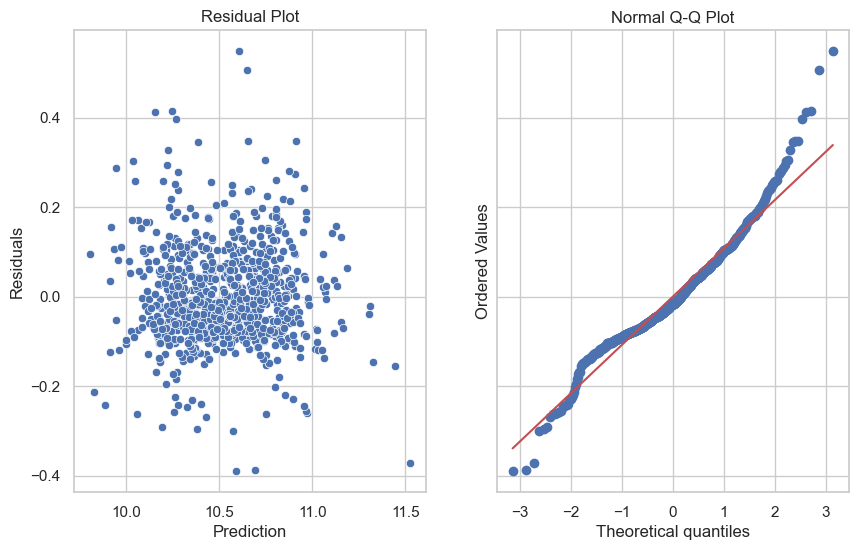

In [491]:
residual_analysis_plots(model)

In [492]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

pd.Series(
    [vif(X.values, i) for i in range(X.shape[1])],
    index=X.columns
)

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


const                      0.000000e+00
drivetrain                 1.943180e+00
model                      1.144165e+02
year                       4.204841e+06
province                   1.097500e+00
battery_charge_time(hr)    3.751412e+02
battery_range(km)          2.753183e+02
mileage(km)                9.471760e+00
front_legroom(mm)          1.394647e+06
cargo_volume(L)            8.462220e+01
front_legroom_sq           1.414433e+06
battery_range_sq           2.880219e+02
battery_charge_time_sq     3.728883e+02
mileage_sq                 9.439503e+00
year_sq                    4.204947e+06
cargo_volume_sq            6.593716e+01
dtype: float64

### Check if there is outlinears and its influences (if any)

Cook's Distance is a metric used to measure whether a point is influential or not. It measures the impact a point has on a regression line. It works by fitting a regression without the point and calculating the distance.

Generally, a Cook's Distance > 0.5 is worth investigating, while a distance > 1 indicates a significant problem.

In [499]:
influence = model.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df.head()

,dfb_const,dfb_drivetrain,dfb_model,dfb_year,dfb_province,dfb_battery_charge_time(hr),dfb_battery_range(km),dfb_mileage(km),dfb_front_legroom(mm),dfb_cargo_volume(L),...,dfb_battery_charge_time_sq,dfb_mileage_sq,dfb_year_sq,dfb_cargo_volume_sq,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.001899,-0.001808,0.006143,0.001638,0.000668,0.002666,-0.006249,-0.002191,-0.001539,-0.014794,...,-0.002777,0.003035,-0.001750,0.013295,0.000044,-0.307967,0.007296,-0.026403,-0.307797,-0.026388
1,0.001066,0.008980,0.014365,0.001031,0.021774,0.008778,-0.018819,-0.015379,-0.001200,-0.015555,...,-0.009356,0.007131,-0.000988,0.016260,0.000508,-0.546452,0.026512,-0.090179,-0.546217,-0.090140
2,-0.006627,-0.072962,-0.008784,-0.005881,0.015467,-0.001636,0.004528,0.022233,0.005388,0.020255,...,0.002819,-0.012682,0.006383,-0.018940,0.000590,-0.752681,0.016376,-0.097119,-0.752481,-0.097093
3,0.014136,-0.013667,0.010159,0.012333,-0.022327,-0.006245,0.022236,0.034112,-0.012906,0.006969,...,0.007108,-0.019143,-0.011772,-0.006290,0.000282,-0.649556,0.010567,-0.067127,-0.649326,-0.067103
4,0.003780,0.036997,0.025469,0.003797,0.105582,0.004059,0.014065,-0.012271,-0.003636,-0.069101,...,-0.000803,0.006579,-0.004049,0.067075,0.001763,-1.394176,0.014301,-0.167929,-1.394984,-0.168027


In [500]:
# filter df to only show cooks_d values
# Sort by ascending order to see highest values

inf_summary_df["cooks_d"].sort_values(ascending=False).round(2)

766    0.40
643    0.33
139    0.19
805    0.08
57     0.06
       ... 
524    0.00
274    0.00
541    0.00
446    0.00
343    0.00
Name: cooks_d, Length: 831, dtype: float64

**Insight:**
- None of the values are above 0.5 threshold, meaning that we don't have a data points that influences the model fit significantly.

## Best Model  - With Log Transfer Price

In [504]:
df_new_2 = df_new.drop(['body_type','fuel_consume(L/100km)','fuel_consume_sq'],axis=1)

In [505]:
df_new_2.columns

Index(['price', 'drivetrain', 'model', 'year', 'province',
       'battery_charge_time(hr)', 'battery_range(km)', 'mileage(km)',
       'front_legroom(mm)', 'cargo_volume(L)', 'front_legroom_sq',
       'battery_range_sq', 'battery_charge_time_sq', 'mileage_sq', 'year_sq',
       'cargo_volume_sq'],
      dtype='object')

In [506]:
X = df_new_2.drop(['price'],axis=1)
y = df_new_2['price']

y = np.log(y)

X = sm.add_constant(X)

model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     337.3
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:31:24   Log-Likelihood:                 656.73
No. Observations:                 831   AIC:                            -1283.
Df Residuals:                     816   BIC:                            -1213.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0024      0.000     12.667      0.000       0.002       0.003
drivetrain                 -0.0500      0.010     -5.170      0.000      -0.069      -0.031
model                       0.3499      0.032     11.069      0.000       0.288       0.412
year                        2.4180      0.191     12.676      0.000       2.044       2.792
province                   -0.0336      0.002    -13.580      0.000      -0.038      -0.029
battery_charge_time(hr)    -0.7090      0.090     -7.837      0.000      -0.887      -0.531
battery_range(km)           0.0062      0.001      5.858      0.000       0.004       0.008
mileage(km)             -2.485e-06    2.7e-07     -9.195      0.000   -3.02e-06   -1.95e-06
front_legroom(mm)          -4.6511      0.367    -12.688      0.000      -5.371      -3.932
cargo_volume(L)          1.898e-05   7.95e-05      0.239      0.811      -0.000       0.000
front_legroom_sq            0.0022      0.000     12.658      0.000       0.002       0.003
battery_range_sq        -5.393e-06   1.15e-06     -4.696      0.000   -7.65e-06   -3.14e-06
battery_charge_time_sq      0.0331      0.004      8.196      0.000       0.025       0.041
mileage_sq               3.569e-13   1.13e-12      0.317      0.752   -1.85e-12    2.57e-12
year_sq                    -0.0006   4.67e-05    -12.570      0.000      -0.001      -0.000
cargo_volume_sq         -1.274e-08   3.03e-08     -0.420      0.674   -7.23e-08    4.68e-08
==============================================================================
Omnibus:                       93.053   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.301
Skew:                           0.616   Prob(JB):                     1.19e-49
Kurtosis:                       5.234   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

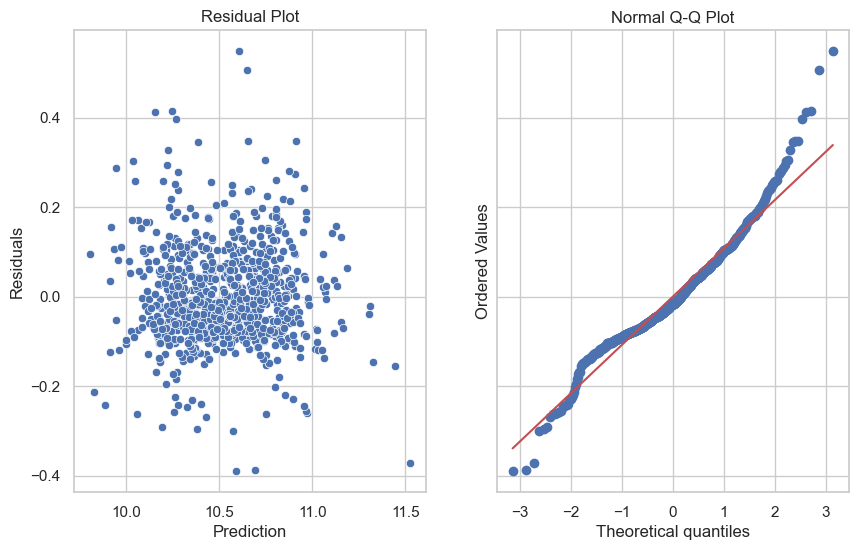

In [507]:
residual_analysis_plots(model)

In [513]:
influence = model.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df.head()

,dfb_const,dfb_drivetrain,dfb_model,dfb_year,dfb_province,dfb_battery_charge_time(hr),dfb_battery_range(km),dfb_mileage(km),dfb_front_legroom(mm),dfb_cargo_volume(L),...,dfb_battery_charge_time_sq,dfb_mileage_sq,dfb_year_sq,dfb_cargo_volume_sq,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.001899,-0.001808,0.006143,0.001638,0.000668,0.002666,-0.006249,-0.002191,-0.001539,-0.014794,...,-0.002777,0.003035,-0.001750,0.013295,0.000044,-0.307967,0.007296,-0.026403,-0.307797,-0.026388
1,0.001066,0.008980,0.014365,0.001031,0.021774,0.008778,-0.018819,-0.015379,-0.001200,-0.015555,...,-0.009356,0.007131,-0.000988,0.016260,0.000508,-0.546452,0.026512,-0.090179,-0.546217,-0.090140
2,-0.006627,-0.072962,-0.008784,-0.005881,0.015467,-0.001636,0.004528,0.022233,0.005388,0.020255,...,0.002819,-0.012682,0.006383,-0.018940,0.000590,-0.752681,0.016376,-0.097119,-0.752481,-0.097093
3,0.014136,-0.013667,0.010159,0.012333,-0.022327,-0.006245,0.022236,0.034112,-0.012906,0.006969,...,0.007108,-0.019143,-0.011772,-0.006290,0.000282,-0.649556,0.010567,-0.067127,-0.649326,-0.067103
4,0.003780,0.036997,0.025469,0.003797,0.105582,0.004059,0.014065,-0.012271,-0.003636,-0.069101,...,-0.000803,0.006579,-0.004049,0.067075,0.001763,-1.394176,0.014301,-0.167929,-1.394984,-0.168027


In [515]:
# filter df to only show cooks_d values
# Sort by ascending order to see highest values

inf_summary_df["cooks_d"].sort_values(ascending=False).round(2)

766    0.40
643    0.33
139    0.19
805    0.08
57     0.06
       ... 
524    0.00
274    0.00
541    0.00
446    0.00
343    0.00
Name: cooks_d, Length: 831, dtype: float64

### Checking which features can be removed without impacting the R-squared score

In [517]:
X = df_new_2.drop(['price'],axis=1)
y = df_new_2['price']

y = np.log(y)

X = sm.add_constant(X)

final_model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     337.3
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:31:25   Log-Likelihood:                 656.73
No. Observations:                 831   AIC:                            -1283.
Df Residuals:                     816   BIC:                            -1213.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0024      0.000     12.667      0.000       0.002       0.003
drivetrain                 -0.0500      0.010     -5.170      0.000      -0.069      -0.031
model                       0.3499      0.032     11.069      0.000       0.288       0.412
year                        2.4180      0.191     12.676      0.000       2.044       2.792
province                   -0.0336      0.002    -13.580      0.000      -0.038      -0.029
battery_charge_time(hr)    -0.7090      0.090     -7.837      0.000      -0.887      -0.531
battery_range(km)           0.0062      0.001      5.858      0.000       0.004       0.008
mileage(km)             -2.485e-06    2.7e-07     -9.195      0.000   -3.02e-06   -1.95e-06
front_legroom(mm)          -4.6511      0.367    -12.688      0.000      -5.371      -3.932
cargo_volume(L)          1.898e-05   7.95e-05      0.239      0.811      -0.000       0.000
front_legroom_sq            0.0022      0.000     12.658      0.000       0.002       0.003
battery_range_sq        -5.393e-06   1.15e-06     -4.696      0.000   -7.65e-06   -3.14e-06
battery_charge_time_sq      0.0331      0.004      8.196      0.000       0.025       0.041
mileage_sq               3.569e-13   1.13e-12      0.317      0.752   -1.85e-12    2.57e-12
year_sq                    -0.0006   4.67e-05    -12.570      0.000      -0.001      -0.000
cargo_volume_sq         -1.274e-08   3.03e-08     -0.420      0.674   -7.23e-08    4.68e-08
==============================================================================
Omnibus:                       93.053   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.301
Skew:                           0.616   Prob(JB):                     1.19e-49
Kurtosis:                       5.234   Cond. No.                     1.26e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [518]:
# Initialize a list to contain the features that can be removed
removable_features = []

# Iteratively remove features and check the summary
for feature in X.columns[1:]:             # Skip the constant term
    X_temp = X.drop(columns=[feature])    # Features
    model_temp = sm.OLS(y, X_temp).fit()
    print(f"\nRemoved {feature}:")
    print(model_temp.summary())
    
    # Check if the R-squared score has dropped significantly
    if final_model.rsquared - model_temp.rsquared <= 0.01:
        removable_features.append(feature)



Removed drivetrain:
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     350.2
Date:                Fri, 29 Nov 2024   Prob (F-statistic):          2.96e-323
Time:                        00:31:25   Log-Likelihood:                 643.34
No. Observations:                 831   AIC:                            -1259.
Df Residuals:                     817   BIC:                            -1193.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const

In [519]:
removable_features

['drivetrain',
 'year',
 'battery_range(km)',
 'cargo_volume(L)',
 'battery_range_sq',
 'mileage_sq',
 'year_sq',
 'cargo_volume_sq']

## Final Model

In [523]:
X = df_new_2.drop(['price','mileage_sq','cargo_volume(L)','cargo_volume_sq'],axis=1)
y = df_new_2['price']

y = np.log(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled = sm.add_constant(X_scaled)

final_real_model_2=sm.OLS(y, X_scaled).fit()
print(final_real_model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     397.3
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:31:25   Log-Likelihood:                 659.23
No. Observations:                 831   AIC:                            -1292.
Df Residuals:                     818   BIC:                            -1231.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

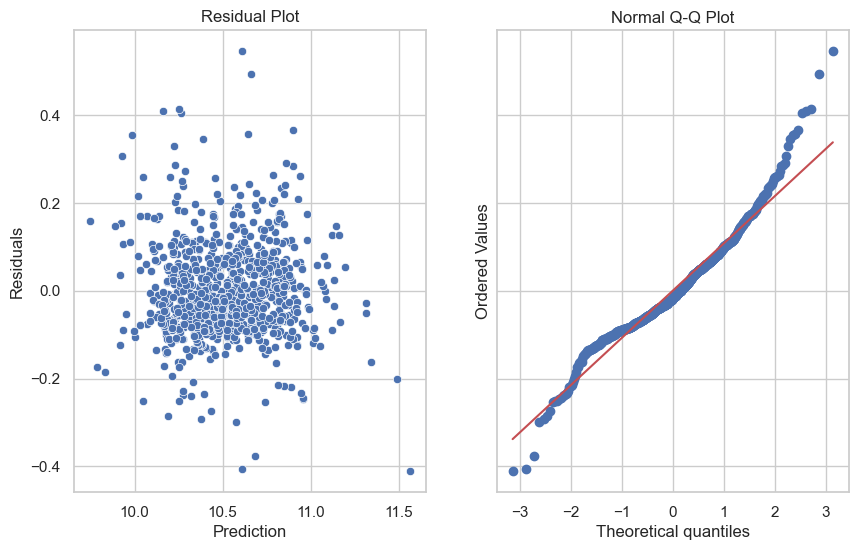

In [525]:
residual_analysis_plots(final_real_model_2)

In [528]:
y_true = df_new_2['price'].values
y_pred = final_real_model_2.predict(X_scaled)
y_pred # (log-scale)

0      10.496606
1      10.874939
2      10.454915
3      10.274234
4      10.740864
         ...    
826    10.847667
827    10.737294
828    10.109287
829     9.890976
830    10.794648
Length: 831, dtype: float64

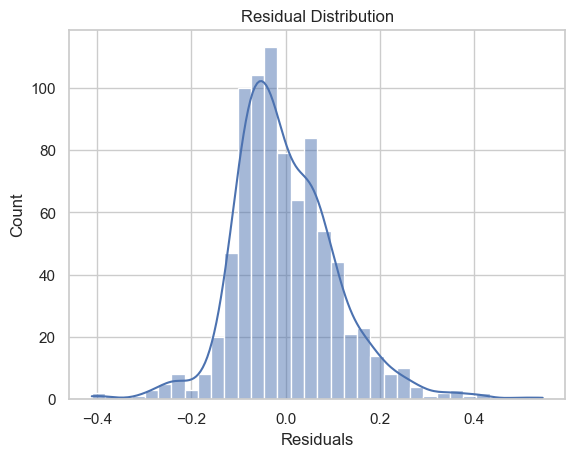

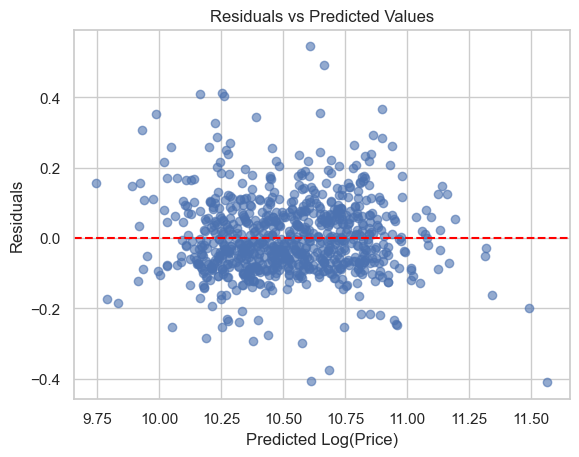

In [530]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals (log-scale)
residuals = y - y_pred

# Residual Distribution Plot
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.show()

# Residuals vs Predictions Scatter Plot
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Log(Price)')
plt.ylabel('Residuals')
plt.show()

In [533]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred_original = np.exp(y_pred)  # Transform predictions back to original scale

mse = mean_squared_error(y_true, y_pred_original)
mae = mean_absolute_error(y_true, y_pred_original)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 21959665.668167867
Mean Absolute Error: 3248.275317806563


In [534]:
df_new_2['price'].mean()

38658.00842358604

## Best model - shuffle rows to reduce problem of autocorrelation

**Checking of Independence of Errors:**

Assumes that the residuals are not correlated. In other words, it checks that we haven't fit a linear model to a time series data.

We can diagnose independence with the Durbin-Watson Test.

As a rule of thumb, Durbin-Watson values between 1.5 and 2.5 are considered ok.

**Based on previous model summary, Durbin-Watson is 1.288, so it is out of the range.** 

**Hence, rows will be shuffled to reduce the residuals autorrelation problem, hoping to improve Durbin-Watson score.**

In [541]:
# Shuffle the data
df_shuffled = df_new_2.sample(frac=1).reset_index(drop=True)

# Re-define X and y after shuffling
X = df_shuffled.drop(['price','mileage_sq','cargo_volume(L)','cargo_volume_sq'],axis=1)
y = df_shuffled['price']

y = np.log(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled = sm.add_constant(X_scaled)


final_real_model_3 = sm.OLS(y, X_scaled).fit()

print(final_real_model_3.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     397.3
Date:                Fri, 29 Nov 2024   Prob (F-statistic):               0.00
Time:                        00:31:26   Log-Likelihood:                 659.23
No. Observations:                 831   AIC:                            -1292.
Df Residuals:                     818   BIC:                            -1231.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

**Insights:**
- **After Shuffling the data, Durbin-Watson score has increased from 1.28 to 1.91, to close to 2.**
- **Now, Durbin-Watson score is within the acceptable range of 1.5 to 2.5**.
  
- There is no significant autocorrelation present in residuals.
- The errors are not highly correlated over time (not a time-series).

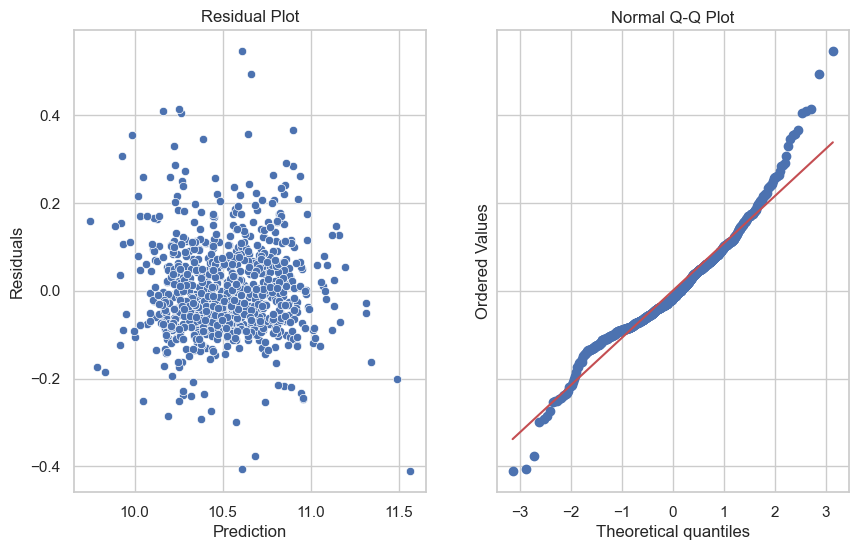

In [544]:
residual_analysis_plots(final_real_model_3)

In [545]:
y_true = df_shuffled['price'].values
y_pred = final_real_model_3.predict(X_scaled)
y_pred # (log-scale)

0      10.275141
1      10.403495
2      10.049807
3      10.690802
4      10.459500
         ...    
826    10.783262
827    10.583789
828     9.789030
829    10.850157
830     9.914892
Length: 831, dtype: float64

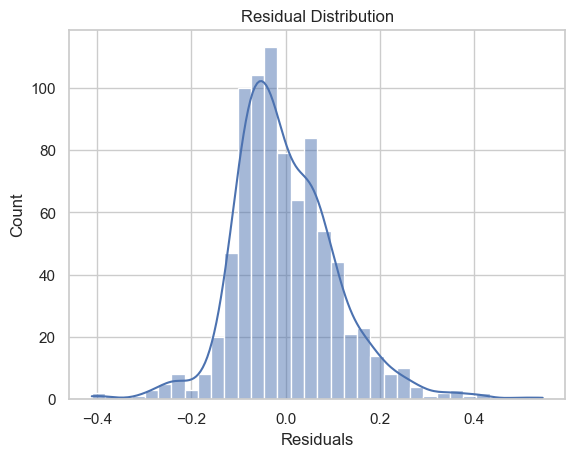

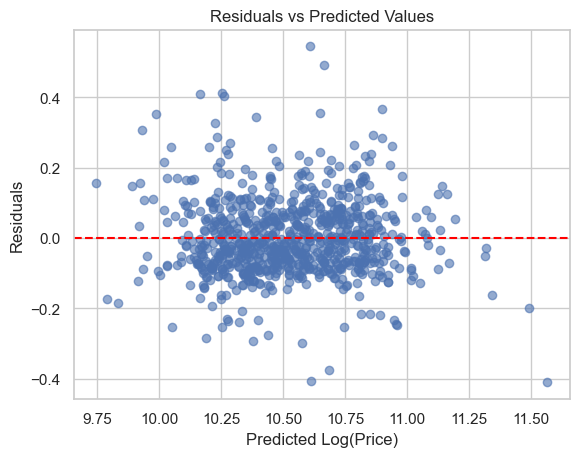

In [547]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residuals (log-scale)
residuals = y - y_pred

# Residual Distribution Plot
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution')
plt.xlabel('Residuals')
plt.show()

# Residuals vs Predictions Scatter Plot
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Log(Price)')
plt.ylabel('Residuals')
plt.show()

### Final Features 

In [550]:
df_shuffled.drop(['mileage_sq','cargo_volume(L)','cargo_volume_sq'],axis=1).columns

Index(['price', 'drivetrain', 'model', 'year', 'province',
       'battery_charge_time(hr)', 'battery_range(km)', 'mileage(km)',
       'front_legroom(mm)', 'front_legroom_sq', 'battery_range_sq',
       'battery_charge_time_sq', 'year_sq'],
      dtype='object')

In [553]:
df_shuffled

,price,drivetrain,model,year,province,battery_charge_time(hr),battery_range(km),mileage(km),front_legroom(mm),cargo_volume(L),front_legroom_sq,battery_range_sq,battery_charge_time_sq,mileage_sq,year_sq,cargo_volume_sq
0,22888,0,1,2015.0,4,12.0,407.0,153501,1085.0,894.0,1177225.0,165649.0,144.00,23562557001,4060225.0,799236.0
1,33888,0,0,2020.0,4,10.0,518.0,97252,1085.0,424.0,1177225.0,268324.0,100.00,9457951504,4080400.0,179776.0
2,17995,0,1,2015.0,5,12.0,386.0,216088,1085.0,894.0,1177225.0,148996.0,144.00,46694023744,4060225.0,799236.0
3,54888,1,3,2021.0,1,10.0,393.0,34499,1062.0,1925.0,1127844.0,154449.0,100.00,1190181001,4084441.0,3705625.0
4,31995,1,0,2023.0,4,10.4,438.0,67000,1085.0,648.0,1177225.0,191844.0,108.16,4489000000,4092529.0,419904.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
826,58900,0,1,2017.0,1,12.0,507.0,89600,1085.0,894.0,1177225.0,257049.0,144.00,8028160000,4068289.0,799236.0
827,45489,0,0,2022.0,5,10.0,507.0,41229,1085.0,648.0,1177225.0,257049.0,100.00,1699830441,4088484.0,419904.0
828,14999,1,1,2014.0,4,12.0,407.0,304048,1085.0,894.0,1177225.0,165649.0,144.00,92445186304,4056196.0,799236.0
829,54980,0,1,2017.0,1,12.0,539.0,67900,1085.0,804.0,1177225.0,290521.0,144.00,4610410000,4068289.0,646416.0


<h2 style="text-align:center; background-color:#d3ffe4; color:black; padding:5px;"><b>  Part IV - Building Models </b></h2><a id="part-v---best-model"></a>

In [557]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, LabelEncoder
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.preprocessing import OrdinalEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import RidgeCV, ElasticNet, ElasticNetCV, LassoCV
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae, mean_squared_error as mse, r2_score as r2

## 1. RidgeCV Model

In [560]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    831 non-null    object 
 1   price                    831 non-null    int64  
 2   drivetrain               831 non-null    object 
 3   exterior_color           831 non-null    object 
 4   model                    831 non-null    object 
 5   year                     831 non-null    float64
 6   trim                     831 non-null    object 
 7   fuel_consume(L/100km)    831 non-null    float64
 8   region                   831 non-null    object 
 9   province                 831 non-null    object 
 10  battery_charge_time(hr)  831 non-null    float64
 11  battery_range(km)        831 non-null    float64
 12  body_type                831 non-null    object 
 13  mileage(km)              831 non-null    int64  
 14  front_legroom(mm)        8

In [562]:
df_shuffled.drop(['mileage_sq','cargo_volume(L)','cargo_volume_sq'],axis=1).columns

Index(['price', 'drivetrain', 'model', 'year', 'province',
       'battery_charge_time(hr)', 'battery_range(km)', 'mileage(km)',
       'front_legroom(mm)', 'front_legroom_sq', 'battery_range_sq',
       'battery_charge_time_sq', 'year_sq'],
      dtype='object')

In [564]:
df_good = df[['price','drivetrain', 'model', 'year', 'province','front_legroom(mm)',
              'battery_charge_time(hr)', 'battery_range(km)', 'mileage(km)']]

In [566]:
df_good.head(2)

,price,drivetrain,model,year,province,front_legroom(mm),battery_charge_time(hr),battery_range(km),mileage(km)
0,34999,Rear-Wheel Drive,Model 3,2022.0,NS,1085.0,10.0,430.0,51060
1,49980,All-Wheel Drive,Model X,2017.0,BC,1046.0,12.0,475.0,136200


In [568]:
df_good.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 831 entries, 0 to 830
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    831 non-null    int64  
 1   drivetrain               831 non-null    object 
 2   model                    831 non-null    object 
 3   year                     831 non-null    float64
 4   province                 831 non-null    object 
 5   front_legroom(mm)        831 non-null    float64
 6   battery_charge_time(hr)  831 non-null    float64
 7   battery_range(km)        831 non-null    float64
 8   mileage(km)              831 non-null    int64  
dtypes: float64(4), int64(2), object(3)
memory usage: 58.6+ KB


### Save the df for Fitting Models

In [571]:
df_good.to_csv('df_good_for_models.csv',index=False)

### Fit Model

In [574]:
X = df_good.drop('price',axis=1)
y = df_good['price']
y = np.log(y)

X_train,X_test,y_train,y_test=train_test_split(X ,y ,test_size=0.2,random_state=42)

In [576]:
X.shape

(831, 8)

In [578]:
df_shuffled.drop(['mileage_sq','cargo_volume(L)','cargo_volume_sq'],axis=1).columns

Index(['price', 'drivetrain', 'model', 'year', 'province',
       'battery_charge_time(hr)', 'battery_range(km)', 'mileage(km)',
       'front_legroom(mm)', 'front_legroom_sq', 'battery_range_sq',
       'battery_charge_time_sq', 'year_sq'],
      dtype='object')

In [580]:
df_good.drop('price',axis=1).columns

Index(['drivetrain', 'model', 'year', 'province', 'front_legroom(mm)',
       'battery_charge_time(hr)', 'battery_range(km)', 'mileage(km)'],
      dtype='object')

In [582]:
# label converter 
le = LabelEncoder()
columns_to_encode = ['province','drivetrain','model']

# Encode each column separately
for col in columns_to_encode:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# After scaling, convert the scaled arrays back to DataFrames 
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# extract the polynomial features
polynomial = PolynomialFeatures(degree=2, include_bias=False)
poly_columns =['year','front_legroom(mm)','battery_charge_time(hr)','battery_range(km)']

X_train_model = polynomial.fit_transform(X_train_scaled_df[poly_columns])
X_test_model = polynomial.transform(X_test_scaled_df[poly_columns])

# fit the model
ridgecv_model = RidgeCV(alphas=(0.1, 1.0, 10.0),scoring='neg_mean_absolute_error')
ridgecv_model.fit(X_train_model,y_train)

print(f"Best alpha:{ridgecv_model.alpha_}")

# generate the model predictions and transform back
y_pred_train_model = ridgecv_model.predict(X_train_model)
y_pred_train_original = np.exp(y_pred_train_model)

y_pred_test_model = ridgecv_model.predict(X_test_model)
y_pred_test_original = np.exp(y_pred_test_model)

# transform back the true y values
y_train_true = np.exp(y_train)
y_test_true = np.exp(y_test)

# evaluate model performance
MAE_train= mae(y_train_true,y_pred_train_original)
MSE_train= mse(y_train_true,y_pred_train_original).round(1)
RMSE_train= np.sqrt(mse(y_train_true,y_pred_train_original)).round(1)
r2_train= r2(y_train_true,y_pred_train_original).round(2)

MAE_test= mae(y_test_true,y_pred_test_original).round(1)
MSE_test= mse(y_test_true,y_pred_test_original).round(1)
RMSE_test= np.sqrt(mse(y_test_true,y_pred_test_original)).round(1)
r2_test= r2(y_test_true,y_pred_test_original).round(2)

df_metrics= pd.DataFrame({"RidgeCV_train":[MAE_train,MSE_train,RMSE_train,r2_train],
                             "RidgeCV_test":[MAE_test,MSE_test,RMSE_test,r2_test],
                            },index=["MAE","MSE","RMSE","R2_Score"])
df_metrics

Best alpha:10.0


,RidgeCV_train,RidgeCV_test
MAE,4.498571e+03,4495.00
MSE,4.009997e+07,37067038.10
RMSE,6.332500e+03,6088.30
R2_Score,6.800000e-01,0.74


## 2. LassoCV Model

In [585]:
X = df_good.drop('price',axis=1)
y = df_good['price']
y = np.log(y)

X_train,X_test,y_train,y_test=train_test_split(X ,y ,test_size=0.2,random_state=42)

In [587]:
X.shape

(831, 8)

In [589]:
# label converter 
le = LabelEncoder()
columns_to_encode = ['province','drivetrain','model']

# Encode each column separately
for col in columns_to_encode:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# After scaling, convert the scaled arrays back to DataFrames 
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# extract the polynomial features
polynomial = PolynomialFeatures(degree=2, include_bias=False)
poly_columns =['year','front_legroom(mm)','battery_charge_time(hr)','battery_range(km)']

X_train_model = polynomial.fit_transform(X_train_scaled_df[poly_columns])
X_test_model = polynomial.transform(X_test_scaled_df[poly_columns])

# fit the model
lassocv_model = LassoCV(eps=0.001, n_alphas=100,cv=5)
lassocv_model.fit(X_train_model,y_train)

print(f"Best alpha:{lassocv_model.alpha_}")
print(f"LassoCv Model coefficients:")
print(f"{lassocv_model.coef_}")

# generate the model predictions and transform back
y_pred_train_model = lassocv_model.predict(X_train_model)
y_pred_train_original = np.exp(y_pred_train_model)

y_pred_test_model = lassocv_model.predict(X_test_model)
y_pred_test_original = np.exp(y_pred_test_model)

# transform back the true y values
y_train_true = np.exp(y_train)
y_test_true = np.exp(y_test)

# evaluate model performance
MAE_train= mae(y_train_true,y_pred_train_original).round(1)
MSE_train= mse(y_train_true,y_pred_train_original).round(1)
RMSE_train= np.sqrt(mse(y_train_true,y_pred_train_original)).round(1)
r2_train= r2(y_train_true,y_pred_train_original).round(2)

MAE_test= mae(y_test_true,y_pred_test_original).round(1)
MSE_test= mse(y_test_true,y_pred_test_original).round(1)
RMSE_test= np.sqrt(mse(y_test_true,y_pred_test_original)).round(1)
r2_test= r2(y_test_true,y_pred_test_original).round(2)

df_metrics= pd.DataFrame({"LassoCv_train":[MAE_train,MSE_train,RMSE_train,r2_train],
                             "LassoCv_test":[MAE_test,MSE_test,RMSE_test,r2_test],
                            },index=["MAE","MSE","RMSE","R2_Score"])
df_metrics

Best alpha:0.0009251363557283448
LassoCv Model coefficients:
[ 0.12937305 -0.05649002  0.02110926  0.09544569 -0.         -0.01701914
 -0.03038788  0.01426611  0.07518874  0.00904573  0.0061673   0.00541191
  0.02307556 -0.01793585]


,LassoCv_train,LassoCv_test
MAE,4500.20,4513.00
MSE,40086982.00,37192460.40
RMSE,6331.40,6098.60
R2_Score,0.68,0.74


In [591]:
# Check non_zero_coeff Features
poly_feature_names = polynomial.get_feature_names_out(input_features=poly_columns)

X_train_model_df = pd.DataFrame(X_train_model, columns=poly_feature_names)
X_test_model_df = pd.DataFrame(X_test_model, columns=poly_feature_names)

coefficients = lassocv_model.coef_
coef_df = pd.DataFrame({'Feature': poly_feature_names, 'Coefficient': coefficients})

non_zero_coef = coef_df[coef_df['Coefficient'] != 0]
print(non_zero_coef)

                                      Feature  Coefficient
0                                        year     0.129373
1                           front_legroom(mm)    -0.056490
2                     battery_charge_time(hr)     0.021109
3                           battery_range(km)     0.095446
5                      year front_legroom(mm)    -0.017019
6                year battery_charge_time(hr)    -0.030388
7                      year battery_range(km)     0.014266
8                         front_legroom(mm)^2     0.075189
9   front_legroom(mm) battery_charge_time(hr)     0.009046
10        front_legroom(mm) battery_range(km)     0.006167
11                  battery_charge_time(hr)^2     0.005412
12  battery_charge_time(hr) battery_range(km)     0.023076
13                        battery_range(km)^2    -0.017936


## 3. ElasticNetCV Model

In [594]:
X = df_good.drop('price',axis=1)
y = df_good['price']
y = np.log(y)

X_train,X_test,y_train,y_test=train_test_split(X ,y ,test_size=0.2,random_state=42)

In [596]:
X.shape

(831, 8)

In [598]:
# label converter 
le = LabelEncoder()
columns_to_encode = ['province','drivetrain','model']

# Encode each column separately
for col in columns_to_encode:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])


# scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# After scaling, convert the scaled arrays back to DataFrames 
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)


# extract the polynomial features
polynomial = PolynomialFeatures(degree=2, include_bias=False)
poly_columns =['year','front_legroom(mm)','battery_charge_time(hr)','battery_range(km)']

X_train_model = polynomial.fit_transform(X_train_scaled_df[poly_columns])
X_test_model = polynomial.transform(X_test_scaled_df[poly_columns])

# fit the model
en_model = ElasticNet(max_iter=20000)
en_param_grid= {"alpha":[0.0001,0.001,0.01,0.1,1,10,100],
                "l1_ratio":[0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

en_grid_model = GridSearchCV(estimator=en_model,
                           param_grid=en_param_grid,
                           scoring="neg_mean_squared_error",
                           cv=5,
                           verbose=1)

en_grid_model.fit(X_train_model, y_train)

print(f"Best Estimator:{en_grid_model.best_estimator_}")


# generate the model predictions and transform back
y_pred_train_model = en_grid_model.predict(X_train_model)
y_pred_train_original = np.exp(y_pred_train_model)

y_pred_test_model = en_grid_model.predict(X_test_model)
y_pred_test_original = np.exp(y_pred_test_model)

# transform back the true y values
y_train_true = np.exp(y_train)
y_test_true = np.exp(y_test)

# evaluate model performance
MAE_train= mae(y_train_true,y_pred_train_original).round(1)
MSE_train= mse(y_train_true,y_pred_train_original).round(1)
RMSE_train= np.sqrt(mse(y_train_true,y_pred_train_original)).round(1)
r2_train= r2(y_train_true,y_pred_train_original).round(2)

MAE_test= mae(y_test_true,y_pred_test_original).round(1)
MSE_test= mse(y_test_true,y_pred_test_original).round(1)
RMSE_test= np.sqrt(mse(y_test_true,y_pred_test_original)).round(1)
r2_test= r2(y_test_true,y_pred_test_original).round(2)

df_metrics= pd.DataFrame({"ElasticNetCv_train":[MAE_train,MSE_train,RMSE_train,r2_train],
                          "ElasticNetCvtest":[MAE_test,MSE_test,RMSE_test,r2_test],
                            },index=["MAE","MSE","RMSE","R2_Score"])
df_metrics

Fitting 5 folds for each of 77 candidates, totalling 385 fits


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.978e+00, tolerance: 4.421e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.186e+00, tolerance: 4.449e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

Best Estimator:ElasticNet(alpha=0.01, l1_ratio=0.1, max_iter=20000)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.051e+01, tolerance: 4.164e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.186e+01, tolerance: 4.439e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

,ElasticNetCv_train,ElasticNetCvtest
MAE,4501.50,4511.40
MSE,40184002.90,37119897.30
RMSE,6339.10,6092.60
R2_Score,0.68,0.74


## 4.1. Random Forest Regression Model

In [600]:
X = df_good.drop('price',axis=1)
y = df_good['price']
y = np.log(y)

X_train,X_test,y_train,y_test=train_test_split(X ,y ,test_size=0.2,random_state=42)

In [601]:
# label converter 
le = LabelEncoder()
columns_to_encode = ['province','drivetrain','model']

# Encode each column separately
for col in columns_to_encode:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# After scaling, convert the scaled arrays back to DataFrames 
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [605]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train_scaled_df, y_train)

# Make predictions
y_pred_train_model = rf_model.predict(X_train_scaled_df)
y_pred_train_original = np.exp(y_pred_train_model)

y_pred_test_model = rf_model.predict(X_test_scaled_df)
y_pred_test_original = np.exp(y_pred_test_model)

# Transform back the true y values
y_train_true = np.exp(y_train)
y_test_true = np.exp(y_test)

# Evaluate model performance
MAE_train = mae(y_train_true, y_pred_train_original).round(1)
MSE_train = mse(y_train_true, y_pred_train_original).round(1)
RMSE_train = np.sqrt(MSE_train).round(1)
r2_train = r2(y_train_true, y_pred_train_original).round(2)

MAE_test = mae(y_test_true, y_pred_test_original).round(1)
MSE_test = mse(y_test_true, y_pred_test_original).round(1)
RMSE_test = np.sqrt(MSE_test).round(1)
r2_test = r2(y_test_true, y_pred_test_original).round(2)

# Metrics
df_metrics = pd.DataFrame({"RandomForest_train": [MAE_train, MSE_train, RMSE_train, r2_train],
                           "RandomForest_test": [MAE_test, MSE_test, RMSE_test, r2_test],
                          }, index=["MAE", "MSE", "RMSE", "R2_Score"])

print(df_metrics)


          RandomForest_train  RandomForest_test
MAE                  1243.10            3441.00
MSE               3784353.70        24020147.40
RMSE                 1945.30            4901.00
R2_Score                0.97               0.83


In [607]:
df_metrics

,RandomForest_train,RandomForest_test
MAE,1243.10,3441.00
MSE,3784353.70,24020147.40
RMSE,1945.30,4901.00
R2_Score,0.97,0.83


## 4.2. GridSerachCV with Random Forest Model

In [610]:
X = df_good.drop('price',axis=1)
y = df_good['price']
y = np.log(y)

X_train,X_test,y_train,y_test=train_test_split(X ,y ,test_size=0.2,random_state=42)

In [612]:
# label converter 
le = LabelEncoder()
columns_to_encode = ['province','drivetrain','model']

# Encode each column separately
for col in columns_to_encode:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# After scaling, convert the scaled arrays back to DataFrames 
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [614]:
# Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Define hyperparameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],   # Number of trees in the forest
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2']}  # Number of features to consider when splitting a node

rf_grid_search = GridSearchCV(estimator=rf_model, 
                              param_grid=param_grid, 
                              cv=5, 
                              scoring='neg_mean_squared_error',
                              n_jobs=-1, 
                              verbose=2)
# Fit Model
rf_grid_search.fit(X_train_scaled_df, y_train)

# Best parameters & model
best_rf_params = rf_grid_search.best_params_
print(f"Best Hyperparameters: {best_rf_params}")

best_rf_model = rf_grid_search.best_estimator_

# Prediction
y_pred_train_model = best_rf_model.predict(X_train_scaled_df)
y_pred_train_original = np.exp(y_pred_train_model)

y_pred_test_model = best_rf_model.predict(X_test_scaled_df)
y_pred_test_original = np.exp(y_pred_test_model)

# Transform back the true y values
y_train_true = np.exp(y_train)
y_test_true = np.exp(y_test)

# Evaluate performance
MAE_train = mae(y_train_true, y_pred_train_original).round(1)
MSE_train = mse(y_train_true, y_pred_train_original).round(1)
RMSE_train = np.sqrt(MSE_train).round(1)
r2_train = r2(y_train_true, y_pred_train_original).round(2)

MAE_test = mae(y_test_true, y_pred_test_original).round(1)
MSE_test = mse(y_test_true, y_pred_test_original).round(1)
RMSE_test = np.sqrt(MSE_test).round(1)
r2_test = r2(y_test_true, y_pred_test_original).round(2)

df_metrics = pd.DataFrame({"RandomForest_train": [MAE_train, MSE_train, RMSE_train, r2_train],
                           "RandomForest_test": [MAE_test, MSE_test, RMSE_test, r2_test]},
                          index=["MAE", "MSE", "RMSE", "R2_Score"])
print(df_metrics)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Hyperparameters: {'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
          RandomForest_train  RandomForest_test
MAE                  2058.60            3317.70
MSE               9782039.80        22977287.90
RMSE                 3127.60            4793.50
R2_Score                0.92               0.84


In [618]:
df_metrics

,RandomForest_train,RandomForest_test
MAE,2058.60,3317.70
MSE,9782039.80,22977287.90
RMSE,3127.60,4793.50
R2_Score,0.92,0.84


In [624]:
print(f"Best Hyperparameters: ")
print(f"{best_rf_params}")

Best Hyperparameters: 
{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


<h2 style="text-align:center; background-color:#d3ffe4; color:black; padding:5px;"><b> Part V - Best Model + New Prediction + Deployment </b></h2><a id="part-iv---building-models"></a>

## The Best Model

In [629]:
X = df_good.drop('price',axis=1)
y = df_good['price']
y = np.log(y)

X_train,X_test,y_train,y_test=train_test_split(X ,y ,test_size=0.2,random_state=42)

# label converter 
le = LabelEncoder()
columns_to_encode = ['province','drivetrain','model']

# Encode each column separately
for col in columns_to_encode:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

# scale the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# After scaling, convert the scaled arrays back to DataFrames 
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

best_params = {
    'max_depth': 20,            
    'max_features': 'log2',    
    'min_samples_leaf': 2,     
    'min_samples_split': 2,    
    'n_estimators': 50}

# Random Forest model
best_rf_model = RandomForestRegressor(**best_params,random_state=42)


# Fit Model
best_rf_model.fit(X_train_scaled_df, y_train)


# Prediction
y_pred_train_model = best_rf_model.predict(X_train_scaled_df)
y_pred_train_original = np.exp(y_pred_train_model)

y_pred_test_model = best_rf_model.predict(X_test_scaled_df)
y_pred_test_original = np.exp(y_pred_test_model)

# Transform back the true y values
y_train_true = np.exp(y_train)
y_test_true = np.exp(y_test)

# Evaluate performance
MAE_train = mae(y_train_true, y_pred_train_original).round(1)
MSE_train = mse(y_train_true, y_pred_train_original).round(1)
RMSE_train = np.sqrt(MSE_train).round(1)
r2_train = r2(y_train_true, y_pred_train_original).round(2)

MAE_test = mae(y_test_true, y_pred_test_original).round(1)
MSE_test = mse(y_test_true, y_pred_test_original).round(1)
RMSE_test = np.sqrt(MSE_test).round(1)
r2_test = r2(y_test_true, y_pred_test_original).round(2)

df_metrics = pd.DataFrame({"RandomForest_train": [MAE_train, MSE_train, RMSE_train, r2_train],
                           "RandomForest_test": [MAE_test, MSE_test, RMSE_test, r2_test]},
                          index=["MAE", "MSE", "RMSE", "R2_Score"])
print(df_metrics)

          RandomForest_train  RandomForest_test
MAE                  2058.60            3317.70
MSE               9782039.80        22977287.90
RMSE                 3127.60            4793.50
R2_Score                0.92               0.84


## Finalize The Trained Best Model And Functions for Export

In [632]:
X = df_good.drop('price',axis=1)
y = df_good['price']
y = np.log(y)

X_train,X_test,y_train,y_test=train_test_split(X ,y ,test_size=0.2,random_state=42)

# label converter 
columns_to_encode = ['province','drivetrain','model']

from sklearn.preprocessing import LabelEncoder
le_province = LabelEncoder()
X_train['province'] = le_province.fit_transform(X_train['province'])
X_test['province'] = le_province.transform(X_test['province'])

from sklearn.preprocessing import LabelEncoder
le_drivetrain = LabelEncoder()
X_train['drivetrain'] = le_drivetrain.fit_transform(X_train['drivetrain'])
X_test['drivetrain'] = le_drivetrain.transform(X_test['drivetrain'])

from sklearn.preprocessing import LabelEncoder
le_model = LabelEncoder()
X_train['model'] = le_model.fit_transform(X_train['model'])
X_test['model'] = le_model.transform(X_test['model'])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

best_params = {
    'max_depth': 20,            
    'max_features': 'log2',    
    'min_samples_leaf': 2,     
    'min_samples_split': 2,    
    'n_estimators': 50}

# Random Forest model
best_rf_model = RandomForestRegressor(**best_params,random_state=42)

# Fit Model
best_rf_model.fit(X_train_scaled_df, y_train)

# Prediction
y_pred_train_model = best_rf_model.predict(X_train_scaled_df)
y_pred_train_original = np.exp(y_pred_train_model)

y_pred_test_model = best_rf_model.predict(X_test_scaled_df)
y_pred_test_original = np.exp(y_pred_test_model)

# Transform back the true y values
y_train_true = np.exp(y_train)
y_test_true = np.exp(y_test)

# Evaluate performance
MAE_train = mae(y_train_true, y_pred_train_original).round(1)
MSE_train = mse(y_train_true, y_pred_train_original).round(1)
RMSE_train = np.sqrt(MSE_train).round(1)
r2_train = r2(y_train_true, y_pred_train_original).round(2)

MAE_test = mae(y_test_true, y_pred_test_original).round(1)
MSE_test = mse(y_test_true, y_pred_test_original).round(1)
RMSE_test = np.sqrt(MSE_test).round(1)
r2_test = r2(y_test_true, y_pred_test_original).round(2)

df_metrics = pd.DataFrame({"RandomForest_train": [MAE_train, MSE_train, RMSE_train, r2_train],
                           "RandomForest_test": [MAE_test, MSE_test, RMSE_test, r2_test]},
                          index=["MAE", "MSE", "RMSE", "R2_Score"])
print(df_metrics)

          RandomForest_train  RandomForest_test
MAE                  2058.60            3317.70
MSE               9782039.80        22977287.90
RMSE                 3127.60            4793.50
R2_Score                0.92               0.84


## The Label Mappings

In [1257]:
le_province_mapping = {index: label for index, label in enumerate(le_province.classes_)}
print(le_province_mapping)

{0: 'AB', 1: 'BC', 2: 'MB', 3: 'NS', 4: 'ON', 5: 'QC', 6: 'SK'}


In [1259]:
le_drivetrain_mapping = {index: label for index, label in enumerate(le_drivetrain.classes_)}
print(le_drivetrain_mapping)

{0: 'All-Wheel Drive', 1: 'Rear-Wheel Drive', 2: 'unknown'}


In [1261]:
le_model_mapping = {index: label for index, label in enumerate(le_model.classes_)}
print(le_model_mapping)

{0: 'Model 3', 1: 'Model S', 2: 'Model X', 3: 'Model Y'}


## The 8 Important Features For Predicting Price For this Model

In [1264]:
df_good.columns

Index(['price', 'drivetrain', 'model', 'year', 'province', 'front_legroom(mm)',
       'battery_charge_time(hr)', 'battery_range(km)', 'mileage(km)'],
      dtype='object')

In [1266]:
df_good.head(1)

,price,drivetrain,model,year,province,front_legroom(mm),battery_charge_time(hr),battery_range(km),mileage(km)
0,34999,Rear-Wheel Drive,Model 3,2022.0,NS,1085.0,10.0,430.0,51060


**The 8 Important Features For Predicting Price For this Model:**
- model
- year
- province
- mileage(km)
- drivetrain
- front_legroom(mm)
- battery_charge_time(hr)
- battery_range(km)

### Save the Cleaned and Finalized DataSet used by the Model

In [1270]:
df_good

,price,drivetrain,model,year,province,front_legroom(mm),battery_charge_time(hr),battery_range(km),mileage(km)
0,34999,Rear-Wheel Drive,Model 3,2022.0,NS,1085.0,10.0,430.0,51060
1,49980,All-Wheel Drive,Model X,2017.0,BC,1046.0,12.0,475.0,136200
2,31690,unknown,Model 3,2020.0,BC,1085.0,10.0,430.0,41722
3,26888,Rear-Wheel Drive,Model 3,2019.0,ON,1085.0,10.0,386.0,42000
4,39990,All-Wheel Drive,Model 3,2022.0,AB,1085.0,10.0,538.0,50870
...,...,...,...,...,...,...,...,...,...
826,59850,All-Wheel Drive,Model Y,2022.0,BC,1062.0,10.0,531.0,70939
827,52888,All-Wheel Drive,Model Y,2021.0,BC,1062.0,10.0,509.0,95801
828,28995,All-Wheel Drive,Model 3,2020.0,QC,1085.0,10.0,354.0,106714
829,22888,Rear-Wheel Drive,Model S,2013.0,BC,1085.0,10.0,335.0,186017


In [633]:
df_good.to_csv('tesla_data_good.csv')

## Make a New Prediction

**New data regarding pre-owned Tesla EV listed on the platform:** 
- https://www.cargurus.ca/Cars/inventorylisting/viewDetailsFilterViewInventoryListing.action?sourceContext=carGurusHomePageModel&entitySelectingHelper.selectedEntity=d2132&zip=V6H#listing=401544994/PRIORITY/DEFAULT

In [637]:
new_data = pd.DataFrame({'drivetrain':['All-Wheel Drive'],
                         'model': ['Model X'], 
                         'year':[2016], 
                         'province':['BC'], 
                         'front_legroom(mm)':[1046],
                         'battery_charge_time(hr)':[12],
                         'battery_range(km)':[402],
                         'mileage(km)':[85049]})

In [639]:
new_X = new_data

In [641]:
new_X['province'] = le_province.transform(new_X['province'])

In [643]:
new_X['drivetrain'] = le_drivetrain.transform(new_X['drivetrain'])

In [645]:
new_X['model'] = le_model.transform(new_X['model'])

In [647]:
new_X_scaled = scaler.transform(new_X)

In [649]:
new_X_scaled_df = pd.DataFrame(new_X_scaled, columns=new_X.columns)

In [651]:
new_y = best_rf_model.predict(new_X_scaled_df)

In [653]:
new_y = np.exp(new_y)

In [655]:
new_y

array([47780.32669016])

**The pre-owned 2016 Tesla Model X (Mileage 85,049km) in BC:**

- **Predicted Price Estimated by This Model: $47780**

- **The True Price Listed on the Website: $49,888**

## Export The Trained Best Model + Necessary Functions

### Create A Completed Model Function:

In [1272]:
#Create a function for a completed model:
def complete_rfmodel(drivetrain, model, year, province, front_legroom, battery_charge_time, battery_range, mileage):
    """ 
    This function saved a trained Random Forest Regression Model to predict the prices of pre-owned Tesla Electic Vehicles (EV) in Canada.
    
    Pass in the values of the 7 features of a pre-owned Tesla EV to get the predicted values of its price.
    
    For example:
    Input:
    complete_rfmodel(drivetrain = 'All-Wheel Drive', 
                     model = 'Model X',
                     year = 2016,
                     province ='BC',
                     front_legroom = 1046,
                     battery_charge_time = 12,
                     battery_range = 402,
                     mileage = 85049)
    Output:
    array([47780.32669016])   

    Hence, the predicted value of the price of this pre-owned Tesla EV is $47780.
    """
    
    entry_data = pd.DataFrame({'drivetrain':[drivetrain],
                         'model': [model], 
                         'year':[year], 
                         'province':[province], 
                         'front_legroom(mm)':[front_legroom],
                         'battery_charge_time(hr)':[battery_charge_time],
                         'battery_range(km)':[battery_range],
                         'mileage(km)':[mileage]})
    X = entry_data
    X['province'] = le_province.transform(X['province'])
    X['drivetrain'] = le_drivetrain.transform(X['drivetrain'])
    X['model'] = le_model.transform(X['model'])
    
    X_scaled = scaler.transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
    
    y = best_rf_model.predict(X_scaled_df)
    y = np.exp(y)
                          
    return y

In [1274]:
complete_rfmodel(drivetrain='All-Wheel Drive', 
                 model='Model X',
                 year=2016,
                 province='BC',
                 front_legroom=1046,
                 battery_charge_time=12,
                 battery_range=402,
                 mileage=85049)

array([47780.32669016])

## Save Model and Function in Pickle - For Model Deployment in Streamlit App

In [1276]:
import pickle

In [1278]:
model_data = {
    "le_province": le_province,
    "le_drivetrain": le_drivetrain,
    "le_model": le_model,
    "scaler": scaler,
    "model": best_rf_model,}

with open("tesla_model.pkl", "wb") as file:
    pickle.dump(model_data, file)

In [1280]:
with open("tesla_model.pkl", "rb") as file:
    data = pickle.load(file)

In [1282]:
le_province = data["le_province"]
le_drivetrain = data["le_drivetrain"]
le_model = data["le_model"]
scaler = data['scaler']
model = data['model']

In [1284]:
df_good.drop('price',axis=1).columns

Index(['drivetrain', 'model', 'year', 'province', 'front_legroom(mm)',
       'battery_charge_time(hr)', 'battery_range(km)', 'mileage(km)'],
      dtype='object')

In [ ]:
#new_data = pd.DataFrame({'drivetrain':['All-Wheel Drive'],
                         #'model': ['Model X'], 
                         #'year':[2016], 
                         #'province':['BC'], 
                         #'front_legroom(mm)':[1046],
                         #'battery_charge_time(hr)':[12],
                         #'battery_range(km)':[402],
                         #'mileage(km)':[85049]})

In [1341]:
X = np.array([['All-Wheel Drive','Model X',2016, 'BC', 1046, 12, 402, 85049]])

In [1343]:
X[:,0] = le_drivetrain.transform(X[:,0])
X[:,1] = le_model.transform(X[:,1])
X[:,3] = le_province.transform(X[:,3])
X = X.astype(float)
X

array([[0.0000e+00, 2.0000e+00, 2.0160e+03, 1.0000e+00, 1.0460e+03,
        1.2000e+01, 4.0200e+02, 8.5049e+04]])

In [1345]:
X = scaler.transform(X)
y = model.predict(X)
y = np.exp(y)
y = y.astype(int)
y = y.item()
y

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


47780

- This prediction is the same as previous prediction.
- Hence, The Model is well saved, loaded and used.

### Create Functions For Neccessary Step - For Other Usage

In [666]:
import pickle

In [668]:
# Create the functions and save them
def transform(y):
    return np.log(y)
    
def inverse_transform(y):
    return np.exp(y)

# Save the log transformer alongside the other components
model_data = {
    "le_province": le_province,
    "le_drivetrain": le_drivetrain,
    "le_model": le_model,
    "scaler": scaler,
    "model": best_rf_model,
    "log_transformer": transform,
    "inverse_transformer": inverse_transform,
    "complete_rfmodel": complete_rfmodel}

# Save with pickle
with open("model_and_functions.pkl", "wb") as file:
    pickle.dump(model_data, file)


In [670]:
# Load the pickle
with open("model_and_functions.pkl", "rb") as file:
    loaded_data = pickle.load(file)


le_province = loaded_data["le_province"]
le_drivetrain=loaded_data["le_drivetrain"]
le_model=loaded_data["le_model"]
scaler = loaded_data['scaler']
model = loaded_data['model']
log_transformer = loaded_data["log_transformer"]
inverse_transformer = loaded_data["inverse_transformer"]
complete_rfmodel=loaded_data["complete_rfmodel"]

In [672]:
log_transformer

<function __main__.transform(y)>

In [674]:
inverse_transformer

<function __main__.inverse_transform(y)>

In [676]:
le_province

LabelEncoder()

In [678]:
le_drivetrain

LabelEncoder()

In [680]:
le_model

LabelEncoder()

In [682]:
scaler

StandardScaler()

In [684]:
model

RandomForestRegressor(max_depth=20, max_features='log2', min_samples_leaf=2,
                      n_estimators=50, random_state=42)

In [686]:
complete_rfmodel

<function __main__.complete_rfmodel(drivetrain, model, year, province, front_legroom, battery_charge_time, battery_range, mileage)>

## Make the New Prediction Again

**New data regarding pre-owned Tesla EV listed on the platform:** 
- https://www.cargurus.ca/Cars/inventorylisting/viewDetailsFilterViewInventoryListing.action?sourceContext=carGurusHomePageModel&entitySelectingHelper.selectedEntity=d2132&zip=V6H#listing=401544994/PRIORITY/DEFAULT

#### Method 1 : Use the complete_rfmodel function to get the predict price

In [690]:
complete_rfmodel(drivetrain='All-Wheel Drive', 
                 model='Model X',
                 year=2016,
                 province='BC',
                 front_legroom=1046,
                 battery_charge_time=12,
                 battery_range=402,
                 mileage=85049,
)

array([47780.32669016])

- This prediction is the same as previous prediction.
- Hence, The Model is well saved, loaded and used.

#### Method 2 : Use the saved and trained labelencoders, scaler and model to get the predict price

In [692]:
new_data = pd.DataFrame({'drivetrain':['All-Wheel Drive'],
                         'model': ['Model X'], 
                         'year':[2016], 
                         'province':['BC'], 
                         'front_legroom(mm)':[1046],
                         'battery_charge_time(hr)':[12],
                         'battery_range(km)':[402],
                         'mileage(km)':[85049]})

In [694]:
X = new_data

In [696]:
X['province'] = le_province.transform(X['province'])

In [698]:
X['drivetrain'] = le_drivetrain.transform(X['drivetrain'])

In [700]:
X['model'] = le_model.transform(X['model'])

In [702]:
X_scaled = scaler.transform(X)

In [704]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

In [706]:
new_y = model.predict(X_scaled_df)

In [708]:
new_y 

array([10.77436926])

In [710]:
inverse_transform(new_y) 

array([47780.32669016])

- This prediction is the same as previous prediction.
- Hence, The Model is well saved, loaded and used.